# Machine Learning (Modeling) Part 1

## Import Libraries

In [134]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import random
import contractions
import joblib

#import tensorflow as tf
#from tensorflow.keras import layers
#from tensorflow import keras 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingGridSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [2]:
# Set the maximum number of columns to display
pd.set_option('display.max_colwidth', 100)
pd.set_option("display.max_columns", 100)

# Import Data

We'll import the cleaned exported data instead of the raw data since we have saved it previously.

In [3]:
# Read the data into df
df = pd.read_csv("D:/Documents/Data Science Learning/My Project/Recruitment Scam/02-data/recruitment_cleaned.csv")

# Take a look at the first 10 rows of the dataset
df.head(10)

title               location  \
0                           Marketing Intern       US, NY, New York   
1  Customer Service - Cloud Video Production         NZ, , Auckland   
2    Commissioning Machinery Assistant (CMA)          US, IA, Wever   
3          Account Executive - Washington DC     US, DC, Washington   
4                        Bill Review Manager     US, FL, Fort Worth   
5                           Accounting Clerk               US, MD,    
6                      Head of Content (m/f)         DE, BE, Berlin   
7           Lead Guest Service Specialist     US, CA, San Francisco   
8                                 HP BSM SME      US, FL, Pensacola   
9    Customer Service Associate - Part Time         US, AZ, Phoenix   

                                                                                       company_profile  \
0  <h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...   
1  <h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...   
2  <h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...   
3  <p>Our passion for improving quality of life through geography is at the heart of everything we ...   
4  <p>SpotSource Solutions LLC is a Global Human Capital Management Consulting firm headquartered i...   
5                                                                                                  NaN   
6  <p>Founded in 2009, the <b>Fonpit AG</b> rose with its international web portal <b>ANDROIDPIT</b...   
7  <p>Airenvy’s mission is to provide lucrative yet hassle free full service short term property ma...   
8  <p>Solutions3 is a <b>woman-owned small business </b>whose focus is IT Service Management using ...   
9  <p>Novitex Enterprise Solutions, formerly Pitney Bowes Management Services, delivers innovative ...   

                                                                                           description  \
0  <p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...   
1  <p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...   
2  <p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...   
3  <p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...   
4  <p><b>JOB TITLE:</b> Itemization Review Manager</p>\r\n<p><b>LOCATION:</b> Fort Worth, TX<b>    ...   
5  <p><b>Job Overview</b></p>\r\n<p>Apex is an environmental consulting firm that offers stable lea...   
6  <p><b>Your Responsibilities:</b></p>\r\n<p> </p>\r\n<ul>\r\n<li>Manage the English-speaking edit...   
7  <h3>Who is Airenvy?</h3>\r\n<p>Hey there! We are seasoned entrepreneurs in the heart of San Fran...   
8  <p></p>\r\n<p></p>\r\n<p>Implementation/Configuration/Testing/Training on:</p>\r\n<p>HP Service ...   
9  <p>The Customer Service Associate will be based in Phoenix, AZ. The right candidate will be an i...   

                                                                                          requirements  \
0  <ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...   
1  <p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...   
2  <ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...   
3  <ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...   
4  <p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>RN license in the State of Texas</li>\r\n<li>Diplom...   
5                                                                                                  NaN   
6  <p><b>Your Know-How:</b></p>\r\n<p><b>                                                          ...   
7  <ul>\r\n<li>Experience with CRM software, live chat, and phones, includi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17645 entries, 0 to 17644
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17645 non-null  object
 1   location             17302 non-null  object
 2   company_profile      14358 non-null  object
 3   description          17645 non-null  object
 4   requirements         14995 non-null  object
 5   benefits             10542 non-null  object
 6   telecommuting        17645 non-null  int64 
 7   has_company_logo     17645 non-null  int64 
 8   has_questions        17645 non-null  int64 
 9   employment_type      17645 non-null  object
 10  required_experience  17645 non-null  object
 11  required_education   17645 non-null  object
 12  function             17645 non-null  object
 13  fraudulent           17645 non-null  int64 
 14  in_balanced_dataset  17645 non-null  int64 
 15  country              17645 non-null  object
 16  stat

In [5]:
df.shape

(17645, 17)

In [6]:
df['fraudulent'].value_counts()

0    16787
1      858
Name: fraudulent, dtype: int64

In [7]:
df.isnull().sum()

title                     0
location                343
company_profile        3287
description               0
requirements           2650
benefits               7103
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
function                  0
fraudulent                0
in_balanced_dataset       0
country                   0
state                  1234
dtype: int64

In [8]:
df.describe()

telecommuting  has_company_logo  has_questions    fraudulent  \
count   17645.000000      17645.000000   17645.000000  17645.000000   
mean        0.042845          0.794049       0.491697      0.048626   
std         0.202513          0.404406       0.499945      0.215090   
min         0.000000          0.000000       0.000000      0.000000   
25%         0.000000          1.000000       0.000000      0.000000   
50%         0.000000          1.000000       0.000000      0.000000   
75%         0.000000          1.000000       1.000000      0.000000   
max         1.000000          1.000000       1.000000      1.000000   

       in_balanced_dataset  
count         17645.000000  
mean              0.050666  
std               0.219321  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max               1.000000

# Initial Data Preparation

## Data Cleaning of Text Columns

In [9]:
df['location'] = df['location'].fillna('')
df['company_profile'] = df['company_profile'].fillna('')
df['requirements'] = df['requirements'].fillna('')
df['benefits'] = df['benefits'].fillna('')
df['state'] = df['state'].fillna('')

In [10]:
df.isnull().sum()

title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
function               0
fraudulent             0
in_balanced_dataset    0
country                0
state                  0
dtype: int64

In [11]:
# Metadata df, excluding state
df_structured = df.copy()
df_structured = df_structured.iloc[:, 6:16]

# Text df
df_text = df.copy()
df_text = df_text.iloc[:, [0, 1, 2, 3, 4, 5, 13]]

In [12]:
df_structured.shape, df_text.shape

((17645, 10), (17645, 7))

In [13]:
df_structured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17645 entries, 0 to 17644
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   telecommuting        17645 non-null  int64 
 1   has_company_logo     17645 non-null  int64 
 2   has_questions        17645 non-null  int64 
 3   employment_type      17645 non-null  object
 4   required_experience  17645 non-null  object
 5   required_education   17645 non-null  object
 6   function             17645 non-null  object
 7   fraudulent           17645 non-null  int64 
 8   in_balanced_dataset  17645 non-null  int64 
 9   country              17645 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.3+ MB


In [14]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17645 entries, 0 to 17644
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            17645 non-null  object
 1   location         17645 non-null  object
 2   company_profile  17645 non-null  object
 3   description      17645 non-null  object
 4   requirements     17645 non-null  object
 5   benefits         17645 non-null  object
 6   fraudulent       17645 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 965.1+ KB


## Preprocess the Textual Data

In [15]:
# Concatenate them into a new column
df_text['text'] = df_text['title'] + ' ' + df_text['location'] + ' ' + df_text['company_profile'] + ' ' + \
                  df_text['description'] + ' ' + df_text['requirements'] + ' ' + df_text['benefits']

# Create the filter
filter = ''.join([chr(i) for i in range(1, 32)])

def preprocess_text(x):
    
    # Lowercase text
    x = x.lower()
    
    # Remove unicode chars, escape chars, HTML chars & special chars
    x = x.encode('ascii', 'ignore').decode()
    x = x.translate(str.maketrans('', '', filter))
    x = re.sub('<[^<]+?>', ' ', x)
    x = re.sub(u'\xa0', u' ', x)
    x = re.sub('&amp;', ' ', x)
    
    # Remove URL, mentions and hashtags
    x = re.sub("https*\S+", " ", x)
    x = re.sub("@\S+", " ", x)
    x = re.sub("#\S+", " ", x)
    
    # Expand contractions for shortened words
    x = contractions.fix(x)
    
    # Remove apostrophe and punctuations
    x = re.sub("\'\w+", '', x)
    x = re.sub("\’\w+", '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    
    # Remove digits and words containing digits
    x = re.sub(r'\w*\d+\w*', '', x)
    
    # Strip off extra white spaces
    x = re.sub('\s{2,}', ' ', x)
    
    return x

# Apply the function to create a new column
df_text['clean_text'] = df_text['text'].apply(preprocess_text)

# Apply word_tokenize with stopwords removal
df_text['tokenized_text'] = df_text['clean_text'].apply(word_tokenize).apply(lambda x: [
    w for w in x if not w.lower() in set(stopwords.words('english'))
])

# View the df
df_text.head(4)

title            location  \
0                           Marketing Intern    US, NY, New York   
1  Customer Service - Cloud Video Production      NZ, , Auckland   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3          Account Executive - Washington DC  US, DC, Washington   

                                                                                       company_profile  \
0  <h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...   
1  <h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...   
2  <h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...   
3  <p>Our passion for improving quality of life through geography is at the heart of everything we ...   

                                                                                           description  \
0  <p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...   
1  <p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...   
2  <p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...   
3  <p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...   

                                                                                          requirements  \
0  <ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...   
1  <p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...   
2  <ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...   
3  <ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...   

                                                                                              benefits  \
0                                                                                                        
1  <h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...   
2                                                                                                        
3  <p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...   

   fraudulent  \
0           0   
1           0   
2           0   
3           0   

                                                                                                  text  \
0  Marketing Intern US, NY, New York <h3>We're Food52, and we've created a groundbreaking and award...   
1  Customer Service - Cloud Video Production NZ, , Auckland <h3>90 Seconds, the worlds Cloud Video ...   
2  Commissioning Machinery Assistant (CMA) US, IA, Wever <h3></h3>\r\n<p>Valor Services provides Wo...   
3  Account Executive - Washington DC US, DC, Washington <p>Our passion for improving quality of lif...   

                                                                                            clean_text  \
0  marketing intern us ny new york we are and we have created a groundbreaking and award winning co...   
1  customer service cloud video production nz auckland seconds the worlds cloud video production se...   
2  commissioning machinery assistant cma us ia wever valor services provides workforce solutions th...   
3  account executive washington dc us dc washington our passion for improving quality of life throu...   

                                                                                        tokenized_text  
0  [marketing, intern, us, ny, new, york, created, groundbreaking, award, winning, cooking, site, s...  
1  [customer, service, cloud, video, production, nz, auckland, seconds, worlds, cloud, video, produ...  
2  [commissioning, machinery, assistant, cma, us, ia, wever, valor, services, provides, workforce, ...  
3  [ac

In [16]:
# Create a simple lemmatizer function
def lemmatizer(tokens):
    text = [WordNetLemmatizer().lemmatize(word) for word in tokens]
    return text

# Apply the function to an entire column
df_text['lemmatized_text'] = df_text['tokenized_text'].apply(lemmatizer)

# View the new df
df_text.head(4)

title            location  \
0                           Marketing Intern    US, NY, New York   
1  Customer Service - Cloud Video Production      NZ, , Auckland   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3          Account Executive - Washington DC  US, DC, Washington   

                                                                                       company_profile  \
0  <h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...   
1  <h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...   
2  <h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...   
3  <p>Our passion for improving quality of life through geography is at the heart of everything we ...   

                                                                                           description  \
0  <p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...   
1  <p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...   
2  <p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...   
3  <p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...   

                                                                                          requirements  \
0  <ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...   
1  <p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...   
2  <ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...   
3  <ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...   

                                                                                              benefits  \
0                                                                                                        
1  <h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...   
2                                                                                                        
3  <p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...   

   fraudulent  \
0           0   
1           0   
2           0   
3           0   

                                                                                                  text  \
0  Marketing Intern US, NY, New York <h3>We're Food52, and we've created a groundbreaking and award...   
1  Customer Service - Cloud Video Production NZ, , Auckland <h3>90 Seconds, the worlds Cloud Video ...   
2  Commissioning Machinery Assistant (CMA) US, IA, Wever <h3></h3>\r\n<p>Valor Services provides Wo...   
3  Account Executive - Washington DC US, DC, Washington <p>Our passion for improving quality of lif...   

                                                                                            clean_text  \
0  marketing intern us ny new york we are and we have created a groundbreaking and award winning co...   
1  customer service cloud video production nz auckland seconds the worlds cloud video production se...   
2  commissioning machinery assistant cma us ia wever valor services provides workforce solutions th...   
3  account executive washington dc us dc washington our passion for improving quality of life throu...   

                                                                                        tokenized_text  \
0  [marketing, intern, us, ny, new, york, created, groundbreaking, award, winning, cooking, site, s...   
1  [customer, service, cloud, video, production, nz, auckland, seconds, worlds, cloud, video, produ...   
2  [commissioning, machinery, assistant, cma, us, ia, wever, valor, services, provides, workforce, ...   
3 

In [17]:
df_text.shape

(17645, 11)

In [18]:
df_text.columns

Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'benefits', 'fraudulent', 'text', 'clean_text', 'tokenized_text',
       'lemmatized_text'],
      dtype='object')

In [19]:
# Rearrange the columns
df_text = df_text[['title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'text', 
                   'clean_text', 'tokenized_text', 'lemmatized_text', 'fraudulent']]

# View the df
df_text.head(4)

title            location  \
0                           Marketing Intern    US, NY, New York   
1  Customer Service - Cloud Video Production      NZ, , Auckland   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3          Account Executive - Washington DC  US, DC, Washington   

                                                                                       company_profile  \
0  <h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...   
1  <h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...   
2  <h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...   
3  <p>Our passion for improving quality of life through geography is at the heart of everything we ...   

                                                                                           description  \
0  <p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...   
1  <p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...   
2  <p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...   
3  <p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...   

                                                                                          requirements  \
0  <ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...   
1  <p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...   
2  <ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...   
3  <ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...   

                                                                                              benefits  \
0                                                                                                        
1  <h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...   
2                                                                                                        
3  <p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...   

                                                                                                  text  \
0  Marketing Intern US, NY, New York <h3>We're Food52, and we've created a groundbreaking and award...   
1  Customer Service - Cloud Video Production NZ, , Auckland <h3>90 Seconds, the worlds Cloud Video ...   
2  Commissioning Machinery Assistant (CMA) US, IA, Wever <h3></h3>\r\n<p>Valor Services provides Wo...   
3  Account Executive - Washington DC US, DC, Washington <p>Our passion for improving quality of lif...   

                                                                                            clean_text  \
0  marketing intern us ny new york we are and we have created a groundbreaking and award winning co...   
1  customer service cloud video production nz auckland seconds the worlds cloud video production se...   
2  commissioning machinery assistant cma us ia wever valor services provides workforce solutions th...   
3  account executive washington dc us dc washington our passion for improving quality of life throu...   

                                                                                        tokenized_text  \
0  [marketing, intern, us, ny, new, york, created, groundbreaking, award, winning, cooking, site, s...   
1  [customer, service, cloud, video, production, nz, auckland, seconds, worlds, cloud, video, produ...   
2  [commissioning, machinery, assistant, cma, us, ia, wever, valor, services, provides, workforce, ...   
3  [account, executive, washington, dc, us, dc, washington, passion, improving, quality,

In [20]:
# This code will be used while applying word cloud function
df_text.loc[:8, 'lemmatized_text'].apply(lambda x: " ".join(x))

0    marketing intern u ny new york created groundbreaking award winning cooking site support connect...
1    customer service cloud video production nz auckland second world cloud video production service ...
2    commissioning machinery assistant cma u ia wever valor service provides workforce solution meet ...
3    account executive washington dc u dc washington passion improving quality life geography heart e...
4    bill review manager u fl fort worth spotsource solution llc global human capital management cons...
5    accounting clerk u md job overview apex environmental consulting firm offer stable leadership gr...
6    head content f de berlin founded fonpit ag rose international web portal androidpit world larges...
7    lead guest service specialist u ca san francisco airenvys mission provide lucrative yet hassle f...
8    hp bsm sme u fl pensacola woman owned small business whose focus service management using best b...
Name: lemmatized_text, dtype: object

## Feature Engineering

In [21]:
df2 = df.copy()
df2['raw_word_count'] = df_text['text'].apply(lambda x: len(x.split()))
df2.head(4)

title            location  \
0                           Marketing Intern    US, NY, New York   
1  Customer Service - Cloud Video Production      NZ, , Auckland   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3          Account Executive - Washington DC  US, DC, Washington   

                                                                                       company_profile  \
0  <h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...   
1  <h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...   
2  <h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...   
3  <p>Our passion for improving quality of life through geography is at the heart of everything we ...   

                                                                                           description  \
0  <p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...   
1  <p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...   
2  <p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...   
3  <p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...   

                                                                                          requirements  \
0  <ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...   
1  <p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...   
2  <ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...   
3  <ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...   

                                                                                              benefits  \
0                                                                                                        
1  <h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...   
2                                                                                                        
3  <p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...   

   telecommuting  has_company_logo  has_questions employment_type  \
0              0                 1              0           Other   
1              0                 1              0       Full-time   
2              0                 1              0       Full-time   
3              0                 1              0       Full-time   

  required_experience required_education          function  fraudulent  \
0          Internship        Unspecified         Marketing           0   
1      Not Applicable        Unspecified  Customer Service           0   
2    Mid-Senior level        Unspecified    Administrative           0   
3    Mid-Senior level  Bachelor's Degree             Sales           0   

   in_balanced_dataset country state  raw_word_count  
0                    0      US    NY             410  
1                    0      NZ     N             966  
2                    0      US    IA             385  
3                    0      US    DC             773

In [22]:
df2['raw_word_count'].describe()

count    17645.000000
mean       412.526608
std        289.639938
min          4.000000
25%        249.000000
50%        378.000000
75%        529.000000
max       7021.000000
Name: raw_word_count, dtype: float64

In [23]:
# New structured df with the new feature
df_structured = df2.copy()
df_structured = df_structured.iloc[:, [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]]
df_structured

telecommuting  has_company_logo  has_questions employment_type  \
0                  0                 1              0           Other   
1                  0                 1              0       Full-time   
2                  0                 1              0       Full-time   
3                  0                 1              0       Full-time   
4                  0                 1              1       Full-time   
...              ...               ...            ...             ...   
17640              0                 1              1       Full-time   
17641              0                 1              1       Full-time   
17642              0                 0              0       Full-time   
17643              0                 0              1        Contract   
17644              0                 1              1       Full-time   

      required_experience required_education              function  \
0              Internship        Unspecified             Marketing   
1          Not Applicable        Unspecified      Customer Service   
2        Mid-Senior level        Unspecified        Administrative   
3        Mid-Senior level  Bachelor's Degree                 Sales   
4        Mid-Senior level  Bachelor's Degree  Health Care Provider   
...                   ...                ...                   ...   
17640    Mid-Senior level        Unspecified                 Sales   
17641    Mid-Senior level  Bachelor's Degree   Accounting/Auditing   
17642    Mid-Senior level  Bachelor's Degree           Engineering   
17643      Not Applicable       Professional                Design   
17644    Mid-Senior level        Unspecified           Engineering   

       fraudulent  in_balanced_dataset country  raw_word_count  
0               0                    0      US             410  
1               0                    0      NZ             966  
2               0                    0      US             385  
3               0                    0      US             773  
4               0                    0      US             519  
...           ...                  ...     ...             ...  
17640           0                    0      CA             909  
17641           0                    0      US             713  
17642           0                    0      US             419  
17643           0                    0      NG             203  
17644           0                    0      NZ             825  

[17645 rows x 11 columns]

## Text Vectorization

### A) Bag-of-Words Vectorization

In [24]:
count_vect = CountVectorizer()
count_vector = count_vect.fit_transform(df_text['lemmatized_text'].apply(lambda x: " ".join(x)))

# Show the dimension and feature names
print(count_vector.shape)
print(count_vect.get_feature_names())

(17645, 42596)
['aa', 'aaa', 'aaah', 'aaahc', 'aac', 'aace', 'aachen', 'aacute', 'aadd', 'aae', 'aaes', 'aafes', 'aagd', 'aalto', 'aan', 'aanbieden', 'aanbod', 'aandacht', 'aangeboden', 'aangedreven', 'aangepaste', 'aangevuld', 'aangularjs', 'aanmelden', 'aanp', 'aanpak', 'aanspreekpunt', 'aansprekende', 'aansturen', 'aantal', 'aantoonbaar', 'aantoonbare', 'aantrekkelijke', 'aanvang', 'aap', 'aapc', 'aapi', 'aarhus', 'aarki', 'aarkis', 'aarna', 'aaron', 'aaronsburg', 'aart', 'aashto', 'aat', 'ab', 'aba', 'abachelors', 'abakus', 'abakuss', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abap', 'abaqus', 'abar', 'abarea', 'abasic', 'abatement', 'abbeville', 'abbot', 'abbotsford', 'abbott', 'abbottsford', 'abbottstown', 'abbreviate', 'abbreviated', 'abbreviation', 'abbyville', 'abc', 'abd', 'abdominal', 'abe', 'abee', 'abel', 'abell', 'abelltech', 'abem', 'aber', 'abercrombie', 'aberdeen', 'aberdeenshire', 'abergele', 'abernant', 'abernathy', 'abest', 'abet', 'abhishek', 'abhor', 'a

In [25]:
type(count_vector)

scipy.sparse.csr.csr_matrix

In [26]:
count_vect.vocabulary_

{'marketing': 22842,
 'intern': 19387,
 'ny': 25761,
 'new': 25205,
 'york': 42312,
 'created': 8965,
 'groundbreaking': 16404,
 'award': 3606,
 'winning': 41583,
 'cooking': 8567,
 'site': 34338,
 'support': 36356,
 'connect': 8214,
 'celebrate': 6408,
 'home': 17477,
 'cook': 8563,
 'give': 15890,
 'everything': 13221,
 'need': 25015,
 'one': 26394,
 'place': 28532,
 'top': 38316,
 'editorial': 11824,
 'business': 5629,
 'engineering': 12451,
 'team': 37003,
 'focused': 14654,
 'using': 39834,
 'technology': 37117,
 'find': 14324,
 'better': 4492,
 'way': 40974,
 'people': 27945,
 'around': 2822,
 'specific': 35110,
 'food': 14712,
 'interest': 19353,
 'offer': 26050,
 'superb': 36295,
 'highly': 17299,
 'curated': 9316,
 'information': 18790,
 'attract': 3341,
 'talented': 36806,
 'contributor': 8493,
 'country': 8807,
 'also': 1363,
 'publish': 30233,
 'well': 41185,
 'known': 20861,
 'professional': 29750,
 'like': 21738,
 'mario': 22817,
 'batali': 3997,
 'gwyneth': 16571,
 'palt

In [27]:
X_count_vect = count_vector.toarray()
X_count_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### B) TFIDF Vectorization

In [28]:
tfidf_vect = TfidfVectorizer()
tfidf_vector = tfidf_vect.fit_transform(df_text['lemmatized_text'].apply(lambda x: " ".join(x)))

# Show the dimension and feature names
print(tfidf_vector.shape)
print(tfidf_vect.get_feature_names())

(17645, 42596)
['aa', 'aaa', 'aaah', 'aaahc', 'aac', 'aace', 'aachen', 'aacute', 'aadd', 'aae', 'aaes', 'aafes', 'aagd', 'aalto', 'aan', 'aanbieden', 'aanbod', 'aandacht', 'aangeboden', 'aangedreven', 'aangepaste', 'aangevuld', 'aangularjs', 'aanmelden', 'aanp', 'aanpak', 'aanspreekpunt', 'aansprekende', 'aansturen', 'aantal', 'aantoonbaar', 'aantoonbare', 'aantrekkelijke', 'aanvang', 'aap', 'aapc', 'aapi', 'aarhus', 'aarki', 'aarkis', 'aarna', 'aaron', 'aaronsburg', 'aart', 'aashto', 'aat', 'ab', 'aba', 'abachelors', 'abakus', 'abakuss', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abap', 'abaqus', 'abar', 'abarea', 'abasic', 'abatement', 'abbeville', 'abbot', 'abbotsford', 'abbott', 'abbottsford', 'abbottstown', 'abbreviate', 'abbreviated', 'abbreviation', 'abbyville', 'abc', 'abd', 'abdominal', 'abe', 'abee', 'abel', 'abell', 'abelltech', 'abem', 'aber', 'abercrombie', 'aberdeen', 'aberdeenshire', 'abergele', 'abernant', 'abernathy', 'abest', 'abet', 'abhishek', 'abhor', 'a

In [29]:
type(tfidf_vector)

scipy.sparse.csr.csr_matrix

In [30]:
tfidf_vect.vocabulary_

{'marketing': 22842,
 'intern': 19387,
 'ny': 25761,
 'new': 25205,
 'york': 42312,
 'created': 8965,
 'groundbreaking': 16404,
 'award': 3606,
 'winning': 41583,
 'cooking': 8567,
 'site': 34338,
 'support': 36356,
 'connect': 8214,
 'celebrate': 6408,
 'home': 17477,
 'cook': 8563,
 'give': 15890,
 'everything': 13221,
 'need': 25015,
 'one': 26394,
 'place': 28532,
 'top': 38316,
 'editorial': 11824,
 'business': 5629,
 'engineering': 12451,
 'team': 37003,
 'focused': 14654,
 'using': 39834,
 'technology': 37117,
 'find': 14324,
 'better': 4492,
 'way': 40974,
 'people': 27945,
 'around': 2822,
 'specific': 35110,
 'food': 14712,
 'interest': 19353,
 'offer': 26050,
 'superb': 36295,
 'highly': 17299,
 'curated': 9316,
 'information': 18790,
 'attract': 3341,
 'talented': 36806,
 'contributor': 8493,
 'country': 8807,
 'also': 1363,
 'publish': 30233,
 'well': 41185,
 'known': 20861,
 'professional': 29750,
 'like': 21738,
 'mario': 22817,
 'batali': 3997,
 'gwyneth': 16571,
 'palt

In [31]:
tfidf_vect.idf_

array([ 6.77093122,  7.22291635, 10.08511723, ...,  7.08938495,
        7.78253213,  9.39197005])

In [32]:
X_tfidf_vect = tfidf_vector.toarray()
X_tfidf_vect

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Prepare Sampled Data

### Oversampling

In [33]:
pd.get_dummies(df_structured)

telecommuting  has_company_logo  has_questions  fraudulent  \
0                  0                 1              0           0   
1                  0                 1              0           0   
2                  0                 1              0           0   
3                  0                 1              0           0   
4                  0                 1              1           0   
...              ...               ...            ...         ...   
17640              0                 1              1           0   
17641              0                 1              1           0   
17642              0                 0              0           0   
17643              0                 0              1           0   
17644              0                 1              1           0   

       in_balanced_dataset  raw_word_count  employment_type_Contract  \
0                        0             410                         0   
1                        0             966                         0   
2                        0             385                         0   
3                        0             773                         0   
4                        0             519                         0   
...                    ...             ...                       ...   
17640                    0             909                         0   
17641                    0             713                         0   
17642                    0             419                         0   
17643                    0             203                         1   
17644                    0             825                         0   

       employment_type_Full-time  employment_type_Full-time & Part-time  \
0                              0                                      0   
1                              1                                      0   
2                              1                                      0   
3                              1                                      0   
4                              1                                      0   
...                          ...                                    ...   
17640                          1                                      0   
17641                          1                                      0   
17642                          1                                      0   
17643                          0                                      0   
17644                          1                                      0   

       employment_type_Other  employment_type_Part-time  \
0                          1                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
...                      ...                        ...   
17640                      0                          0   
17641                      0                          0   
17642                      0                          0   
17643                      0                          0   
17644                      0                          0   

       employment_type_Temporary  required_experience_Associate  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
...                          ...                            ...   
17640                          0                              0   
17641                          0                              0   
17642                          0                              0   
17643                          0 

In [38]:
df_structured['fraudulent'].value_counts()

0    16787
1      858
Name: fraudulent, dtype: int64

In [121]:
# Perform the train test stratified split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(pd.get_dummies(df_structured.drop(columns='fraudulent')), 
                                                                        df_structured['fraudulent'], 
                                                                        test_size=0.2, random_state=123)

# Oversampling
oversample = RandomOverSampler(sampling_strategy=0.6667, random_state=123)

# Transform the data
X_train_over, y_train_over = oversample.fit_resample(X_train_over, y_train_over)

# View the target distribution
y_train_over.value_counts()

0    13408
1     8939
Name: fraudulent, dtype: int64

In [41]:
pd.concat([X_train_over, y_train_over], axis=1)

telecommuting  has_company_logo  has_questions  in_balanced_dataset  \
0                  0                 0              0                    0   
1                  0                 1              1                    0   
2                  0                 1              0                    0   
3                  0                 1              1                    0   
4                  0                 1              1                    0   
...              ...               ...            ...                  ...   
22342              0                 0              0                    1   
22343              0                 0              0                    1   
22344              0                 0              0                    0   
22345              0                 0              0                    1   
22346              0                 0              0                    1   

       raw_word_count  employment_type_Contract  employment_type_Full-time  \
0                 155                         1                          0   
1                  80                         1                          0   
2                 321                         0                          1   
3                 420                         0                          1   
4                 458                         0                          1   
...               ...                       ...                        ...   
22342              11                         0                          1   
22343             140                         0                          1   
22344             670                         0                          1   
22345             223                         0                          0   
22346             102                         0                          1   

       employment_type_Full-time & Part-time  employment_type_Other  \
0                                          0                      0   
1                                          0                      0   
2                                          0                      0   
3                                          0                      0   
4                                          0                      0   
...                                      ...                    ...   
22342                                      0                      0   
22343                                      0                      0   
22344                                      0                      0   
22345                                      0                      1   
22346                                      0                      0   

       employment_type_Part-time  employment_type_Temporary  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
22342                          0                          0   
22343                          0                          0   
22344                          0                          0   
22345                          0                          0   
22346                          0                          0   

       required_experience_Associate  required_experience_Director  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   
...                              ...                           ...   
22342                            

### SMOTE Sampling

In [42]:
pd.get_dummies(df_structured)

telecommuting  has_company_logo  has_questions  fraudulent  \
0                  0                 1              0           0   
1                  0                 1              0           0   
2                  0                 1              0           0   
3                  0                 1              0           0   
4                  0                 1              1           0   
...              ...               ...            ...         ...   
17640              0                 1              1           0   
17641              0                 1              1           0   
17642              0                 0              0           0   
17643              0                 0              1           0   
17644              0                 1              1           0   

       in_balanced_dataset  raw_word_count  employment_type_Contract  \
0                        0             410                         0   
1                        0             966                         0   
2                        0             385                         0   
3                        0             773                         0   
4                        0             519                         0   
...                    ...             ...                       ...   
17640                    0             909                         0   
17641                    0             713                         0   
17642                    0             419                         0   
17643                    0             203                         1   
17644                    0             825                         0   

       employment_type_Full-time  employment_type_Full-time & Part-time  \
0                              0                                      0   
1                              1                                      0   
2                              1                                      0   
3                              1                                      0   
4                              1                                      0   
...                          ...                                    ...   
17640                          1                                      0   
17641                          1                                      0   
17642                          1                                      0   
17643                          0                                      0   
17644                          1                                      0   

       employment_type_Other  employment_type_Part-time  \
0                          1                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
...                      ...                        ...   
17640                      0                          0   
17641                      0                          0   
17642                      0                          0   
17643                      0                          0   
17644                      0                          0   

       employment_type_Temporary  required_experience_Associate  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
...                          ...                            ...   
17640                          0                              0   
17641                          0                              0   
17642                          0                              0   
17643                          0 

In [43]:
# Perform the train test stratified split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(pd.get_dummies(df_structured.drop(columns='fraudulent')), 
                                                                            df_structured['fraudulent'], 
                                                                            test_size=0.2, random_state=123)

# SMOTE sampling
smote = SMOTE(sampling_strategy=0.6667, random_state=123)

# Transform the data
X_train_smote, y_train_smote = smote.fit_resample(X_train_smote, y_train_smote)

# View the target distribution
y_train_smote.value_counts()

0    13408
1     8939
Name: fraudulent, dtype: int64

In [44]:
pd.concat([X_train_smote, y_train_smote], axis=1)

telecommuting  has_company_logo  has_questions  in_balanced_dataset  \
0                  0                 0              0                    0   
1                  0                 1              1                    0   
2                  0                 1              0                    0   
3                  0                 1              1                    0   
4                  0                 1              1                    0   
...              ...               ...            ...                  ...   
22342              0                 0              0                    0   
22343              0                 1              0                    0   
22344              0                 0              0                    1   
22345              0                 0              0                    1   
22346              0                 0              0                    0   

       raw_word_count  employment_type_Contract  employment_type_Full-time  \
0                 155                         1                          0   
1                  80                         1                          0   
2                 321                         0                          1   
3                 420                         0                          1   
4                 458                         0                          1   
...               ...                       ...                        ...   
22342             239                         0                          1   
22343             286                         0                          0   
22344             140                         0                          1   
22345             224                         0                          0   
22346             801                         0                          1   

       employment_type_Full-time & Part-time  employment_type_Other  \
0                                          0                      0   
1                                          0                      0   
2                                          0                      0   
3                                          0                      0   
4                                          0                      0   
...                                      ...                    ...   
22342                                      0                      0   
22343                                      0                      0   
22344                                      0                      0   
22345                                      0                      0   
22346                                      0                      0   

       employment_type_Part-time  employment_type_Temporary  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
22342                          0                          0   
22343                          0                          0   
22344                          0                          0   
22345                          0                          0   
22346                          0                          0   

       required_experience_Associate  required_experience_Director  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   
...                              ...                           ...   
22342                            

# Part 1: Using Structured Data

## Stage 1: Original data without sampling

### Stratified Split

In [45]:
# Perform the train test stratified split
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(df_structured.drop(columns='fraudulent')), 
                                                    df_structured['fraudulent'], 
                                                    test_size=0.2, random_state=123)

# prepare target variable
#le = LabelEncoder()
#y_train = le.fit_transform(y_train)
#y_test = le.fit_transform(y_test)

In [46]:
y_train.value_counts()

0    13408
1      708
Name: fraudulent, dtype: int64

### 1. Random Forest Classifier

In [47]:
# Create the classifier object
rf = RandomForestClassifier(random_state=123)

# Train the model
rf.fit(X_train, y_train)

# Output the test accuracy
rf.score(X_test, y_test)

0.9761972230093511

In [49]:
y_test.value_counts()

0    3379
1     150
Name: fraudulent, dtype: int64

In [69]:
y_pred = rf.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf = confusion_matrix(y_test, y_pred)
print(conf_rf)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3352   27]
 [  57   93]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9833    0.9920    0.9876      3379
       Fraud     0.7750    0.6200    0.6889       150

    accuracy                         0.9762      3529
   macro avg     0.8791    0.8060    0.8383      3529
weighted avg     0.9744    0.9762    0.9749      3529



sns.light_palette('PuBu', n_colors=5, as_cmap=True, reverse=True)

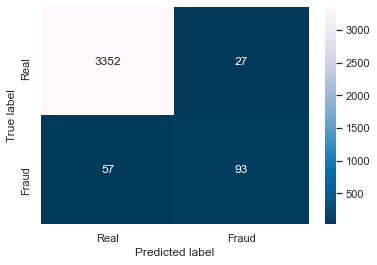

In [64]:
ax = sns.heatmap(conf_rf, annot=True, fmt="d", cmap="PuBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

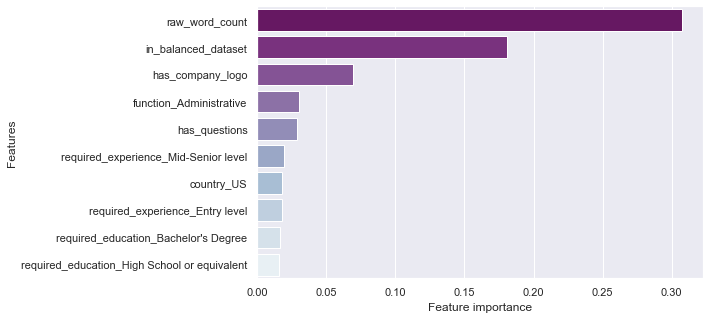

In [61]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(rf.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='BuPu_r')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Simple Grid Search Hyperparameter Tuning

In [70]:
rf_gs = RandomForestClassifier(random_state=123)

# Create the parameter grid based on google results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [15, 20, 25],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

gs = GridSearchCV(estimator = rf_gs, param_grid = param_grid, cv = 10, n_jobs = 1, scoring = 'accuracy', verbose = 10)

# Train the model with Grid Search
rf_gs = gs.fit(X_train, y_train)

# Output the test accuracy
rf_gs.score(X_test, y_test)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV 1/10; 1/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/10; 1/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.4s
[CV 2/10; 1/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/10; 1/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.952 total time=   0.5s
[CV 3/10; 1/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/10; 1/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.952 total time=   0.8s
[CV 4/10; 1/162] START bootstrap=True, max_depth=15, max_features=2, min_samples

[CV 10/10; 3/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.4s
[CV 1/10; 4/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/10; 4/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.5s
[CV 2/10; 4/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/10; 4/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.4s
[CV 3/10; 4/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/10; 4/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.951 total

[CV 9/10; 6/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.8s
[CV 10/10; 6/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=300
[CV 10/10; 6/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.7s
[CV 1/10; 7/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 1/10; 7/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.4s
[CV 2/10; 7/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/10; 7/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.952 

[CV 8/10; 9/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.952 total time=   1.4s
[CV 9/10; 9/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300
[CV 9/10; 9/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.950 total time=   1.5s
[CV 10/10; 9/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300
[CV 10/10; 9/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.950 total time=   1.4s
[CV 1/10; 10/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 1/10; 10/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.9

[CV 7/10; 12/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.2s
[CV 8/10; 12/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 8/10; 12/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.1s
[CV 9/10; 12/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 9/10; 12/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.3s
[CV 10/10; 12/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 10/10; 12/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.9

[CV 6/10; 15/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.2s
[CV 7/10; 15/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=300
[CV 7/10; 15/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.1s
[CV 8/10; 15/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=300
[CV 8/10; 15/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.0s
[CV 9/10; 15/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=300
[CV 9/10; 15/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.950

[CV 5/10; 18/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.950 total time=   1.0s
[CV 6/10; 18/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 6/10; 18/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.950 total time=   1.0s
[CV 7/10; 18/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 7/10; 18/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.950 total time=   1.0s
[CV 8/10; 18/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 8/10; 18/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, scor

[CV 4/10; 21/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.950 total time=   0.9s
[CV 5/10; 21/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=300
[CV 5/10; 21/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.0s
[CV 6/10; 21/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=300
[CV 6/10; 21/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.950 total time=   0.9s
[CV 7/10; 21/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=300
[CV 7/10; 21/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.950

[CV 3/10; 24/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.950 total time=   0.9s
[CV 4/10; 24/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=300
[CV 4/10; 24/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.950 total time=   0.9s
[CV 5/10; 24/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=300
[CV 5/10; 24/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.950 total time=   0.9s
[CV 6/10; 24/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=300
[CV 6/10; 24/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.950

[CV 2/10; 27/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.950 total time=   0.9s
[CV 3/10; 27/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 3/10; 27/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.950 total time=   0.9s
[CV 4/10; 27/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 4/10; 27/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.950 total time=   0.9s
[CV 5/10; 27/162] START bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/10; 27/162] END bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, scor

[CV 1/10; 30/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.954 total time=   2.0s
[CV 2/10; 30/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 2/10; 30/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.958 total time=   1.6s
[CV 3/10; 30/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 3/10; 30/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.953 total time=   1.6s
[CV 4/10; 30/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 4/10; 30/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.953

[CV 10/10; 32/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.953 total time=   1.0s
[CV 1/10; 33/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300
[CV 1/10; 33/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.953 total time=   1.6s
[CV 2/10; 33/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300
[CV 2/10; 33/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.958 total time=   1.6s
[CV 3/10; 33/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300
[CV 3/10; 33/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.95

[CV 9/10; 35/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.953 total time=   1.0s
[CV 10/10; 35/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 10/10; 35/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.952 total time=   1.1s
[CV 1/10; 36/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300
[CV 1/10; 36/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.952 total time=   1.6s
[CV 2/10; 36/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300
[CV 2/10; 36/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, sc

[CV 8/10; 38/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.950 total time=   0.8s
[CV 9/10; 38/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 9/10; 38/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.950 total time=   0.8s
[CV 10/10; 38/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 10/10; 38/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.950 total time=   0.9s
[CV 1/10; 39/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 1/10; 39/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.9

[CV 7/10; 41/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.950 total time=   0.9s
[CV 8/10; 41/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 8/10; 41/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.950 total time=   0.8s
[CV 9/10; 41/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 9/10; 41/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.950 total time=   0.8s
[CV 10/10; 41/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 10/10; 41/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.9

[CV 6/10; 44/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.9s
[CV 7/10; 44/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 7/10; 44/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.8s
[CV 8/10; 44/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 8/10; 44/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.9s
[CV 9/10; 44/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 9/10; 44/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, scor

[CV 5/10; 47/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.950 total time=   0.8s
[CV 6/10; 47/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 6/10; 47/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.950 total time=   0.8s
[CV 7/10; 47/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 7/10; 47/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.950 total time=   0.8s
[CV 8/10; 47/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 8/10; 47/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.950

[CV 4/10; 50/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.950 total time=   0.8s
[CV 5/10; 50/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200
[CV 5/10; 50/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.950 total time=   0.8s
[CV 6/10; 50/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200
[CV 6/10; 50/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.950 total time=   0.8s
[CV 7/10; 50/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200
[CV 7/10; 50/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.950

[CV 3/10; 53/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.8s
[CV 4/10; 53/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 4/10; 53/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.8s
[CV 5/10; 53/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 5/10; 53/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.8s
[CV 6/10; 53/162] START bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 6/10; 53/162] END bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, scor

[CV 2/10; 56/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.962 total time=   1.1s
[CV 3/10; 56/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/10; 56/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.954 total time=   1.1s
[CV 4/10; 56/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 4/10; 56/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.954 total time=   1.2s
[CV 5/10; 56/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 5/10; 56/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.955

[CV 1/10; 59/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.954 total time=   1.1s
[CV 2/10; 59/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 2/10; 59/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.958 total time=   1.1s
[CV 3/10; 59/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 3/10; 59/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.953 total time=   1.1s
[CV 4/10; 59/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 4/10; 59/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.954

[CV 10/10; 61/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.5s
[CV 1/10; 62/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 1/10; 62/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.954 total time=   1.2s
[CV 2/10; 62/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 2/10; 62/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.960 total time=   1.1s
[CV 3/10; 62/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 3/10; 62/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, sco

[CV 9/10; 64/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.3s
[CV 10/10; 64/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 10/10; 64/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.3s
[CV 1/10; 65/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 1/10; 65/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.950 total time=   0.7s
[CV 2/10; 65/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/10; 65/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.9

[CV 8/10; 67/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.3s
[CV 9/10; 67/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100
[CV 9/10; 67/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.3s
[CV 10/10; 67/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100
[CV 10/10; 67/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.3s
[CV 1/10; 68/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 1/10; 68/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.9

[CV 7/10; 70/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.4s
[CV 8/10; 70/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 8/10; 70/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.4s
[CV 9/10; 70/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 9/10; 70/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.3s
[CV 10/10; 70/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 10/10; 70/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, sc

[CV 6/10; 73/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.3s
[CV 7/10; 73/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 7/10; 73/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.3s
[CV 8/10; 73/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 8/10; 73/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.3s
[CV 9/10; 73/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 9/10; 73/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.950

[CV 5/10; 76/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.3s
[CV 6/10; 76/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 6/10; 76/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.3s
[CV 7/10; 76/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 7/10; 76/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.3s
[CV 8/10; 76/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 8/10; 76/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.950

[CV 4/10; 79/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.3s
[CV 5/10; 79/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 5/10; 79/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.3s
[CV 6/10; 79/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 6/10; 79/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.3s
[CV 7/10; 79/162] START bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 7/10; 79/162] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, scor

[CV 3/10; 82/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.960 total time=   0.6s
[CV 4/10; 82/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/10; 82/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.967 total time=   0.6s
[CV 5/10; 82/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/10; 82/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.961 total time=   0.6s
[CV 6/10; 82/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 6/10; 82/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.960

[CV 2/10; 85/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.966 total time=   0.7s
[CV 3/10; 85/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/10; 85/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.958 total time=   0.6s
[CV 4/10; 85/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/10; 85/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.964 total time=   0.6s
[CV 5/10; 85/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/10; 85/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.960

[CV 1/10; 88/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.959 total time=   0.7s
[CV 2/10; 88/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/10; 88/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.965 total time=   0.7s
[CV 3/10; 88/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/10; 88/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.958 total time=   0.7s
[CV 4/10; 88/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 4/10; 88/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, scor

[CV 10/10; 90/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.960 total time=   2.0s
[CV 1/10; 91/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 1/10; 91/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.4s
[CV 2/10; 91/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 2/10; 91/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.4s
[CV 3/10; 91/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 3/10; 91/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.9

[CV 9/10; 93/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.5s
[CV 10/10; 93/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 10/10; 93/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.4s
[CV 1/10; 94/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100
[CV 1/10; 94/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.4s
[CV 2/10; 94/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100
[CV 2/10; 94/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.9

[CV 8/10; 96/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.5s
[CV 9/10; 96/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300
[CV 9/10; 96/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.5s
[CV 10/10; 96/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300
[CV 10/10; 96/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.5s
[CV 1/10; 97/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 1/10; 97/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0

[CV 7/10; 99/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.950 total time=   2.0s
[CV 8/10; 99/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 8/10; 99/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.950 total time=   2.2s
[CV 9/10; 99/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 9/10; 99/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.950 total time=   2.0s
[CV 10/10; 99/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 10/10; 99/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, sc

[CV 6/10; 102/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.7s
[CV 7/10; 102/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300
[CV 7/10; 102/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.6s
[CV 8/10; 102/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300
[CV 8/10; 102/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.6s
[CV 9/10; 102/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300
[CV 9/10; 102/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, scor

[CV 5/10; 105/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.3s
[CV 6/10; 105/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=300
[CV 6/10; 105/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.3s
[CV 7/10; 105/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=300
[CV 7/10; 105/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.4s
[CV 8/10; 105/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=300
[CV 8/10; 105/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, scor

[CV 4/10; 108/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.950 total time=   1.4s
[CV 5/10; 108/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/10; 108/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.950 total time=   1.4s
[CV 6/10; 108/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 6/10; 108/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.950 total time=   1.4s
[CV 7/10; 108/162] START bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 7/10; 108/162] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300

[CV 3/10; 111/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.962 total time=   2.1s
[CV 4/10; 111/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 4/10; 111/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.965 total time=   2.1s
[CV 5/10; 111/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 5/10; 111/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.960 total time=   2.1s
[CV 6/10; 111/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 6/10; 111/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, scor

[CV 2/10; 114/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.966 total time=   2.1s
[CV 3/10; 114/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=300
[CV 3/10; 114/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.958 total time=   2.1s
[CV 4/10; 114/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=300
[CV 4/10; 114/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.962 total time=   2.1s
[CV 5/10; 114/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=300
[CV 5/10; 114/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, scor

[CV 1/10; 117/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.959 total time=   2.2s
[CV 2/10; 117/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300
[CV 2/10; 117/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.965 total time=   2.1s
[CV 3/10; 117/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300
[CV 3/10; 117/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.958 total time=   2.2s
[CV 4/10; 117/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300
[CV 4/10; 117/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=300

[CV 10/10; 119/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.950 total time=   0.8s
[CV 1/10; 120/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 1/10; 120/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.2s
[CV 2/10; 120/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 2/10; 120/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.950 total time=   1.3s
[CV 3/10; 120/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 3/10; 120/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, sco

[CV 9/10; 122/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.950 total time=   0.8s
[CV 10/10; 122/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 10/10; 122/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.950 total time=   0.8s
[CV 1/10; 123/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=300
[CV 1/10; 123/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.950 total time=   1.2s
[CV 2/10; 123/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=300
[CV 2/10; 123/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, sc

[CV 8/10; 125/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.9s
[CV 9/10; 125/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 9/10; 125/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.9s
[CV 10/10; 125/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 10/10; 125/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.8s
[CV 1/10; 126/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 1/10; 126/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=3

[CV 7/10; 128/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.950 total time=   0.6s
[CV 8/10; 128/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 8/10; 128/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.950 total time=   0.6s
[CV 9/10; 128/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 9/10; 128/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.950 total time=   0.7s
[CV 10/10; 128/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 10/10; 128/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, sc

[CV 6/10; 131/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.950 total time=   0.8s
[CV 7/10; 131/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200
[CV 7/10; 131/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.950 total time=   0.8s
[CV 8/10; 131/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200
[CV 8/10; 131/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.950 total time=   0.7s
[CV 9/10; 131/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200
[CV 9/10; 131/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, scor

[CV 5/10; 134/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.7s
[CV 6/10; 134/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 6/10; 134/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.7s
[CV 7/10; 134/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 7/10; 134/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.950 total time=   0.7s
[CV 8/10; 134/162] START bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 8/10; 134/162] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200

[CV 4/10; 137/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.969 total time=   1.6s
[CV 5/10; 137/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 5/10; 137/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.965 total time=   1.7s
[CV 6/10; 137/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 6/10; 137/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.965 total time=   1.7s
[CV 7/10; 137/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 7/10; 137/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, scor

[CV 3/10; 140/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.963 total time=   1.8s
[CV 4/10; 140/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 4/10; 140/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.969 total time=   1.8s
[CV 5/10; 140/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 5/10; 140/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.962 total time=   1.8s
[CV 6/10; 140/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 6/10; 140/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, scor

[CV 2/10; 143/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.967 total time=   1.7s
[CV 3/10; 143/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 3/10; 143/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.960 total time=   1.7s
[CV 4/10; 143/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 4/10; 143/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.965 total time=   1.6s
[CV 5/10; 143/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 5/10; 143/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200

[CV 1/10; 146/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.950 total time=   1.0s
[CV 2/10; 146/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/10; 146/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.950 total time=   1.1s
[CV 3/10; 146/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 3/10; 146/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.951 total time=   1.0s
[CV 4/10; 146/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 4/10; 146/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, scor

[CV 10/10; 148/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.6s
[CV 1/10; 149/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 1/10; 149/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.950 total time=   1.1s
[CV 2/10; 149/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 2/10; 149/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.950 total time=   1.1s
[CV 3/10; 149/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 3/10; 149/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, sco

[CV 9/10; 151/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.6s
[CV 10/10; 151/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 10/10; 151/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.5s
[CV 1/10; 152/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 1/10; 152/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.950 total time=   1.1s
[CV 2/10; 152/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 2/10; 152/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=2

[CV 8/10; 154/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.5s
[CV 9/10; 154/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 9/10; 154/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.4s
[CV 10/10; 154/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 10/10; 154/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.4s
[CV 1/10; 155/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 1/10; 155/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, sc

[CV 7/10; 157/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.4s
[CV 8/10; 157/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 8/10; 157/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.5s
[CV 9/10; 157/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 9/10; 157/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.950 total time=   0.4s
[CV 10/10; 157/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 10/10; 157/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, sc

[CV 6/10; 160/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.5s
[CV 7/10; 160/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 7/10; 160/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.4s
[CV 8/10; 160/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 8/10; 160/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.950 total time=   0.5s
[CV 9/10; 160/162] START bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 9/10; 160/162] END bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100

0.973080192689147

In [71]:
print("Best score:", rf_gs.best_score_)
print("Best parameters:", rf_gs.best_params_)

Best score: 0.9675551062774679
Best parameters: {'bootstrap': True, 'max_depth': 25, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Maybe we can play around with the parameters ourselves. We do this because the grid search model performed worse on test data compared to the default parameters which is kind of bad.

In [92]:
# FOR TESTING PURPOSES
rf_test = RandomForestClassifier(random_state=123, 
                                 max_depth=38, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

# Train the model
rf_test.fit(X_train, y_train)

# Output the test accuracy
rf_test.score(X_test, y_test)

0.9787475205440634

We got better accuracy but the recall on fraud class got lower, but at least this is the set of parameters worth keeping for later.

In [94]:
print(confusion_matrix(y_test, rf_test.predict(X_test)))
print('\n')
print(classification_report(y_test, rf_test.predict(X_test), target_names=class_labels, digits=4))

[[3372    7]
 [  68   82]]


              precision    recall  f1-score   support

        Real     0.9802    0.9979    0.9890      3379
       Fraud     0.9213    0.5467    0.6862       150

    accuracy                         0.9787      3529
   macro avg     0.9508    0.7723    0.8376      3529
weighted avg     0.9777    0.9787    0.9761      3529



The below is the initial grid search model results that performed slightly worse.

In [72]:
y_pred = rf_gs.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_gs = confusion_matrix(y_test, y_pred)
print(conf_rf_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3379    0]
 [  95   55]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9727    1.0000    0.9861      3379
       Fraud     1.0000    0.3667    0.5366       150

    accuracy                         0.9731      3529
   macro avg     0.9863    0.6833    0.7614      3529
weighted avg     0.9738    0.9731    0.9670      3529



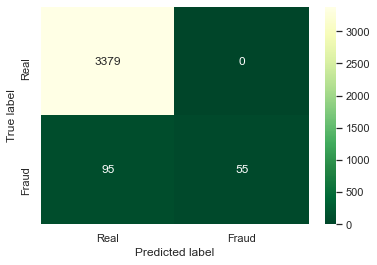

In [75]:
ax = sns.heatmap(conf_rf_gs, annot=True, fmt="d", cmap=sns.color_palette("YlGn_r", as_cmap=True))
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

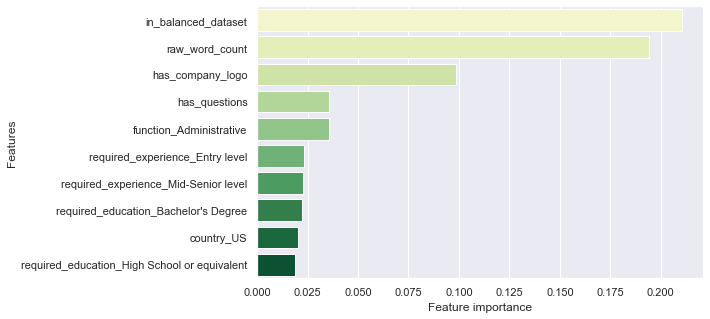

In [119]:
# For plotting purpose
rf_gs = RandomForestClassifier(random_state=123, max_depth=25, max_features=3, min_samples_leaf=1, 
                               min_samples_split=2, n_estimators=100)
rf_gs.fit(X_train, y_train)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_gs.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='YlGn')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

### 2. XGBoost Classifier

In [97]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_clf = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_clf.fit(X_train.values, y_train)

# Output the test accuracy
xgb_clf.score(X_test.values, y_test)

0.9784641541513176

In [99]:
y_pred = xgb_clf.predict(X_test.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb = confusion_matrix(y_test, y_pred)
print(conf_xgb)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3368   11]
 [  65   85]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9811    0.9967    0.9888      3379
       Fraud     0.8854    0.5667    0.6911       150

    accuracy                         0.9785      3529
   macro avg     0.9332    0.7817    0.8400      3529
weighted avg     0.9770    0.9785    0.9762      3529



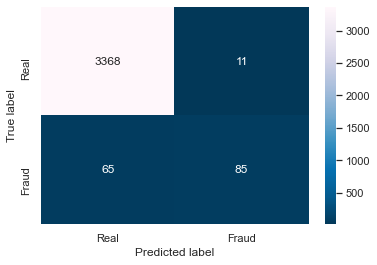

In [100]:
ax = sns.heatmap(conf_xgb, annot=True, fmt="d", cmap="PuBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

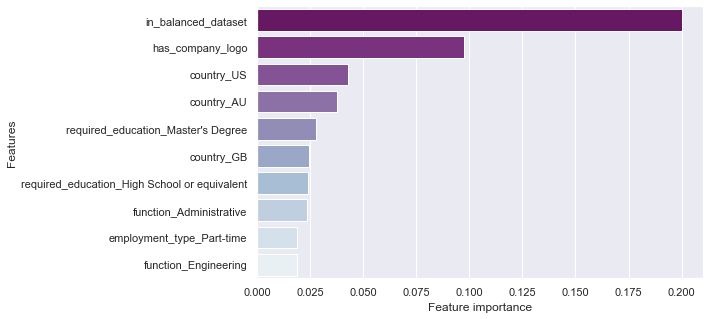

In [101]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(xgb_clf.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='BuPu_r')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Simple Grid Search Hyperparameter Tuning

In [102]:
xgb_gs = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False)

param_grid = {
    #'n_estimators': [700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15, 20, 25],
    'reg_alpha': [1.2, 1.3],
    'reg_lambda': [1.2, 1.3],
    'subsample': [0.8, 0.9] 
}

gs = GridSearchCV(estimator = xgb_gs, param_grid = param_grid, cv = 10, n_jobs = 1, scoring = 'accuracy', verbose = 10)

# Train the model with Grid Search
xgb_gs = gs.fit(X_train.values, y_train)

# Output the test accuracy
xgb_gs.score(X_test.values, y_test)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV 1/10; 1/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 1/10; 1/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=0.972 total time=   3.5s
[CV 2/10; 1/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 2/10; 1/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=0.972 total time=   3.4s
[CV 3/10; 1/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 3/10; 1/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=0.972 total time=   3.6s
[CV 4/10; 1/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 4/10; 1/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=0.972 total ti

[CV 5/10; 4/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=0.972 total time=   3.0s
[CV 6/10; 4/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 6/10; 4/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=0.970 total time=   3.9s
[CV 7/10; 4/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 7/10; 4/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=0.971 total time=   3.7s
[CV 8/10; 4/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 8/10; 4/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=0.974 total time=   4.1s
[CV 9/10; 4/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 9/10; 4/48] END colsample_bytree=0.7, max_depth=

[CV 10/10; 7/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=0.977 total time=   3.2s
[CV 1/10; 8/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 1/10; 8/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=0.972 total time=   3.5s
[CV 2/10; 8/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 2/10; 8/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=0.974 total time=   3.2s
[CV 3/10; 8/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 3/10; 8/48] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=0.973 total time=   3.2s
[CV 4/10; 8/48] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 4/10; 8/48] END colsample_bytree=0.7, max_depth

[CV 5/10; 11/48] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=0.971 total time=   3.4s
[CV 6/10; 11/48] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 6/10; 11/48] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=0.970 total time=   3.4s
[CV 7/10; 11/48] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 7/10; 11/48] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=0.973 total time=   3.7s
[CV 8/10; 11/48] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 8/10; 11/48] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=0.974 total time=   3.7s
[CV 9/10; 11/48] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 9/10; 11/48] END colsample_bytree=0.7, m

[CV 10/10; 14/48] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=0.978 total time=   3.6s
[CV 1/10; 15/48] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 1/10; 15/48] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=0.972 total time=   4.0s
[CV 2/10; 15/48] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 2/10; 15/48] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=0.975 total time=   3.7s
[CV 3/10; 15/48] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 3/10; 15/48] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=0.975 total time=   3.4s
[CV 4/10; 15/48] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 4/10; 15/48] END colsample_bytree=0.7, 

[CV 5/10; 18/48] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=0.970 total time=   3.4s
[CV 6/10; 18/48] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 6/10; 18/48] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=0.967 total time=   3.4s
[CV 7/10; 18/48] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 7/10; 18/48] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=0.973 total time=   3.8s
[CV 8/10; 18/48] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 8/10; 18/48] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=0.973 total time=   3.5s
[CV 9/10; 18/48] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 9/10; 18/48] END colsample_bytree=0.7, m

[CV 10/10; 21/48] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=0.976 total time=   3.5s
[CV 1/10; 22/48] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 1/10; 22/48] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=0.974 total time=   3.5s
[CV 2/10; 22/48] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 2/10; 22/48] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=0.972 total time=   3.8s
[CV 3/10; 22/48] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 3/10; 22/48] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=0.975 total time=   3.4s
[CV 4/10; 22/48] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 4/10; 22/48] END colsample_bytree=0.7, 

[CV 5/10; 25/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=0.972 total time=   3.7s
[CV 6/10; 25/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 6/10; 25/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=0.968 total time=   4.1s
[CV 7/10; 25/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 7/10; 25/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=0.973 total time=   3.9s
[CV 8/10; 25/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 8/10; 25/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=0.974 total time=   3.8s
[CV 9/10; 25/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 9/10; 25/48] END colsample_bytree=0.8, m

[CV 10/10; 28/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=0.977 total time=   3.8s
[CV 1/10; 29/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 1/10; 29/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=0.972 total time=   3.9s
[CV 2/10; 29/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 2/10; 29/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=0.975 total time=   4.1s
[CV 3/10; 29/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 3/10; 29/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=0.973 total time=   3.8s
[CV 4/10; 29/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 4/10; 29/48] END colsample_bytree=0.8, 

[CV 5/10; 32/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=0.971 total time=   3.9s
[CV 6/10; 32/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 6/10; 32/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=0.969 total time=   3.9s
[CV 7/10; 32/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 7/10; 32/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=0.972 total time=   3.8s
[CV 8/10; 32/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 8/10; 32/48] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=0.974 total time=   3.9s
[CV 9/10; 32/48] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 9/10; 32/48] END colsample_bytree=0.8, m

[CV 10/10; 35/48] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=0.977 total time=   4.0s
[CV 1/10; 36/48] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 1/10; 36/48] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=0.972 total time=   4.0s
[CV 2/10; 36/48] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 2/10; 36/48] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=0.974 total time=   4.0s
[CV 3/10; 36/48] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 3/10; 36/48] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=0.971 total time=   4.6s
[CV 4/10; 36/48] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 4/10; 36/48] END colsample_bytree=0.8, 

[CV 5/10; 39/48] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=0.972 total time=   3.9s
[CV 6/10; 39/48] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 6/10; 39/48] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=0.967 total time=   3.9s
[CV 7/10; 39/48] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 7/10; 39/48] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=0.974 total time=   4.4s
[CV 8/10; 39/48] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 8/10; 39/48] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=0.974 total time=   4.0s
[CV 9/10; 39/48] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 9/10; 39/48] END colsample_bytree=0.8, m

[CV 10/10; 42/48] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=0.978 total time=   4.1s
[CV 1/10; 43/48] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 1/10; 43/48] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=0.972 total time=   4.4s
[CV 2/10; 43/48] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 2/10; 43/48] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=0.974 total time=   4.1s
[CV 3/10; 43/48] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 3/10; 43/48] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=0.973 total time=   4.1s
[CV 4/10; 43/48] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 4/10; 43/48] END colsample_bytree=0.8, 

[CV 5/10; 46/48] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=0.972 total time=   4.3s
[CV 6/10; 46/48] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 6/10; 46/48] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=0.971 total time=   4.0s
[CV 7/10; 46/48] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 7/10; 46/48] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=0.974 total time=   4.2s
[CV 8/10; 46/48] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 8/10; 46/48] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=0.973 total time=   4.2s
[CV 9/10; 46/48] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 9/10; 46/48] END colsample_bytree=0.8, m

0.979597619722301

In [103]:
print("Best score:", xgb_gs.best_score_)
print("Best parameters:", xgb_gs.best_params_)

Best score: 0.9735056707416234
Best parameters: {'colsample_bytree': 0.8, 'max_depth': 20, 'reg_alpha': 1.3, 'reg_lambda': 1.2, 'subsample': 0.8}


In [104]:
y_pred = xgb_gs.predict(X_test.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_gs = confusion_matrix(y_test, y_pred)
print(conf_xgb_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3369   10]
 [  62   88]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9819    0.9970    0.9894      3379
       Fraud     0.8980    0.5867    0.7097       150

    accuracy                         0.9796      3529
   macro avg     0.9399    0.7919    0.8496      3529
weighted avg     0.9784    0.9796    0.9775      3529



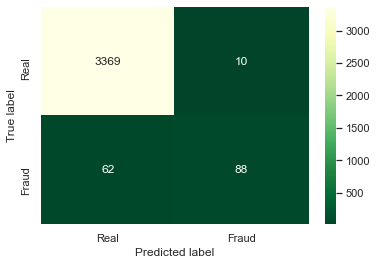

In [105]:
ax = sns.heatmap(conf_xgb_gs, annot=True, fmt="d", cmap=sns.color_palette("YlGn_r", as_cmap=True))
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

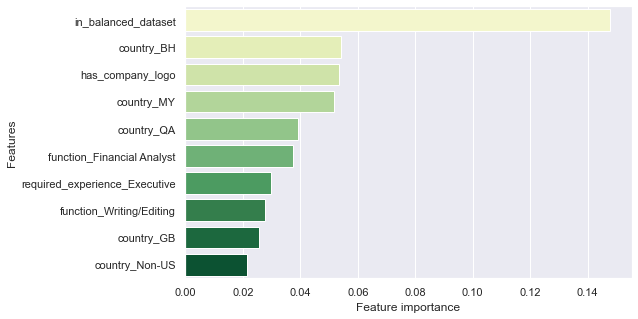

In [120]:
# For plotting purpose
xgb_gs = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False, 
                       colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8)
xgb_gs.fit(X_train.values, y_train)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(xgb_gs.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='YlGn')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

### 3. Light Gradient Boosting Machine

In [109]:
lgb_clf = LGBMClassifier(random_state=123)

# Train the lgbm model
lgb_clf.fit(X_train.values, y_train, eval_metric='Accuracy')

# Output the test accuracy
lgb_clf.score(X_test.values, y_test)

0.9787475205440634

In [110]:
y_pred = lgb_clf.predict(X_test.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb = confusion_matrix(y_test, y_pred)
print(conf_lgb)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3368   11]
 [  64   86]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9814    0.9967    0.9890      3379
       Fraud     0.8866    0.5733    0.6964       150

    accuracy                         0.9787      3529
   macro avg     0.9340    0.7850    0.8427      3529
weighted avg     0.9773    0.9787    0.9766      3529



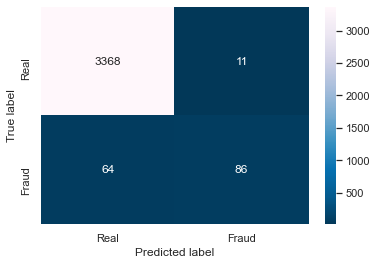

In [111]:
ax = sns.heatmap(conf_lgb, annot=True, fmt="d", cmap="PuBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

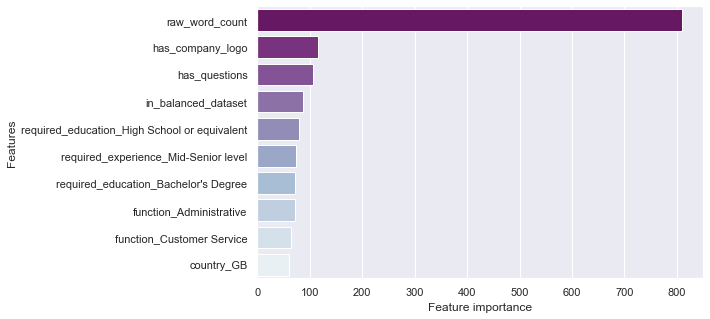

In [112]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(lgb_clf.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='BuPu_r')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Simple Grid Search Hyperparameter Tuning

In [113]:
lgb_gs = LGBMClassifier(random_state=123)

param_grid = {
    "max_depth": [25, 50, 75],
    "learning_rate" : [0.01, 0.05],
    "num_leaves": [500, 700, 900],
    "n_estimators": [200, 400, 600]
}

# Train the model with Grid Search
gs = GridSearchCV(estimator = lgb_gs, param_grid = param_grid, cv = 10, n_jobs = 1, scoring = 'accuracy', verbose = 10)


lgb_gs = gs.fit(X_train.values, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV 1/10; 1/54] START learning_rate=0.01, max_depth=25, n_estimators=200, num_leaves=500
[CV 1/10; 1/54] END learning_rate=0.01, max_depth=25, n_estimators=200, num_leaves=500;, score=0.975 total time=   1.6s
[CV 2/10; 1/54] START learning_rate=0.01, max_depth=25, n_estimators=200, num_leaves=500
[CV 2/10; 1/54] END learning_rate=0.01, max_depth=25, n_estimators=200, num_leaves=500;, score=0.975 total time=   1.1s
[CV 3/10; 1/54] START learning_rate=0.01, max_depth=25, n_estimators=200, num_leaves=500
[CV 3/10; 1/54] END learning_rate=0.01, max_depth=25, n_estimators=200, num_leaves=500;, score=0.974 total time=   1.1s
[CV 4/10; 1/54] START learning_rate=0.01, max_depth=25, n_estimators=200, num_leaves=500
[CV 4/10; 1/54] END learning_rate=0.01, max_depth=25, n_estimators=200, num_leaves=500;, score=0.972 total time=   1.2s
[CV 5/10; 1/54] START learning_rate=0.01, max_depth=25, n_estimators=200, num_leaves=500
[CV 5/10; 1/

[CV 10/10; 4/54] END learning_rate=0.01, max_depth=25, n_estimators=400, num_leaves=500;, score=0.976 total time=   2.3s
[CV 1/10; 5/54] START learning_rate=0.01, max_depth=25, n_estimators=400, num_leaves=700
[CV 1/10; 5/54] END learning_rate=0.01, max_depth=25, n_estimators=400, num_leaves=700;, score=0.975 total time=   2.4s
[CV 2/10; 5/54] START learning_rate=0.01, max_depth=25, n_estimators=400, num_leaves=700
[CV 2/10; 5/54] END learning_rate=0.01, max_depth=25, n_estimators=400, num_leaves=700;, score=0.978 total time=   2.5s
[CV 3/10; 5/54] START learning_rate=0.01, max_depth=25, n_estimators=400, num_leaves=700
[CV 3/10; 5/54] END learning_rate=0.01, max_depth=25, n_estimators=400, num_leaves=700;, score=0.975 total time=   2.5s
[CV 4/10; 5/54] START learning_rate=0.01, max_depth=25, n_estimators=400, num_leaves=700
[CV 4/10; 5/54] END learning_rate=0.01, max_depth=25, n_estimators=400, num_leaves=700;, score=0.975 total time=   2.4s
[CV 5/10; 5/54] START learning_rate=0.01, m

[CV 10/10; 8/54] END learning_rate=0.01, max_depth=25, n_estimators=600, num_leaves=700;, score=0.978 total time=   4.0s
[CV 1/10; 9/54] START learning_rate=0.01, max_depth=25, n_estimators=600, num_leaves=900
[CV 1/10; 9/54] END learning_rate=0.01, max_depth=25, n_estimators=600, num_leaves=900;, score=0.977 total time=   5.4s
[CV 2/10; 9/54] START learning_rate=0.01, max_depth=25, n_estimators=600, num_leaves=900
[CV 2/10; 9/54] END learning_rate=0.01, max_depth=25, n_estimators=600, num_leaves=900;, score=0.978 total time=   3.9s
[CV 3/10; 9/54] START learning_rate=0.01, max_depth=25, n_estimators=600, num_leaves=900
[CV 3/10; 9/54] END learning_rate=0.01, max_depth=25, n_estimators=600, num_leaves=900;, score=0.972 total time=   3.9s
[CV 4/10; 9/54] START learning_rate=0.01, max_depth=25, n_estimators=600, num_leaves=900
[CV 4/10; 9/54] END learning_rate=0.01, max_depth=25, n_estimators=600, num_leaves=900;, score=0.975 total time=   3.9s
[CV 5/10; 9/54] START learning_rate=0.01, m

[CV 9/10; 12/54] END learning_rate=0.01, max_depth=50, n_estimators=200, num_leaves=900;, score=0.974 total time=   1.6s
[CV 10/10; 12/54] START learning_rate=0.01, max_depth=50, n_estimators=200, num_leaves=900
[CV 10/10; 12/54] END learning_rate=0.01, max_depth=50, n_estimators=200, num_leaves=900;, score=0.974 total time=   1.9s
[CV 1/10; 13/54] START learning_rate=0.01, max_depth=50, n_estimators=400, num_leaves=500
[CV 1/10; 13/54] END learning_rate=0.01, max_depth=50, n_estimators=400, num_leaves=500;, score=0.974 total time=   3.0s
[CV 2/10; 13/54] START learning_rate=0.01, max_depth=50, n_estimators=400, num_leaves=500
[CV 2/10; 13/54] END learning_rate=0.01, max_depth=50, n_estimators=400, num_leaves=500;, score=0.978 total time=   2.9s
[CV 3/10; 13/54] START learning_rate=0.01, max_depth=50, n_estimators=400, num_leaves=500
[CV 3/10; 13/54] END learning_rate=0.01, max_depth=50, n_estimators=400, num_leaves=500;, score=0.972 total time=   2.9s
[CV 4/10; 13/54] START learning_r

[CV 8/10; 16/54] END learning_rate=0.01, max_depth=50, n_estimators=600, num_leaves=500;, score=0.973 total time=   5.1s
[CV 9/10; 16/54] START learning_rate=0.01, max_depth=50, n_estimators=600, num_leaves=500
[CV 9/10; 16/54] END learning_rate=0.01, max_depth=50, n_estimators=600, num_leaves=500;, score=0.974 total time=   4.7s
[CV 10/10; 16/54] START learning_rate=0.01, max_depth=50, n_estimators=600, num_leaves=500
[CV 10/10; 16/54] END learning_rate=0.01, max_depth=50, n_estimators=600, num_leaves=500;, score=0.977 total time=   4.8s
[CV 1/10; 17/54] START learning_rate=0.01, max_depth=50, n_estimators=600, num_leaves=700
[CV 1/10; 17/54] END learning_rate=0.01, max_depth=50, n_estimators=600, num_leaves=700;, score=0.975 total time=   5.8s
[CV 2/10; 17/54] START learning_rate=0.01, max_depth=50, n_estimators=600, num_leaves=700
[CV 2/10; 17/54] END learning_rate=0.01, max_depth=50, n_estimators=600, num_leaves=700;, score=0.976 total time=   5.4s
[CV 3/10; 17/54] START learning_r

[CV 7/10; 20/54] END learning_rate=0.01, max_depth=75, n_estimators=200, num_leaves=700;, score=0.974 total time=   1.3s
[CV 8/10; 20/54] START learning_rate=0.01, max_depth=75, n_estimators=200, num_leaves=700
[CV 8/10; 20/54] END learning_rate=0.01, max_depth=75, n_estimators=200, num_leaves=700;, score=0.975 total time=   1.3s
[CV 9/10; 20/54] START learning_rate=0.01, max_depth=75, n_estimators=200, num_leaves=700
[CV 9/10; 20/54] END learning_rate=0.01, max_depth=75, n_estimators=200, num_leaves=700;, score=0.974 total time=   1.2s
[CV 10/10; 20/54] START learning_rate=0.01, max_depth=75, n_estimators=200, num_leaves=700
[CV 10/10; 20/54] END learning_rate=0.01, max_depth=75, n_estimators=200, num_leaves=700;, score=0.974 total time=   1.3s
[CV 1/10; 21/54] START learning_rate=0.01, max_depth=75, n_estimators=200, num_leaves=900
[CV 1/10; 21/54] END learning_rate=0.01, max_depth=75, n_estimators=200, num_leaves=900;, score=0.975 total time=   1.7s
[CV 2/10; 21/54] START learning_r

[CV 6/10; 24/54] END learning_rate=0.01, max_depth=75, n_estimators=400, num_leaves=900;, score=0.967 total time=   3.5s
[CV 7/10; 24/54] START learning_rate=0.01, max_depth=75, n_estimators=400, num_leaves=900
[CV 7/10; 24/54] END learning_rate=0.01, max_depth=75, n_estimators=400, num_leaves=900;, score=0.974 total time=   3.4s
[CV 8/10; 24/54] START learning_rate=0.01, max_depth=75, n_estimators=400, num_leaves=900
[CV 8/10; 24/54] END learning_rate=0.01, max_depth=75, n_estimators=400, num_leaves=900;, score=0.974 total time=   3.5s
[CV 9/10; 24/54] START learning_rate=0.01, max_depth=75, n_estimators=400, num_leaves=900
[CV 9/10; 24/54] END learning_rate=0.01, max_depth=75, n_estimators=400, num_leaves=900;, score=0.977 total time=   3.6s
[CV 10/10; 24/54] START learning_rate=0.01, max_depth=75, n_estimators=400, num_leaves=900
[CV 10/10; 24/54] END learning_rate=0.01, max_depth=75, n_estimators=400, num_leaves=900;, score=0.977 total time=   3.6s
[CV 1/10; 25/54] START learning_r

[CV 5/10; 28/54] END learning_rate=0.05, max_depth=25, n_estimators=200, num_leaves=500;, score=0.971 total time=   1.3s
[CV 6/10; 28/54] START learning_rate=0.05, max_depth=25, n_estimators=200, num_leaves=500
[CV 6/10; 28/54] END learning_rate=0.05, max_depth=25, n_estimators=200, num_leaves=500;, score=0.970 total time=   1.2s
[CV 7/10; 28/54] START learning_rate=0.05, max_depth=25, n_estimators=200, num_leaves=500
[CV 7/10; 28/54] END learning_rate=0.05, max_depth=25, n_estimators=200, num_leaves=500;, score=0.976 total time=   1.6s
[CV 8/10; 28/54] START learning_rate=0.05, max_depth=25, n_estimators=200, num_leaves=500
[CV 8/10; 28/54] END learning_rate=0.05, max_depth=25, n_estimators=200, num_leaves=500;, score=0.972 total time=   1.2s
[CV 9/10; 28/54] START learning_rate=0.05, max_depth=25, n_estimators=200, num_leaves=500
[CV 9/10; 28/54] END learning_rate=0.05, max_depth=25, n_estimators=200, num_leaves=500;, score=0.975 total time=   1.1s
[CV 10/10; 28/54] START learning_ra

[CV 4/10; 32/54] END learning_rate=0.05, max_depth=25, n_estimators=400, num_leaves=700;, score=0.973 total time=   2.6s
[CV 5/10; 32/54] START learning_rate=0.05, max_depth=25, n_estimators=400, num_leaves=700
[CV 5/10; 32/54] END learning_rate=0.05, max_depth=25, n_estimators=400, num_leaves=700;, score=0.969 total time=   4.2s
[CV 6/10; 32/54] START learning_rate=0.05, max_depth=25, n_estimators=400, num_leaves=700
[CV 6/10; 32/54] END learning_rate=0.05, max_depth=25, n_estimators=400, num_leaves=700;, score=0.970 total time=   3.3s
[CV 7/10; 32/54] START learning_rate=0.05, max_depth=25, n_estimators=400, num_leaves=700
[CV 7/10; 32/54] END learning_rate=0.05, max_depth=25, n_estimators=400, num_leaves=700;, score=0.974 total time=   3.2s
[CV 8/10; 32/54] START learning_rate=0.05, max_depth=25, n_estimators=400, num_leaves=700
[CV 8/10; 32/54] END learning_rate=0.05, max_depth=25, n_estimators=400, num_leaves=700;, score=0.970 total time=   3.0s
[CV 9/10; 32/54] START learning_rat

[CV 3/10; 36/54] END learning_rate=0.05, max_depth=25, n_estimators=600, num_leaves=900;, score=0.965 total time=   4.2s
[CV 4/10; 36/54] START learning_rate=0.05, max_depth=25, n_estimators=600, num_leaves=900
[CV 4/10; 36/54] END learning_rate=0.05, max_depth=25, n_estimators=600, num_leaves=900;, score=0.975 total time=   4.5s
[CV 5/10; 36/54] START learning_rate=0.05, max_depth=25, n_estimators=600, num_leaves=900
[CV 5/10; 36/54] END learning_rate=0.05, max_depth=25, n_estimators=600, num_leaves=900;, score=0.970 total time=   4.7s
[CV 6/10; 36/54] START learning_rate=0.05, max_depth=25, n_estimators=600, num_leaves=900
[CV 6/10; 36/54] END learning_rate=0.05, max_depth=25, n_estimators=600, num_leaves=900;, score=0.970 total time=   4.2s
[CV 7/10; 36/54] START learning_rate=0.05, max_depth=25, n_estimators=600, num_leaves=900
[CV 7/10; 36/54] END learning_rate=0.05, max_depth=25, n_estimators=600, num_leaves=900;, score=0.974 total time=   4.7s
[CV 8/10; 36/54] START learning_rat

[CV 2/10; 40/54] END learning_rate=0.05, max_depth=50, n_estimators=400, num_leaves=500;, score=0.975 total time=   4.0s
[CV 3/10; 40/54] START learning_rate=0.05, max_depth=50, n_estimators=400, num_leaves=500
[CV 3/10; 40/54] END learning_rate=0.05, max_depth=50, n_estimators=400, num_leaves=500;, score=0.968 total time=   3.8s
[CV 4/10; 40/54] START learning_rate=0.05, max_depth=50, n_estimators=400, num_leaves=500
[CV 4/10; 40/54] END learning_rate=0.05, max_depth=50, n_estimators=400, num_leaves=500;, score=0.975 total time=   3.7s
[CV 5/10; 40/54] START learning_rate=0.05, max_depth=50, n_estimators=400, num_leaves=500
[CV 5/10; 40/54] END learning_rate=0.05, max_depth=50, n_estimators=400, num_leaves=500;, score=0.970 total time=   3.8s
[CV 6/10; 40/54] START learning_rate=0.05, max_depth=50, n_estimators=400, num_leaves=500
[CV 6/10; 40/54] END learning_rate=0.05, max_depth=50, n_estimators=400, num_leaves=500;, score=0.969 total time=   3.8s
[CV 7/10; 40/54] START learning_rat

[CV 1/10; 44/54] END learning_rate=0.05, max_depth=50, n_estimators=600, num_leaves=700;, score=0.976 total time=   4.6s
[CV 2/10; 44/54] START learning_rate=0.05, max_depth=50, n_estimators=600, num_leaves=700
[CV 2/10; 44/54] END learning_rate=0.05, max_depth=50, n_estimators=600, num_leaves=700;, score=0.975 total time=   4.9s
[CV 3/10; 44/54] START learning_rate=0.05, max_depth=50, n_estimators=600, num_leaves=700
[CV 3/10; 44/54] END learning_rate=0.05, max_depth=50, n_estimators=600, num_leaves=700;, score=0.967 total time=   4.8s
[CV 4/10; 44/54] START learning_rate=0.05, max_depth=50, n_estimators=600, num_leaves=700
[CV 4/10; 44/54] END learning_rate=0.05, max_depth=50, n_estimators=600, num_leaves=700;, score=0.975 total time=   4.5s
[CV 5/10; 44/54] START learning_rate=0.05, max_depth=50, n_estimators=600, num_leaves=700
[CV 5/10; 44/54] END learning_rate=0.05, max_depth=50, n_estimators=600, num_leaves=700;, score=0.970 total time=   5.5s
[CV 6/10; 44/54] START learning_rat

[CV 10/10; 47/54] END learning_rate=0.05, max_depth=75, n_estimators=200, num_leaves=700;, score=0.974 total time=   2.0s
[CV 1/10; 48/54] START learning_rate=0.05, max_depth=75, n_estimators=200, num_leaves=900
[CV 1/10; 48/54] END learning_rate=0.05, max_depth=75, n_estimators=200, num_leaves=900;, score=0.975 total time=   2.5s
[CV 2/10; 48/54] START learning_rate=0.05, max_depth=75, n_estimators=200, num_leaves=900
[CV 2/10; 48/54] END learning_rate=0.05, max_depth=75, n_estimators=200, num_leaves=900;, score=0.977 total time=   2.1s
[CV 3/10; 48/54] START learning_rate=0.05, max_depth=75, n_estimators=200, num_leaves=900
[CV 3/10; 48/54] END learning_rate=0.05, max_depth=75, n_estimators=200, num_leaves=900;, score=0.969 total time=   2.1s
[CV 4/10; 48/54] START learning_rate=0.05, max_depth=75, n_estimators=200, num_leaves=900
[CV 4/10; 48/54] END learning_rate=0.05, max_depth=75, n_estimators=200, num_leaves=900;, score=0.976 total time=   2.4s
[CV 5/10; 48/54] START learning_ra

[CV 9/10; 51/54] END learning_rate=0.05, max_depth=75, n_estimators=400, num_leaves=900;, score=0.974 total time=   3.6s
[CV 10/10; 51/54] START learning_rate=0.05, max_depth=75, n_estimators=400, num_leaves=900
[CV 10/10; 51/54] END learning_rate=0.05, max_depth=75, n_estimators=400, num_leaves=900;, score=0.974 total time=   3.7s
[CV 1/10; 52/54] START learning_rate=0.05, max_depth=75, n_estimators=600, num_leaves=500
[CV 1/10; 52/54] END learning_rate=0.05, max_depth=75, n_estimators=600, num_leaves=500;, score=0.974 total time=   4.4s
[CV 2/10; 52/54] START learning_rate=0.05, max_depth=75, n_estimators=600, num_leaves=500
[CV 2/10; 52/54] END learning_rate=0.05, max_depth=75, n_estimators=600, num_leaves=500;, score=0.976 total time=   4.0s
[CV 3/10; 52/54] START learning_rate=0.05, max_depth=75, n_estimators=600, num_leaves=500
[CV 3/10; 52/54] END learning_rate=0.05, max_depth=75, n_estimators=600, num_leaves=500;, score=0.968 total time=   4.0s
[CV 4/10; 52/54] START learning_r

In [114]:
lgb_gs.score(X_test.values, y_test)

0.9770473221875886

In [115]:
print("Best score:", lgb_gs.best_score_)
print("Best parameters:", lgb_gs.best_params_)

Best score: 0.9742139864239494
Best parameters: {'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 600, 'num_leaves': 500}


Again, we have no choice but to self-tune the parameters to get a better accuracy.

In [175]:
# Try our own parameters
lgb_test = LGBMClassifier(random_state=123, 
                          learning_rate=0.015, max_depth=15, n_estimators=600, num_leaves=150)

# Train the model
lgb_test.fit(X_train.values, y_train)

# Output the test accuracy
lgb_test.score(X_test.values, y_test)

0.9790308869368093

We got a slightly better accuracy than the threshold while managed to increase the recall on fraud class. Thus, this is a good set of paramters to be used.

In [176]:
print(confusion_matrix(y_test, lgb_test.predict(X_test.values)))
print('\n')
print(classification_report(y_test, lgb_test.predict(X_test.values), target_names=class_labels, digits=4))

[[3365   14]
 [  60   90]]


              precision    recall  f1-score   support

        Real     0.9825    0.9959    0.9891      3379
       Fraud     0.8654    0.6000    0.7087       150

    accuracy                         0.9790      3529
   macro avg     0.9239    0.7979    0.8489      3529
weighted avg     0.9775    0.9790    0.9772      3529



The below is the initial grid search model results that performed slightly worse.

In [177]:
y_pred = lgb_gs.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_gs = confusion_matrix(y_test, y_pred)
print(conf_lgb_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3359   20]
 [  61   89]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9822    0.9941    0.9881      3379
       Fraud     0.8165    0.5933    0.6873       150

    accuracy                         0.9770      3529
   macro avg     0.8993    0.7937    0.8377      3529
weighted avg     0.9751    0.9770    0.9753      3529



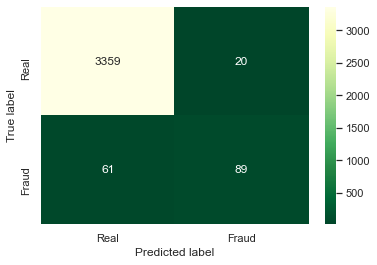

In [178]:
ax = sns.heatmap(conf_lgb_gs, annot=True, fmt="d", cmap=sns.color_palette("YlGn_r", as_cmap=True))
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

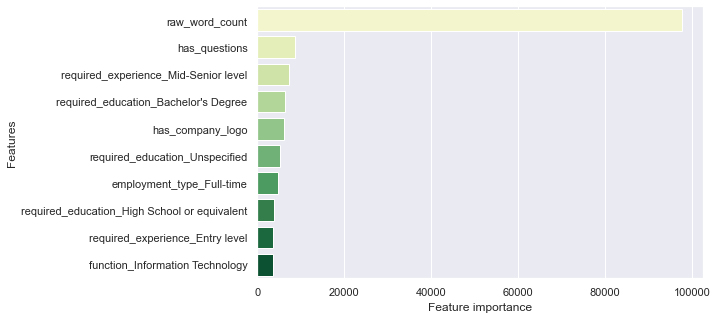

In [180]:
# For plotting purpose
lgb_gs = LGBMClassifier(random_state=123, learning_rate=0.01, max_depth=25, n_estimators=600, num_leaves=500)
lgb_gs.fit(X_train.values, y_train)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(lgb_gs.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='YlGn')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Summary of best results for stage 1:

- **Random Forest**: Original accuracy = 0.9762, Fraud recall = 0.6200
- **Random Forest (Self-tuned)**: Original accuracy = 0.9787, Fraud recall = 0.5467
- **XGBoost**: Original accuracy = 0.9785, Fraud recall = 0.5667
- **XGBoost (GS)**: Original accuracy = 0.9796, Fraud recall = 0.5867
- **LightGBM**: Original accuracy = 0.9787, Fraud recall = 0.5733
- **LightGBM (Self-tuned)**: Original accuracy = 0.9790, Fraud recall = 0.6000

The rough idea we have from just training 3 simple algorithms is that model **XGBoost with Grid Search** performs the best with accuracy of **0.9796** while model **Random Forest** performed best in terms of recall with value of **0.6200** for the fraud class which is the main class that we want to focus on.

## Stage 2: Original data with Random Oversampling

### 1. Random Forest Classifier

In [181]:
# Create the classifier object
rf_over = RandomForestClassifier(random_state=123)

# Train the model
rf_over.fit(X_train_over, y_train_over)

# Output the test accuracy
rf_over.score(X_test_over, y_test_over)

0.9733635590818929

In [182]:
y_pred = rf_over.predict(X_test_over)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_over = confusion_matrix(y_test_over, y_pred)
print(conf_rf_over)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3338   41]
 [  53   97]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9844    0.9879    0.9861      3379
       Fraud     0.7029    0.6467    0.6736       150

    accuracy                         0.9734      3529
   macro avg     0.8436    0.8173    0.8299      3529
weighted avg     0.9724    0.9734    0.9728      3529



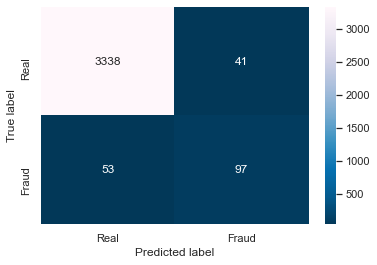

In [183]:
ax = sns.heatmap(conf_rf_over, annot=True, fmt="d", cmap="PuBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

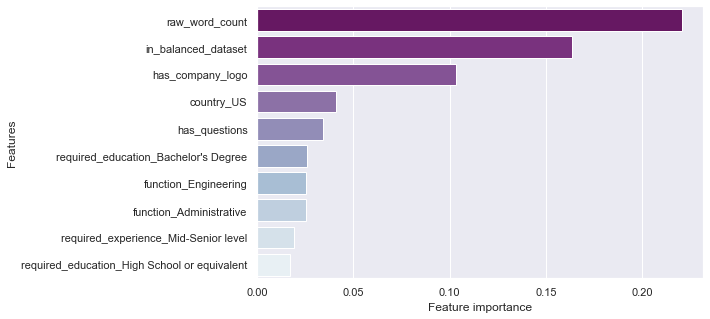

In [184]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_over.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='BuPu_r')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Using Grid Search Tuned Parameters

In [185]:
# Create the classifier object
rf_over_gs = RandomForestClassifier(max_depth=38, max_features=4, min_samples_leaf=1, min_samples_split=2, 
                                    n_estimators=100, random_state=123)

# Train the model
rf_over_gs.fit(X_train_over, y_train_over)

# Output the test accuracy
rf_over_gs.score(X_test_over, y_test_over)

0.9736469254746387

In [186]:
y_pred = rf_over_gs.predict(X_test_over)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_over_gs = confusion_matrix(y_test_over, y_pred)
print(conf_rf_over_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3339   40]
 [  53   97]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9844    0.9882    0.9863      3379
       Fraud     0.7080    0.6467    0.6760       150

    accuracy                         0.9736      3529
   macro avg     0.8462    0.8174    0.8311      3529
weighted avg     0.9726    0.9736    0.9731      3529



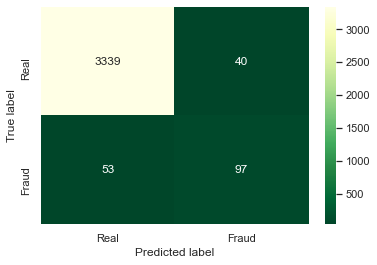

In [187]:
ax = sns.heatmap(conf_rf_over_gs, annot=True, fmt="d", cmap="YlGn_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

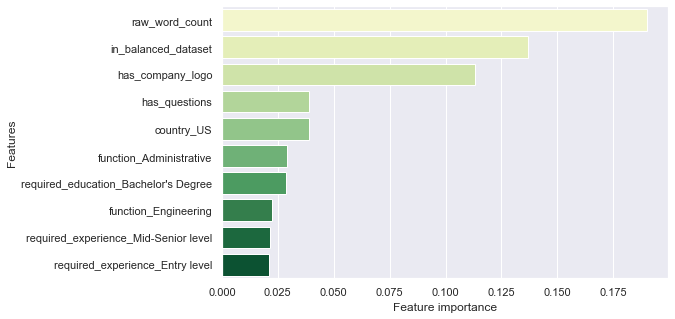

In [188]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_over_gs.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='YlGn')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

### 2. XGBoost Classifier

In [189]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_over = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_over.fit(X_train_over.values, y_train_over)

# Output the test accuracy
xgb_over.score(X_test_over.values, y_test_over)

0.9611788041938226

In [191]:
y_pred = xgb_over.predict(X_test_over.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_over = confusion_matrix(y_test_over, y_pred)
print(conf_xgb_over)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3281   98]
 [  39  111]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9883    0.9710    0.9795      3379
       Fraud     0.5311    0.7400    0.6184       150

    accuracy                         0.9612      3529
   macro avg     0.7597    0.8555    0.7990      3529
weighted avg     0.9688    0.9612    0.9642      3529



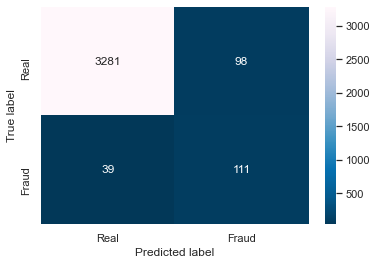

In [192]:
ax = sns.heatmap(conf_xgb_over, annot=True, fmt="d", cmap="PuBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

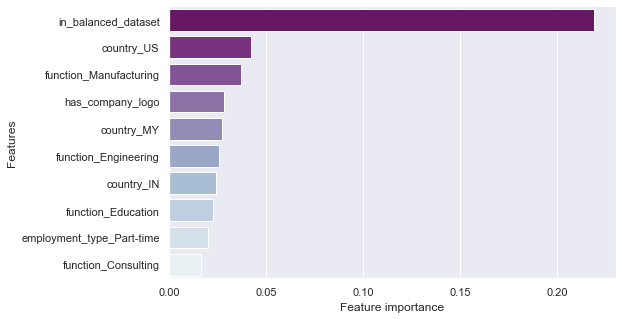

In [193]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(xgb_over.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='BuPu_r')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Using Grid Search Tuned Parameters

In [194]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_over_gs = XGBClassifier(colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8, 
                            random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_over_gs.fit(X_train_over.values, y_train_over)

# Output the test accuracy
xgb_over_gs.score(X_test_over.values, y_test_over)

0.9750637574383678

In [195]:
y_pred = xgb_over_gs.predict(X_test_over.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_over_gs = confusion_matrix(y_test_over, y_pred)
print(conf_xgb_over_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3341   38]
 [  50  100]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9853    0.9888    0.9870      3379
       Fraud     0.7246    0.6667    0.6944       150

    accuracy                         0.9751      3529
   macro avg     0.8549    0.8277    0.8407      3529
weighted avg     0.9742    0.9751    0.9746      3529



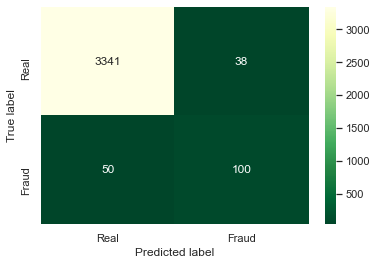

In [196]:
ax = sns.heatmap(conf_xgb_over_gs, annot=True, fmt="d", cmap="YlGn_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

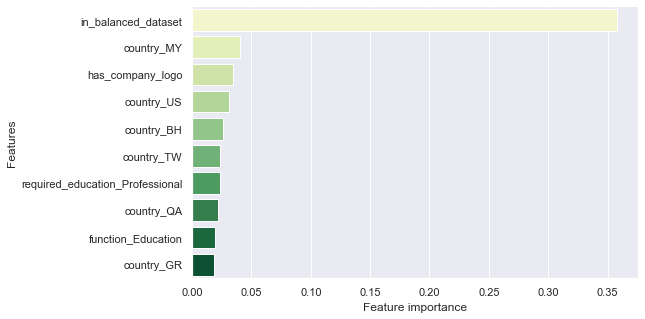

In [197]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(xgb_over_gs.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='YlGn')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

### 3. Light Gradient Boosting Machine

In [122]:
# Create the model object
lgb_over = LGBMClassifier(random_state=123)

# Train the lgbm model
lgb_over.fit(X_train_over.values, y_train_over, eval_metric='Accuracy')

# Output the test accuracy
lgb_over.score(X_test_over.values, y_test_over)

0.955794842731652

In [123]:
y_pred = lgb_over.predict(X_test_over.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_over = confusion_matrix(y_test_over, y_pred)
print(conf_lgb_over)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3256  123]
 [  33  117]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9900    0.9636    0.9766      3379
       Fraud     0.4875    0.7800    0.6000       150

    accuracy                         0.9558      3529
   macro avg     0.7387    0.8718    0.7883      3529
weighted avg     0.9686    0.9558    0.9606      3529



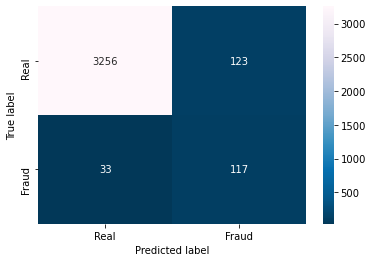

In [124]:
ax = sns.heatmap(conf_lgb_over, annot=True, fmt="d", cmap="PuBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

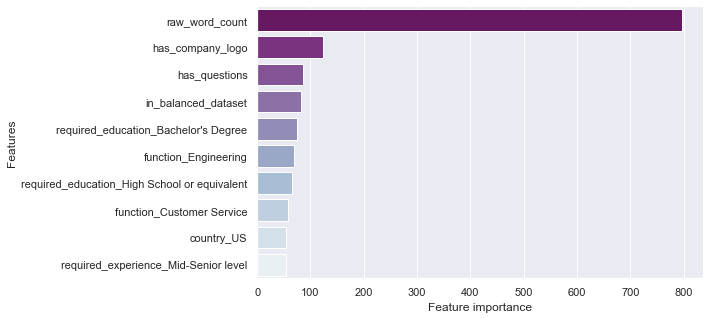

In [201]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(lgb_over.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='BuPu_r')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Using Grid Search Tuned Parameters

In [203]:
lgb_over_gs = LGBMClassifier(learning_rate=0.015, max_depth=15, n_estimators=600, num_leaves=150, random_state=123)

# Train the model
lgb_over_gs.fit(X_train_over.values, y_train_over)

# Output the test accuracy
lgb_over_gs.score(X_test_over.values, y_test_over)

0.9642958345140267

In [204]:
y_pred = lgb_over_gs.predict(X_test_over.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_over_gs = confusion_matrix(y_test_over, y_pred)
print(conf_lgb_over_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3295   84]
 [  42  108]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9874    0.9751    0.9812      3379
       Fraud     0.5625    0.7200    0.6316       150

    accuracy                         0.9643      3529
   macro avg     0.7750    0.8476    0.8064      3529
weighted avg     0.9694    0.9643    0.9664      3529



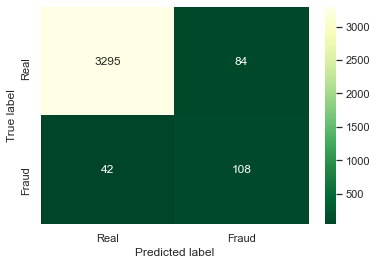

In [205]:
ax = sns.heatmap(conf_lgb_over_gs, annot=True, fmt="d", cmap="YlGn_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

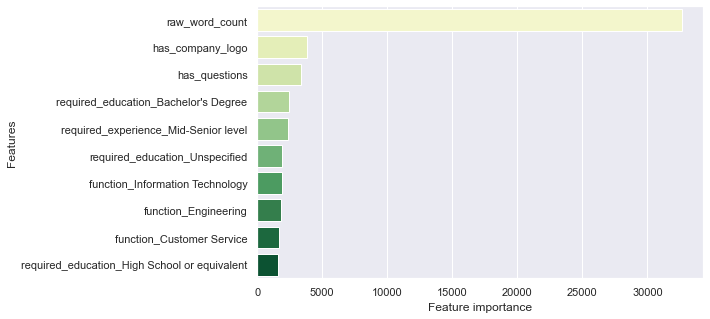

In [206]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(lgb_over_gs.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='YlGn')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Summary of best model results for Stage 2:

- **Random Forest**: Original accuracy = 0.9734, Fraud recall = 0.6467
- **Random Forest (Tuned parameter)**: Tuned accuracy = 0.9736, Fraud recall = 0.6467
- **XGBoost**: Original accuracy = 0.9612, Fraud recall = 0.7400
- **XGBoost (Tuned parameter)**: Tuned accuracy = 0.9751, Fraud recall = 0.6667
- **LightGBM**: Original accuracy = 0.9558, Fraud recall = 0.7800
- **LightGBM (Tuned parameter)**: Tuned accuracy = 0.9643, Fraud recall = 0.7200

After applying random oversampling, the results we have from training 3 simple algorithms is that model **XGBoost with Grid Search parameters** performs the best with accuracy of **0.9751** while model **LightGBM** performed best in terms of recall with value of **0.7800** for the fraud class which is the main class that we want to focus on.

## Stage 3: Original data with SMOTE Sampling

### 1. Random Forest Classifier

In [207]:
# Create the classifier object
rf_smote = RandomForestClassifier(random_state=123)

# Train the model
rf_smote.fit(X_train_smote, y_train_smote)

# Output the test accuracy
rf_smote.score(X_test_smote, y_test_smote)

0.9736469254746387

In [208]:
y_pred = rf_smote.predict(X_test_smote)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_smote = confusion_matrix(y_test_smote, y_pred)
print(conf_rf_smote)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3342   37]
 [  56   94]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9835    0.9891    0.9863      3379
       Fraud     0.7176    0.6267    0.6690       150

    accuracy                         0.9736      3529
   macro avg     0.8505    0.8079    0.8277      3529
weighted avg     0.9722    0.9736    0.9728      3529



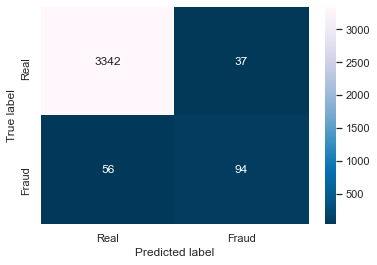

In [209]:
ax = sns.heatmap(conf_rf_smote, annot=True, fmt="d", cmap="PuBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

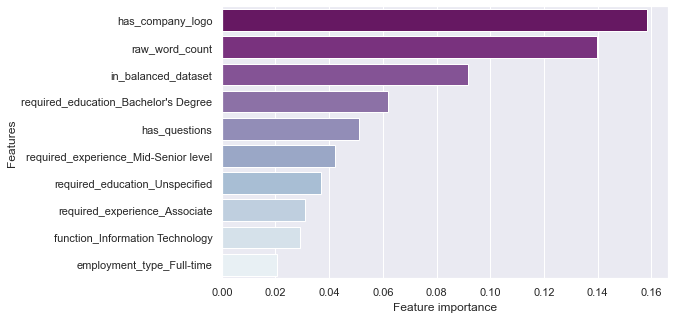

In [210]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_smote.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='BuPu_r')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Using Grid Search Tuned Parameters

In [211]:
# Create the classifier object
rf_smote_gs = RandomForestClassifier(max_depth=38, max_features=4, min_samples_leaf=1, min_samples_split=2, 
                                    n_estimators=100, random_state=123)

# Train the model
rf_smote_gs.fit(X_train_smote, y_train_smote)

# Output the test accuracy
rf_smote_gs.score(X_test_smote, y_test_smote)

0.9770473221875886

In [212]:
y_pred = rf_smote_gs.predict(X_test_smote)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_smote_gs = confusion_matrix(y_test_smote, y_pred)
print(conf_rf_smote_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3352   27]
 [  54   96]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9841    0.9920    0.9881      3379
       Fraud     0.7805    0.6400    0.7033       150

    accuracy                         0.9770      3529
   macro avg     0.8823    0.8160    0.8457      3529
weighted avg     0.9755    0.9770    0.9760      3529



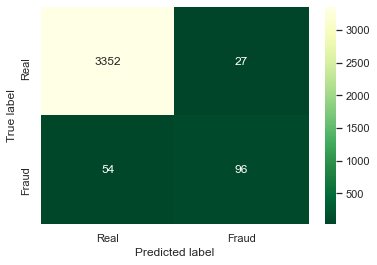

In [213]:
ax = sns.heatmap(conf_rf_smote_gs, annot=True, fmt="d", cmap="YlGn_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

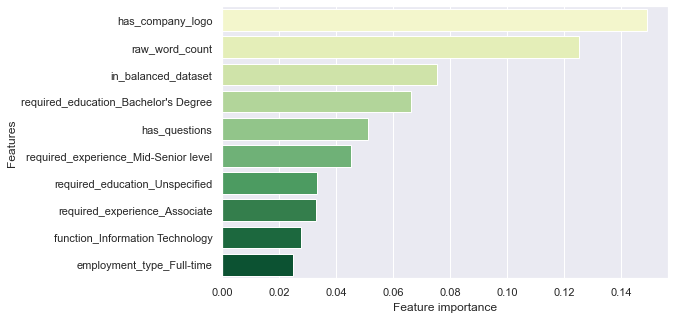

In [214]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_smote_gs.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='YlGn')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

### 2. XGBoost Classifier

In [215]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_smote = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_smote.fit(X_train_smote.values, y_train_smote)

# Output the test accuracy
xgb_smote.score(X_test_smote.values, y_test_smote)

0.9725134599036555

In [216]:
y_pred = xgb_smote.predict(X_test_smote.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_smote = confusion_matrix(y_test_smote, y_pred)
print(conf_xgb_smote)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3338   41]
 [  56   94]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9835    0.9879    0.9857      3379
       Fraud     0.6963    0.6267    0.6596       150

    accuracy                         0.9725      3529
   macro avg     0.8399    0.8073    0.8227      3529
weighted avg     0.9713    0.9725    0.9718      3529



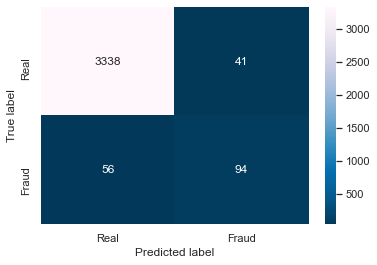

In [217]:
ax = sns.heatmap(conf_xgb_smote, annot=True, fmt="d", cmap="PuBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

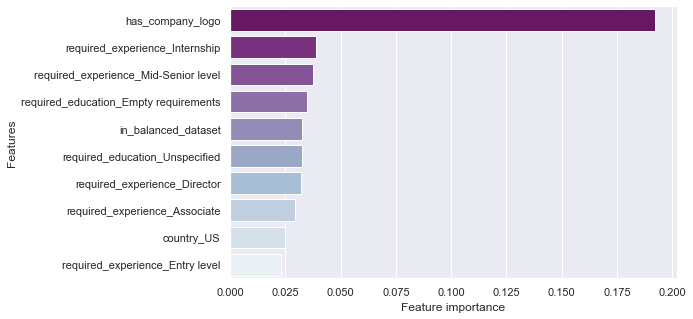

In [218]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(xgb_smote.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='BuPu_r')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Using Grid Search Tuned Parameters

In [219]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_smote_gs = XGBClassifier(colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8, 
                             random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_smote_gs.fit(X_train_smote.values, y_train_smote)

# Output the test accuracy
xgb_smote_gs.score(X_test_smote.values, y_test_smote)

0.9750637574383678

In [220]:
y_pred = xgb_smote_gs.predict(X_test_smote.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_smote_gs = confusion_matrix(y_test_smote, y_pred)
print(conf_xgb_smote_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3352   27]
 [  61   89]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9821    0.9920    0.9870      3379
       Fraud     0.7672    0.5933    0.6692       150

    accuracy                         0.9751      3529
   macro avg     0.8747    0.7927    0.8281      3529
weighted avg     0.9730    0.9751    0.9735      3529



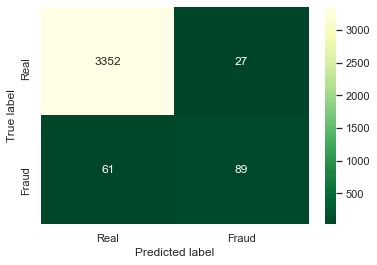

In [221]:
ax = sns.heatmap(conf_xgb_smote_gs, annot=True, fmt="d", cmap="YlGn_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

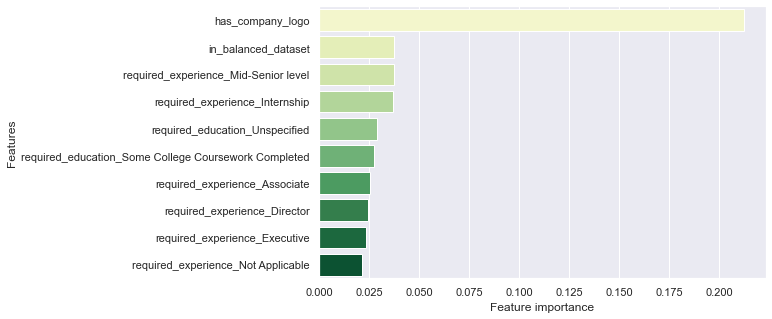

In [222]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(xgb_smote_gs.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='YlGn')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

### 3. Light Gradient Boosting Machine

In [223]:
# Create the model object
lgb_smote = LGBMClassifier(random_state=123)

# Train the lgbm model
lgb_smote.fit(X_train_smote.values, y_train_smote, eval_metric='Accuracy')

# Output the test accuracy
lgb_smote.score(X_test_smote.values, y_test_smote)

0.9750637574383678

In [224]:
y_pred = lgb_smote.predict(X_test_smote.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_smote = confusion_matrix(y_test_smote, y_pred)
print(conf_lgb_smote)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3346   33]
 [  55   95]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9838    0.9902    0.9870      3379
       Fraud     0.7422    0.6333    0.6835       150

    accuracy                         0.9751      3529
   macro avg     0.8630    0.8118    0.8352      3529
weighted avg     0.9736    0.9751    0.9741      3529



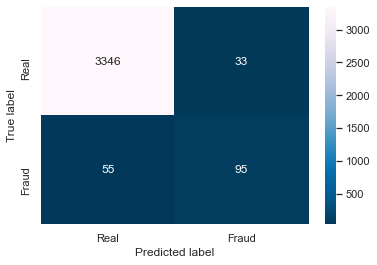

In [225]:
ax = sns.heatmap(conf_lgb_smote, annot=True, fmt="d", cmap="PuBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

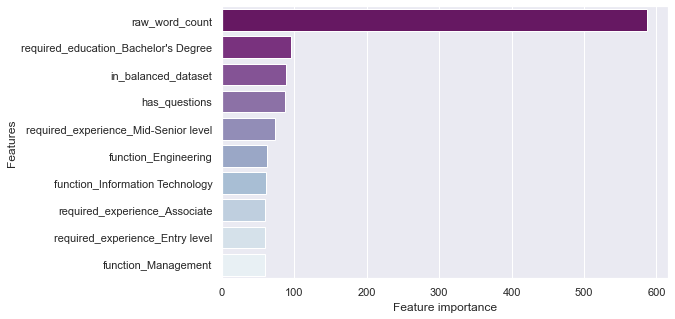

In [226]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(lgb_smote.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='BuPu_r')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Using Grid Search Tuned Parameters

In [227]:
# Create the model object
lgb_smote_gs = LGBMClassifier(learning_rate=0.015, max_depth=15, n_estimators=600, num_leaves=150, random_state=123)

# Train the lgbm model
lgb_smote_gs.fit(X_train_smote.values, y_train_smote, eval_metric='Accuracy')

# Output the test accuracy
lgb_smote_gs.score(X_test_smote.values, y_test_smote)

0.9742136582601304

In [228]:
y_pred = lgb_smote_gs.predict(X_test_smote.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_smote_gs = confusion_matrix(y_test_smote, y_pred)
print(conf_lgb_smote_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3348   31]
 [  60   90]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9824    0.9908    0.9866      3379
       Fraud     0.7438    0.6000    0.6642       150

    accuracy                         0.9742      3529
   macro avg     0.8631    0.7954    0.8254      3529
weighted avg     0.9723    0.9742    0.9729      3529



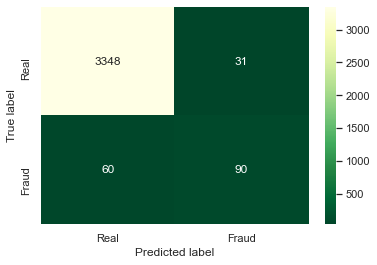

In [229]:
ax = sns.heatmap(conf_lgb_smote_gs, annot=True, fmt="d", cmap="YlGn_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

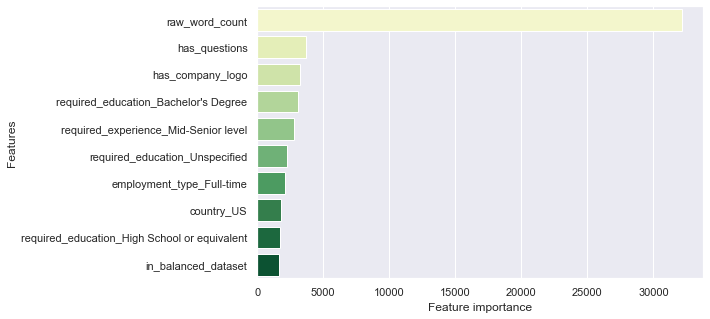

In [230]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(lgb_smote_gs.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='YlGn')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Summary of best model results for Stage 3:

- **Random Forest**: Original accuracy = 0.9736, Fraud recall = 0.6267
- **Random Forest (Tuned parameter)**: Tuned accuracy = 0.9770, Fraud recall = 0.6400
- **XGBoost**: Original accuracy = 0.9725, Fraud recall = 0.6267
- **XGBoost (Tuned parameter)**: Tuned accuracy = 0.9751, Fraud recall = 0.5933
- **LightGBM**: Original accuracy = 0.9751, Fraud recall = 0.6333
- **LightGBM (Tuned parameter)**: Tuned accuracy = 0.9742, Fraud recall = 0.6000

After applying SMOTE sampling, the results we have from training 3 simple algorithms is not as good as oversampling, in which **Random Forest with Grid Search parameters** performs the best with accuracy of **0.9770** while **Random Forest with Grid Search parameters** also performed best in terms of recall with value of **0.6400** for the fraud class which is the main class that we want to focus on.

### Conclusion on Part 1 Modeling (Structured data):

Overall, the best performing model in terms of accuracy is **XGBoost with Grid Search parameters** that is trained with the **Original imbalanced distribution**, with an accuracy of **0.9796**. In terms of recall for minority Fraudulent class, the best model is the **LightGBM** model that is trained with **Random Oversampling**, obtaining a recall of **0.7800**.

# Part 2: Using Unstructured data with CountVectorizer

## Prepare the Sampled data for Vectorized Data

Note that we are recycling the variable names for training and testing data just to save some memory.

In [33]:
# Convert to float16 before sampling
X_count_vect = X_count_vect.astype('float16')
X_count_vect.dtype

dtype('float16')

### Oversampling

In [34]:
# Perform the train test stratified split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_count_vect, 
                                                                        df_text['fraudulent'], 
                                                                        test_size=0.2, random_state=123)

# Oversampling
oversample = RandomOverSampler(sampling_strategy=0.6667, random_state=123)

# Transform the data
X_train_over, y_train_over = oversample.fit_resample(X_train_over, y_train_over)

# View the target distribution
y_train_over.value_counts()

0    13408
1     8939
Name: fraudulent, dtype: int64

### SMOTE sampling

In [35]:
# Perform the train test stratified split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_count_vect, 
                                                                            df_text['fraudulent'], 
                                                                            test_size=0.2, random_state=123)

# SMOTE sampling
smote = SMOTE(sampling_strategy=0.6667, random_state=123)

# Transform the data
X_train_smote, y_train_smote = smote.fit_resample(X_train_smote, y_train_smote)

# View the target distribution
y_train_smote.value_counts()

0    13408
1     8939
Name: fraudulent, dtype: int64

## Stage 1: Original data without sampling

We'll take a look at the vectorized data before we perform the training and testing of models.

In [41]:
pd.DataFrame(X_count_vect)

0      1      2      3      4      5      6      7      8      9      \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
17640    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17641    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17642    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17643    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17644    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       10     11     12     13     14     15     16     17     18     19     \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
17640    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17641    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17642    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17643    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17644    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       20     21     22     23     24     25     26     27     28     29     \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
17640    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17641    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17642    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17643    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17644    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       30     31     32     33     34     35     36     37     38     39     \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
17640    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17641    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17642    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17643    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17644    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       40     41     42     43     44     45     46     47     48     49     \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.

In [42]:
# Perform the train test stratified split
X_train, X_test, y_train, y_test = train_test_split(X_count_vect, df_text['fraudulent'], test_size=0.2, random_state=123)

# View the dimension of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14116, 42596), (3529, 42596), (14116,), (3529,))

### 1. Random Forest

In [43]:
# Create the classifier object
rf_countvect = RandomForestClassifier(random_state=123)

# Train the model
rf_countvect.fit(X_train, y_train)

# Output the test accuracy
rf_countvect.score(X_test, y_test)

0.9863984131482006

In [54]:
rf_countvect.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [44]:
y_pred = rf_countvect.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_countvect = confusion_matrix(y_test, y_pred)
print(conf_rf_countvect)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3379    0]
 [  48  102]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9860    1.0000    0.9929      3379
       Fraud     1.0000    0.6800    0.8095       150

    accuracy                         0.9864      3529
   macro avg     0.9930    0.8400    0.9012      3529
weighted avg     0.9866    0.9864    0.9852      3529



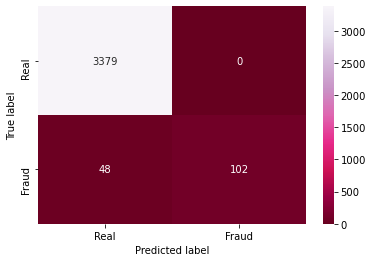

In [45]:
ax = sns.heatmap(conf_rf_countvect, annot=True, fmt="d", cmap="PuRd_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Simple Grid Search Hyperparameter Tuning

Due to system limitations, we'll change 10 fold to only 5 fold cv to speed things up and prevents system failure. The HalvingGridSearchCV function can speed up the process up to 11 times faster than grid search cv, which we'll use for vectorized data.

In [48]:
rf_countvect_gs = RandomForestClassifier(random_state=123)

# Create the parameter grid based on google results of random search 
param_grid = {
    'max_depth': [10, 15, 20, 25, 30],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300]
}

gs = HalvingGridSearchCV(estimator = rf_countvect_gs, param_grid = param_grid, cv = 5, n_jobs = 1, scoring = 'accuracy', 
                         verbose = 10, min_resources='exhaust', factor=3)             

# Train the model with Grid Search
rf_countvect_gs = gs.fit(X_train, y_train)

# Output the test accuracy
rf_countvect_gs.score(X_test, y_test)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 58
max_resources_: 14116
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 540
n_resources: 58
Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5; 1/540] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 1/540] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.935, test=0.818) total time=   0.4s
[CV 2/5; 1/540] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 1/540] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.935, test=1.000) total time=   0.0s
[CV 3/5; 1/540] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 1/540] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_sp

[CV 5/5; 6/540] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.978, test=1.000) total time=   0.3s
[CV 1/5; 7/540] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 1/5; 7/540] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.935, test=0.818) total time=   0.0s
[CV 2/5; 7/540] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 2/5; 7/540] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.935, test=1.000) total time=   0.1s
[CV 3/5; 7/540] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 3/5; 7/540] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=1.000, test=0.909) total time=   0.0s
[CV 4/5; 7/540] START max_

[CV 2/5; 13/540] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=(train=0.935, test=1.000) total time=   0.0s
[CV 3/5; 13/540] START max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100
[CV 3/5; 13/540] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=(train=1.000, test=0.909) total time=   0.0s
[CV 4/5; 13/540] START max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100
[CV 4/5; 13/540] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=(train=0.957, test=1.000) total time=   0.1s
[CV 5/5; 13/540] START max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100
[CV 5/5; 13/540] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=(train=0.978, test=1.000) total time=   0.1s
[CV 1/5; 14/540] ST

[CV 4/5; 19/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.957, test=1.000) total time=   0.1s
[CV 5/5; 19/540] START max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 5/5; 19/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.978, test=1.000) total time=   0.1s
[CV 1/5; 20/540] START max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 1/5; 20/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 20/540] START max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 2/5; 20/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 20/540] ST

[CV 1/5; 26/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 26/540] START max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 2/5; 26/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 26/540] START max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 3/5; 26/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 26/540] START max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 4/5; 26/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 26/540] ST

[CV 2/5; 32/540] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 32/540] START max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 32/540] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 32/540] START max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 4/5; 32/540] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 32/540] START max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 5/5; 32/540] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.978, test=1.000) total time=   0.2s
[CV 1/5; 33/540] ST

[CV 3/5; 38/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 38/540] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 4/5; 38/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 38/540] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 5/5; 38/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.978, test=1.000) total time=   0.2s
[CV 1/5; 39/540] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 1/5; 39/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.935, test=0.818) total time=   0.3s
[CV 2/5; 39/540] ST

[CV 4/5; 44/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 44/540] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 5/5; 44/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.978, test=1.000) total time=   0.2s
[CV 1/5; 45/540] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 1/5; 45/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.935, test=0.818) total time=   0.3s
[CV 2/5; 45/540] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 2/5; 45/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.935, test=1.000) total time=   0.3s
[CV 3/5; 45/540] ST

[CV 5/5; 50/540] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.978, test=1.000) total time=   0.2s
[CV 1/5; 51/540] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300
[CV 1/5; 51/540] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=(train=0.935, test=0.818) total time=   0.3s
[CV 2/5; 51/540] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300
[CV 2/5; 51/540] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=(train=0.935, test=1.000) total time=   0.3s
[CV 3/5; 51/540] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300
[CV 3/5; 51/540] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=(train=1.000, test=0.909) total time=   0.3s
[CV 4/5; 51/540] ST

[CV 1/5; 57/540] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.935, test=0.818) total time=   0.3s
[CV 2/5; 57/540] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 2/5; 57/540] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.935, test=1.000) total time=   0.3s
[CV 3/5; 57/540] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 3/5; 57/540] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=1.000, test=0.909) total time=   0.3s
[CV 4/5; 57/540] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300
[CV 4/5; 57/540] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.978, test=1.000) total time=   0.3s
[CV 5/5; 57/540] ST

[CV 2/5; 63/540] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300;, score=(train=0.935, test=1.000) total time=   0.3s
[CV 3/5; 63/540] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300
[CV 3/5; 63/540] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300;, score=(train=1.000, test=0.909) total time=   0.3s
[CV 4/5; 63/540] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300
[CV 4/5; 63/540] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300;, score=(train=0.957, test=1.000) total time=   0.3s
[CV 5/5; 63/540] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300
[CV 5/5; 63/540] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300;, score=(train=0.978, test=1.000) total time=   0.3s
[CV 1/5; 64/540] ST

[CV 3/5; 69/540] END max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=(train=1.000, test=0.909) total time=   0.3s
[CV 4/5; 69/540] START max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300
[CV 4/5; 69/540] END max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=(train=0.957, test=1.000) total time=   0.3s
[CV 5/5; 69/540] START max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300
[CV 5/5; 69/540] END max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=(train=0.978, test=1.000) total time=   0.3s
[CV 1/5; 70/540] START max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100
[CV 1/5; 70/540] END max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=(train=0.935, test=0.818) total time=   0.0s
[CV 2/5; 70/540] ST

[CV 4/5; 75/540] END max_depth=10, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=(train=0.957, test=1.000) total time=   0.3s
[CV 5/5; 75/540] START max_depth=10, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=300
[CV 5/5; 75/540] END max_depth=10, max_features=4, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=(train=0.978, test=1.000) total time=   0.3s
[CV 1/5; 76/540] START max_depth=10, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 1/5; 76/540] END max_depth=10, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.935, test=0.818) total time=   0.0s
[CV 2/5; 76/540] START max_depth=10, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 2/5; 76/540] END max_depth=10, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.935, test=1.000) total time=   0.0s
[CV 3/5; 76/540] ST

[CV 5/5; 81/540] END max_depth=10, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.978, test=1.000) total time=   0.3s
[CV 1/5; 82/540] START max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 82/540] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.935, test=0.818) total time=   0.0s
[CV 2/5; 82/540] START max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 82/540] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.935, test=1.000) total time=   0.0s
[CV 3/5; 82/540] START max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 82/540] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.909) total time=   0.0s
[CV 4/5; 82/540] ST

[CV 2/5; 88/540] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.935, test=1.000) total time=   0.0s
[CV 3/5; 88/540] START max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 3/5; 88/540] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=1.000, test=0.909) total time=   0.0s
[CV 4/5; 88/540] START max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 4/5; 88/540] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.957, test=1.000) total time=   0.0s
[CV 5/5; 88/540] START max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 5/5; 88/540] END max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.978, test=1.000) total time=   0.0s
[CV 1/5; 89/540] ST

[CV 4/5; 94/540] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=(train=0.957, test=1.000) total time=   0.1s
[CV 5/5; 94/540] START max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100
[CV 5/5; 94/540] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=(train=0.978, test=1.000) total time=   0.0s
[CV 1/5; 95/540] START max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 1/5; 95/540] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 95/540] START max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 2/5; 95/540] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 95/540] ST

[CV 4/5; 100/540] END max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.957, test=1.000) total time=   0.0s
[CV 5/5; 100/540] START max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 5/5; 100/540] END max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.978, test=1.000) total time=   0.0s
[CV 1/5; 101/540] START max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 1/5; 101/540] END max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 101/540] START max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 2/5; 101/540] END max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 101

[CV 4/5; 106/540] END max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=(train=0.957, test=1.000) total time=   0.0s
[CV 5/5; 106/540] START max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100
[CV 5/5; 106/540] END max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=(train=0.978, test=1.000) total time=   0.0s
[CV 1/5; 107/540] START max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 1/5; 107/540] END max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 107/540] START max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 2/5; 107/540] END max_depth=10, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 107

[CV 5/5; 112/540] START max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 5/5; 112/540] END max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.978, test=1.000) total time=   0.1s
[CV 1/5; 113/540] START max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 1/5; 113/540] END max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.3s
[CV 2/5; 113/540] START max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 2/5; 113/540] END max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 113/540] START max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 113/540] END max_depth=15, max_features=2, min_samples

[CV 1/5; 119/540] END max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 119/540] START max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/5; 119/540] END max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 119/540] START max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 3/5; 119/540] END max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 119/540] START max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 4/5; 119/540] END max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 119

[CV 1/5; 125/540] END max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 125/540] START max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 2/5; 125/540] END max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 125/540] START max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 3/5; 125/540] END max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 125/540] START max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 4/5; 125/540] END max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 125

[CV 1/5; 131/540] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 131/540] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 2/5; 131/540] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 131/540] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 3/5; 131/540] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 131/540] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 4/5; 131/540] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 131

[CV 1/5; 137/540] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=0.818) total time=   0.2s
[CV 2/5; 137/540] START max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 137/540] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.978, test=1.000) total time=   0.2s
[CV 3/5; 137/540] START max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 137/540] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 137/540] START max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 4/5; 137/540] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5; 137

[CV 1/5; 143/540] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 143/540] START max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 2/5; 143/540] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 143/540] START max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 3/5; 143/540] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 143/540] START max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 4/5; 143/540] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 143

[CV 1/5; 149/540] END max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 149/540] START max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 2/5; 149/540] END max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 149/540] START max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 3/5; 149/540] END max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 149/540] START max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 4/5; 149/540] END max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 149

[CV 1/5; 155/540] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 155/540] START max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 2/5; 155/540] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 155/540] START max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 3/5; 155/540] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 155/540] START max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 4/5; 155/540] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 155

[CV 1/5; 161/540] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 161/540] START max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 2/5; 161/540] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 161/540] START max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 3/5; 161/540] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 161/540] START max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 4/5; 161/540] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 161

[CV 1/5; 173/540] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 173/540] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/5; 173/540] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 173/540] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 3/5; 173/540] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 173/540] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 4/5; 173/540] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 173

[CV 1/5; 179/540] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 179/540] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 2/5; 179/540] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 179/540] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 3/5; 179/540] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 179/540] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 4/5; 179/540] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 179

[CV 1/5; 185/540] END max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 185/540] START max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 2/5; 185/540] END max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 185/540] START max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 3/5; 185/540] END max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 185/540] START max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 4/5; 185/540] END max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 185

[CV 1/5; 191/540] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=0.818) total time=   0.2s
[CV 2/5; 191/540] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 191/540] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.978, test=1.000) total time=   0.2s
[CV 3/5; 191/540] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 191/540] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 191/540] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 4/5; 191/540] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5; 191

[CV 1/5; 197/540] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 197/540] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 2/5; 197/540] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 197/540] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 3/5; 197/540] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 197/540] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 4/5; 197/540] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 197

[CV 1/5; 203/540] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 203/540] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 2/5; 203/540] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 203/540] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 3/5; 203/540] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 203/540] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 4/5; 203/540] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 203

[CV 1/5; 209/540] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 209/540] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 2/5; 209/540] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 209/540] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 3/5; 209/540] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 209/540] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 4/5; 209/540] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 209

[CV 1/5; 215/540] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 215/540] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 2/5; 215/540] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 215/540] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 3/5; 215/540] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.1s
[CV 4/5; 215/540] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 4/5; 215/540] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 215

[CV 1/5; 221/540] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.818) total time=   0.2s
[CV 2/5; 221/540] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 2/5; 221/540] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 3/5; 221/540] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 221/540] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 221/540] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 4/5; 221/540] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 221

[CV 1/5; 227/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 227/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/5; 227/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 227/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 3/5; 227/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 227/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 4/5; 227/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 227

[CV 1/5; 233/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 233/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 2/5; 233/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 233/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 3/5; 233/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 233/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 4/5; 233/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 233

[CV 1/5; 239/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 239/540] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 2/5; 239/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 239/540] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 3/5; 239/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 239/540] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 4/5; 239/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 239

[CV 1/5; 245/540] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.818) total time=   0.2s
[CV 2/5; 245/540] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 245/540] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/5; 245/540] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 245/540] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 245/540] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 4/5; 245/540] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5; 245

[CV 1/5; 251/540] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 251/540] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 2/5; 251/540] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 3/5; 251/540] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 3/5; 251/540] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 251/540] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 4/5; 251/540] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 251

[CV 1/5; 257/540] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 257/540] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 2/5; 257/540] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 257/540] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 3/5; 257/540] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 257/540] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 4/5; 257/540] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 257

[CV 1/5; 263/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 263/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 2/5; 263/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 263/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 3/5; 263/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 263/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 4/5; 263/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 263

[CV 1/5; 269/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 269/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 2/5; 269/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 269/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 3/5; 269/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 269/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 4/5; 269/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 269

[CV 1/5; 275/540] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.818) total time=   0.2s
[CV 2/5; 275/540] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 2/5; 275/540] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 3/5; 275/540] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 275/540] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 275/540] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 4/5; 275/540] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 275

[CV 1/5; 281/540] END max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 281/540] START max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/5; 281/540] END max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 281/540] START max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 3/5; 281/540] END max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 281/540] START max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 4/5; 281/540] END max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 281

[CV 1/5; 287/540] END max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 287/540] START max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 2/5; 287/540] END max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 287/540] START max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 3/5; 287/540] END max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 287/540] START max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 4/5; 287/540] END max_depth=20, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 287

[CV 1/5; 293/540] END max_depth=20, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 293/540] START max_depth=20, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 2/5; 293/540] END max_depth=20, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 293/540] START max_depth=20, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 3/5; 293/540] END max_depth=20, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 293/540] START max_depth=20, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 4/5; 293/540] END max_depth=20, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 293

[CV 1/5; 299/540] END max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.818) total time=   0.3s
[CV 2/5; 299/540] START max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 299/540] END max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/5; 299/540] START max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 299/540] END max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 299/540] START max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 4/5; 299/540] END max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5; 299

[CV 1/5; 305/540] END max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 305/540] START max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 2/5; 305/540] END max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 305/540] START max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 3/5; 305/540] END max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 305/540] START max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 4/5; 305/540] END max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 305

[CV 1/5; 311/540] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 311/540] START max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 2/5; 311/540] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 311/540] START max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 3/5; 311/540] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 311/540] START max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 4/5; 311/540] END max_depth=20, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 311

[CV 1/5; 317/540] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 317/540] START max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 2/5; 317/540] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 317/540] START max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 3/5; 317/540] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 317/540] START max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 4/5; 317/540] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 317

[CV 1/5; 323/540] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 323/540] START max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 2/5; 323/540] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 323/540] START max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 3/5; 323/540] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 323/540] START max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 4/5; 323/540] END max_depth=20, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 323

[CV 1/5; 329/540] END max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.818) total time=   0.2s
[CV 2/5; 329/540] START max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 2/5; 329/540] END max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 3/5; 329/540] START max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 329/540] END max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 329/540] START max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 4/5; 329/540] END max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 329

[CV 1/5; 335/540] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 335/540] START max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/5; 335/540] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 335/540] START max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 3/5; 335/540] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 335/540] START max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 4/5; 335/540] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 335

[CV 1/5; 341/540] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 341/540] START max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 2/5; 341/540] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 341/540] START max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 3/5; 341/540] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 341/540] START max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 4/5; 341/540] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 341

[CV 1/5; 347/540] END max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 347/540] START max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 2/5; 347/540] END max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 347/540] START max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 3/5; 347/540] END max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 347/540] START max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 4/5; 347/540] END max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 347

[CV 1/5; 353/540] END max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.818) total time=   0.2s
[CV 2/5; 353/540] START max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 353/540] END max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/5; 353/540] START max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 353/540] END max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 353/540] START max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 4/5; 353/540] END max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5; 353

[CV 1/5; 359/540] END max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 359/540] START max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 2/5; 359/540] END max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 3/5; 359/540] START max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 3/5; 359/540] END max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 359/540] START max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 4/5; 359/540] END max_depth=25, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 359

[CV 1/5; 365/540] END max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 365/540] START max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 2/5; 365/540] END max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 365/540] START max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 3/5; 365/540] END max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 365/540] START max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 4/5; 365/540] END max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 365

[CV 1/5; 371/540] END max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 371/540] START max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 2/5; 371/540] END max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 371/540] START max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 3/5; 371/540] END max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 371/540] START max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 4/5; 371/540] END max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 371

[CV 1/5; 377/540] END max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 377/540] START max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 2/5; 377/540] END max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 377/540] START max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 3/5; 377/540] END max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 377/540] START max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 4/5; 377/540] END max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 377

[CV 1/5; 383/540] END max_depth=25, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.818) total time=   0.2s
[CV 2/5; 383/540] START max_depth=25, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 2/5; 383/540] END max_depth=25, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.978, test=1.000) total time=   0.2s
[CV 3/5; 383/540] START max_depth=25, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 383/540] END max_depth=25, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 383/540] START max_depth=25, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 4/5; 383/540] END max_depth=25, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 383

[CV 1/5; 389/540] END max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 389/540] START max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/5; 389/540] END max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 389/540] START max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 3/5; 389/540] END max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 389/540] START max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 4/5; 389/540] END max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 389

[CV 1/5; 395/540] END max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 395/540] START max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 2/5; 395/540] END max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 395/540] START max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 3/5; 395/540] END max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 395/540] START max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 4/5; 395/540] END max_depth=25, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 395

[CV 1/5; 401/540] END max_depth=25, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 401/540] START max_depth=25, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 2/5; 401/540] END max_depth=25, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 401/540] START max_depth=25, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 3/5; 401/540] END max_depth=25, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 401/540] START max_depth=25, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 4/5; 401/540] END max_depth=25, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 401

[CV 1/5; 407/540] END max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.818) total time=   0.2s
[CV 2/5; 407/540] START max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 407/540] END max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/5; 407/540] START max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 407/540] END max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 407/540] START max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 4/5; 407/540] END max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5; 407

[CV 1/5; 413/540] END max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 413/540] START max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 2/5; 413/540] END max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 413/540] START max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 3/5; 413/540] END max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 413/540] START max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 4/5; 413/540] END max_depth=25, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 413

[CV 1/5; 419/540] END max_depth=25, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 419/540] START max_depth=25, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 2/5; 419/540] END max_depth=25, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 419/540] START max_depth=25, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 3/5; 419/540] END max_depth=25, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 419/540] START max_depth=25, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 4/5; 419/540] END max_depth=25, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.1s
[CV 5/5; 419

[CV 1/5; 425/540] END max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 425/540] START max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 2/5; 425/540] END max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 425/540] START max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 3/5; 425/540] END max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 425/540] START max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 4/5; 425/540] END max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 425

[CV 1/5; 431/540] END max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 431/540] START max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 2/5; 431/540] END max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 431/540] START max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 3/5; 431/540] END max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 431/540] START max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 4/5; 431/540] END max_depth=25, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 431

[CV 1/5; 437/540] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.818) total time=   0.2s
[CV 2/5; 437/540] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 2/5; 437/540] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 3/5; 437/540] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 437/540] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 437/540] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 4/5; 437/540] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 437

[CV 1/5; 443/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 443/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/5; 443/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 443/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 3/5; 443/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 443/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 4/5; 443/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 443

[CV 1/5; 449/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 449/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 2/5; 449/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 449/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 3/5; 449/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 449/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 4/5; 449/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 449

[CV 1/5; 455/540] END max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 455/540] START max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 2/5; 455/540] END max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 455/540] START max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 3/5; 455/540] END max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 455/540] START max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 4/5; 455/540] END max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 455

[CV 1/5; 461/540] END max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.818) total time=   0.2s
[CV 2/5; 461/540] START max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 461/540] END max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/5; 461/540] START max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 461/540] END max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 461/540] START max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 4/5; 461/540] END max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5; 461

[CV 1/5; 467/540] END max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 467/540] START max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 2/5; 467/540] END max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 3/5; 467/540] START max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 3/5; 467/540] END max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 467/540] START max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 4/5; 467/540] END max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 467

[CV 1/5; 473/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 473/540] START max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 2/5; 473/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 473/540] START max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 3/5; 473/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 473/540] START max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 4/5; 473/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 473

[CV 1/5; 479/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 479/540] START max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 2/5; 479/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 479/540] START max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 3/5; 479/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 479/540] START max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 4/5; 479/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 479

[CV 1/5; 485/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 485/540] START max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 2/5; 485/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 485/540] START max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 3/5; 485/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 485/540] START max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 4/5; 485/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.1s
[CV 5/5; 485

[CV 1/5; 491/540] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.818) total time=   0.2s
[CV 2/5; 491/540] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 2/5; 491/540] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.978, test=1.000) total time=   0.2s
[CV 3/5; 491/540] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 491/540] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 491/540] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 4/5; 491/540] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 491

[CV 1/5; 497/540] END max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 497/540] START max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/5; 497/540] END max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 497/540] START max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 3/5; 497/540] END max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 497/540] START max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 4/5; 497/540] END max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 497

[CV 1/5; 503/540] END max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 503/540] START max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 2/5; 503/540] END max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 503/540] START max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 3/5; 503/540] END max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 503/540] START max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 4/5; 503/540] END max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 503

[CV 1/5; 509/540] END max_depth=30, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 509/540] START max_depth=30, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 2/5; 509/540] END max_depth=30, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 509/540] START max_depth=30, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 3/5; 509/540] END max_depth=30, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 509/540] START max_depth=30, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 4/5; 509/540] END max_depth=30, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 509

[CV 1/5; 515/540] END max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.818) total time=   0.2s
[CV 2/5; 515/540] START max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 515/540] END max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/5; 515/540] START max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 515/540] END max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.1s
[CV 4/5; 515/540] START max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 4/5; 515/540] END max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5; 515

[CV 1/5; 521/540] END max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 521/540] START max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 2/5; 521/540] END max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 521/540] START max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 3/5; 521/540] END max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.1s
[CV 4/5; 521/540] START max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 4/5; 521/540] END max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 521

[CV 1/5; 527/540] END max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 527/540] START max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 2/5; 527/540] END max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 527/540] START max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 3/5; 527/540] END max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 527/540] START max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 4/5; 527/540] END max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 527

[CV 1/5; 533/540] END max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 533/540] START max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 2/5; 533/540] END max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 533/540] START max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 3/5; 533/540] END max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.1s
[CV 4/5; 533/540] START max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 4/5; 533/540] END max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 533

[CV 1/5; 539/540] END max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=0.818) total time=   0.2s
[CV 2/5; 539/540] START max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 2/5; 539/540] END max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.935, test=1.000) total time=   0.2s
[CV 3/5; 539/540] START max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 3/5; 539/540] END max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.2s
[CV 4/5; 539/540] START max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 4/5; 539/540] END max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.957, test=1.000) total time=   0.2s
[CV 5/5; 539

[CV 1/5; 5/180] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.941) total time=   0.3s
[CV 2/5; 5/180] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 2/5; 5/180] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.964, test=0.941) total time=   0.2s
[CV 3/5; 5/180] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 5/180] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.971, test=0.912) total time=   0.2s
[CV 4/5; 5/180] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 4/5; 5/180] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.942, test=0.882) total time=   0.2s
[CV 5/5; 5/180] START max_

[CV 2/5; 11/180] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.964, test=0.941) total time=   0.3s
[CV 3/5; 11/180] START max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 3/5; 11/180] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.971, test=0.912) total time=   0.3s
[CV 4/5; 11/180] START max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 4/5; 11/180] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.942, test=0.882) total time=   0.3s
[CV 5/5; 11/180] START max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 5/5; 11/180] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.914, test=0.912) total time=   0.3s
[CV 1/5; 12/180] ST

[CV 4/5; 17/180] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.942, test=0.882) total time=   0.1s
[CV 5/5; 17/180] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 5/5; 17/180] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.914, test=0.912) total time=   0.1s
[CV 1/5; 18/180] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 1/5; 18/180] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.957, test=0.941) total time=   0.3s
[CV 2/5; 18/180] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 2/5; 18/180] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.964, test=0.941) total time=   0.4s
[CV 3/5; 18/180] ST

[CV 1/5; 24/180] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.957, test=0.941) total time=   0.3s
[CV 2/5; 24/180] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300
[CV 2/5; 24/180] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.964, test=0.941) total time=   0.3s
[CV 3/5; 24/180] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300
[CV 3/5; 24/180] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.971, test=0.912) total time=   0.3s
[CV 4/5; 24/180] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300
[CV 4/5; 24/180] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.942, test=0.882) total time=   0.3s
[CV 5/5; 24/180] ST

[CV 2/5; 30/180] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=(train=0.964, test=0.941) total time=   0.3s
[CV 3/5; 30/180] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300
[CV 3/5; 30/180] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=(train=0.971, test=0.912) total time=   0.3s
[CV 4/5; 30/180] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300
[CV 4/5; 30/180] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=(train=0.942, test=0.882) total time=   0.3s
[CV 5/5; 30/180] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300
[CV 5/5; 30/180] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=(train=0.914, test=0.912) total time=   0.3s
[CV 1/5; 31/180] ST

[CV 3/5; 36/180] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=(train=0.971, test=0.912) total time=   0.3s
[CV 4/5; 36/180] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300
[CV 4/5; 36/180] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=(train=0.942, test=0.882) total time=   0.3s
[CV 5/5; 36/180] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300
[CV 5/5; 36/180] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=(train=0.914, test=0.912) total time=   0.3s
[CV 1/5; 37/180] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 1/5; 37/180] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.941) total time=   0.2s
[CV 2/5; 37/180] ST

[CV 4/5; 42/180] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300;, score=(train=0.942, test=0.882) total time=   0.3s
[CV 5/5; 42/180] START max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300
[CV 5/5; 42/180] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300;, score=(train=0.914, test=0.912) total time=   0.4s
[CV 1/5; 43/180] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 1/5; 43/180] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.941) total time=   0.2s
[CV 2/5; 43/180] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 2/5; 43/180] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.964, test=0.941) total time=   0.2s
[CV 3/5; 43/180] ST

[CV 5/5; 48/180] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.914, test=0.912) total time=   0.2s
[CV 1/5; 49/180] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=100
[CV 1/5; 49/180] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=(train=0.957, test=0.941) total time=   0.1s
[CV 2/5; 49/180] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=100
[CV 2/5; 49/180] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 49/180] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=100
[CV 3/5; 49/180] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=(train=0.971, test=0.912) total time=   0.1s
[CV 4/5; 49/180] ST

[CV 2/5; 55/180] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 55/180] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 3/5; 55/180] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.971, test=0.912) total time=   0.1s
[CV 4/5; 55/180] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 4/5; 55/180] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.942, test=0.882) total time=   0.1s
[CV 5/5; 55/180] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 5/5; 55/180] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.912) total time=   0.1s
[CV 1/5; 56/180] ST

[CV 4/5; 61/180] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.942, test=0.882) total time=   0.1s
[CV 5/5; 61/180] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 5/5; 61/180] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.912) total time=   0.1s
[CV 1/5; 62/180] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 1/5; 62/180] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.957, test=0.941) total time=   0.1s
[CV 2/5; 62/180] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 2/5; 62/180] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 62/180] ST

[CV 5/5; 67/180] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=(train=0.914, test=0.912) total time=   0.1s
[CV 1/5; 68/180] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=300
[CV 1/5; 68/180] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=(train=0.957, test=0.941) total time=   0.3s
[CV 2/5; 68/180] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=300
[CV 2/5; 68/180] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=(train=0.964, test=0.941) total time=   0.3s
[CV 3/5; 68/180] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=300
[CV 3/5; 68/180] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=(train=0.971, test=0.912) total time=   0.3s
[CV 4/5; 68/180] ST

[CV 1/5; 74/180] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.957, test=0.941) total time=   0.3s
[CV 2/5; 74/180] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 2/5; 74/180] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.964, test=0.941) total time=   0.3s
[CV 3/5; 74/180] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 3/5; 74/180] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.971, test=0.912) total time=   0.3s
[CV 4/5; 74/180] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 4/5; 74/180] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.942, test=0.882) total time=   0.3s
[CV 5/5; 74/180] ST

[CV 2/5; 80/180] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 80/180] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 3/5; 80/180] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.971, test=0.912) total time=   0.1s
[CV 4/5; 80/180] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 4/5; 80/180] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.942, test=0.882) total time=   0.1s
[CV 5/5; 80/180] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 5/5; 80/180] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.914, test=0.912) total time=   0.1s
[CV 1/5; 81/180] ST

[CV 3/5; 86/180] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.971, test=0.912) total time=   0.2s
[CV 4/5; 86/180] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 4/5; 86/180] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.942, test=0.882) total time=   0.2s
[CV 5/5; 86/180] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200
[CV 5/5; 86/180] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.914, test=0.912) total time=   0.2s
[CV 1/5; 87/180] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 1/5; 87/180] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.957, test=0.941) total time=   0.1s
[CV 2/5; 87/180] ST

[CV 4/5; 92/180] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.942, test=0.882) total time=   0.2s
[CV 5/5; 92/180] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200
[CV 5/5; 92/180] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=(train=0.914, test=0.912) total time=   0.2s
[CV 1/5; 93/180] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100
[CV 1/5; 93/180] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=(train=0.957, test=0.941) total time=   0.0s
[CV 2/5; 93/180] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100
[CV 2/5; 93/180] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 93/180] ST

[CV 5/5; 98/180] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.914, test=0.912) total time=   0.2s
[CV 1/5; 99/180] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 1/5; 99/180] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.957, test=0.941) total time=   0.1s
[CV 2/5; 99/180] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 2/5; 99/180] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 99/180] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 3/5; 99/180] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.971, test=0.912) total time=   0.1s
[CV 4/5; 99/180] ST

[CV 5/5; 104/180] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.921, test=0.912) total time=   0.2s
[CV 1/5; 105/180] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 105/180] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 2/5; 105/180] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 105/180] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 105/180] START max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 105/180] END max_depth=20, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.971, test=0.912) total time=   0.1s
[CV 4/5; 105

[CV 5/5; 110/180] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.914, test=0.912) total time=   0.2s
[CV 1/5; 111/180] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 1/5; 111/180] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.957, test=0.941) total time=   0.1s
[CV 2/5; 111/180] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 2/5; 111/180] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 111/180] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 3/5; 111/180] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.971, test=0.912) total time=   0.1s
[CV 4/5; 111

[CV 5/5; 116/180] END max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.914, test=0.912) total time=   0.4s
[CV 1/5; 117/180] START max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 117/180] END max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=0.941) total time=   0.2s
[CV 2/5; 117/180] START max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 117/180] END max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.964, test=0.941) total time=   0.2s
[CV 3/5; 117/180] START max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 117/180] END max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.971, test=0.912) total time=   0.2s
[CV 4/5; 117

[CV 5/5; 122/180] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=(train=0.914, test=0.912) total time=   0.3s
[CV 1/5; 123/180] START max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 1/5; 123/180] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.941) total time=   0.2s
[CV 2/5; 123/180] START max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 2/5; 123/180] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.964, test=0.941) total time=   0.2s
[CV 3/5; 123/180] START max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200
[CV 3/5; 123/180] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=(train=0.971, test=0.912) total time=   0.2s
[CV 4/5; 123

[CV 5/5; 128/180] END max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.914, test=0.912) total time=   0.4s
[CV 1/5; 129/180] START max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 1/5; 129/180] END max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.941) total time=   0.3s
[CV 2/5; 129/180] START max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 2/5; 129/180] END max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.964, test=0.941) total time=   0.2s
[CV 3/5; 129/180] START max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 129/180] END max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.971, test=0.912) total time=   0.2s
[CV 4/5; 129

[CV 5/5; 134/180] END max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.914, test=0.912) total time=   0.3s
[CV 1/5; 135/180] START max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 1/5; 135/180] END max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.957, test=0.941) total time=   0.2s
[CV 2/5; 135/180] START max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/5; 135/180] END max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.964, test=0.941) total time=   0.2s
[CV 3/5; 135/180] START max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 3/5; 135/180] END max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.971, test=0.912) total time=   0.2s
[CV 4/5; 135

[CV 5/5; 140/180] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.914, test=0.912) total time=   0.4s
[CV 1/5; 141/180] START max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 1/5; 141/180] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.957, test=0.941) total time=   0.2s
[CV 2/5; 141/180] START max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 2/5; 141/180] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.964, test=0.941) total time=   0.2s
[CV 3/5; 141/180] START max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 141/180] END max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.971, test=0.912) total time=   0.2s
[CV 4/5; 141

[CV 5/5; 146/180] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=(train=0.914, test=0.912) total time=   0.1s
[CV 1/5; 147/180] START max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 1/5; 147/180] END max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.957, test=0.941) total time=   0.4s
[CV 2/5; 147/180] START max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 2/5; 147/180] END max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.964, test=0.941) total time=   0.4s
[CV 3/5; 147/180] START max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 3/5; 147/180] END max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.971, test=0.912) total time=   0.4s
[CV 4/5; 147

[CV 5/5; 152/180] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.914, test=0.912) total time=   0.2s
[CV 1/5; 153/180] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 1/5; 153/180] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.957, test=0.941) total time=   0.1s
[CV 2/5; 153/180] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 2/5; 153/180] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 153/180] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 3/5; 153/180] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.971, test=0.912) total time=   0.1s
[CV 4/5; 153

[CV 5/5; 158/180] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.914, test=0.912) total time=   0.3s
[CV 1/5; 159/180] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 159/180] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.957, test=0.941) total time=   0.1s
[CV 2/5; 159/180] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 159/180] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 159/180] START max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 159/180] END max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.971, test=0.912) total time=   0.1s
[CV 4/5; 159

[CV 5/5; 164/180] END max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=(train=0.914, test=0.912) total time=   0.5s
[CV 1/5; 165/180] START max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 1/5; 165/180] END max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.957, test=0.941) total time=   0.1s
[CV 2/5; 165/180] START max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 2/5; 165/180] END max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 165/180] START max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 3/5; 165/180] END max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.971, test=0.912) total time=   0.1s
[CV 4/5; 165

[CV 5/5; 170/180] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.914, test=0.912) total time=   0.2s
[CV 1/5; 171/180] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100
[CV 1/5; 171/180] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=(train=0.957, test=0.941) total time=   0.1s
[CV 2/5; 171/180] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100
[CV 2/5; 171/180] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 171/180] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100
[CV 3/5; 171/180] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=(train=0.971, test=0.912) total time=   0.1s
[CV 4/5; 171

[CV 5/5; 176/180] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.914, test=0.912) total time=   0.2s
[CV 1/5; 177/180] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 1/5; 177/180] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.957, test=0.941) total time=   0.1s
[CV 2/5; 177/180] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 2/5; 177/180] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.964, test=0.941) total time=   0.1s
[CV 3/5; 177/180] START max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 3/5; 177/180] END max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.971, test=0.912) total time=   0.1s
[CV 4/5; 177

[CV 5/5; 2/60] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=(train=0.954, test=0.923) total time=   0.1s
[CV 1/5; 3/60] START max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 1/5; 3/60] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.966, test=0.952) total time=   0.5s
[CV 2/5; 3/60] START max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 2/5; 3/60] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.950, test=0.933) total time=   0.5s
[CV 3/5; 3/60] START max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 3/5; 3/60] END max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.952, test=0.962) total time=   0.5s
[CV 4/5; 3/60] START max_depth=10

[CV 1/5; 9/60] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.966, test=0.952) total time=   0.1s
[CV 2/5; 9/60] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 2/5; 9/60] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.950, test=0.933) total time=   0.1s
[CV 3/5; 9/60] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 3/5; 9/60] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.952, test=0.962) total time=   0.1s
[CV 4/5; 9/60] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 4/5; 9/60] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=0.962, test=0.981) total time=   0.1s
[CV 5/5; 9/60] START max_depth=10

[CV 2/5; 15/60] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.950, test=0.933) total time=   0.4s
[CV 3/5; 15/60] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300
[CV 3/5; 15/60] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.952, test=0.962) total time=   0.4s
[CV 4/5; 15/60] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300
[CV 4/5; 15/60] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.962, test=0.981) total time=   0.4s
[CV 5/5; 15/60] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300
[CV 5/5; 15/60] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.954, test=0.923) total time=   0.4s
[CV 1/5; 16/60] START max_

[CV 3/5; 21/60] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.952, test=0.962) total time=   0.4s
[CV 4/5; 21/60] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 4/5; 21/60] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.962, test=0.981) total time=   0.4s
[CV 5/5; 21/60] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 5/5; 21/60] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.954, test=0.923) total time=   0.4s
[CV 1/5; 22/60] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 1/5; 22/60] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.966, test=0.952) total time=   0.3s
[CV 2/5; 22/60] START max_

[CV 4/5; 27/60] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.962, test=0.981) total time=   0.1s
[CV 5/5; 27/60] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 5/5; 27/60] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.954, test=0.923) total time=   0.1s
[CV 1/5; 28/60] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100
[CV 1/5; 28/60] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=(train=0.966, test=0.952) total time=   0.1s
[CV 2/5; 28/60] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100
[CV 2/5; 28/60] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=(train=0.950, test=0.933) total time=   0.1s
[CV 3/5; 28/60] START max_

[CV 5/5; 33/60] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=(train=0.954, test=0.923) total time=   0.2s
[CV 1/5; 34/60] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 1/5; 34/60] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.966, test=0.952) total time=   0.1s
[CV 2/5; 34/60] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 2/5; 34/60] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.950, test=0.933) total time=   0.1s
[CV 3/5; 34/60] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 3/5; 34/60] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.952, test=0.962) total time=   0.1s
[CV 4/5; 34/60] START max_

[CV 1/5; 40/60] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.966, test=0.952) total time=   0.4s
[CV 2/5; 40/60] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 2/5; 40/60] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.950, test=0.933) total time=   0.4s
[CV 3/5; 40/60] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 3/5; 40/60] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.952, test=0.962) total time=   0.4s
[CV 4/5; 40/60] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 4/5; 40/60] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.962, test=0.981) total time=   0.4s
[CV 5/5; 40/60] START max_

[CV 2/5; 46/60] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.950, test=0.933) total time=   0.4s
[CV 3/5; 46/60] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 3/5; 46/60] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.952, test=0.962) total time=   0.4s
[CV 4/5; 46/60] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 4/5; 46/60] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.962, test=0.981) total time=   0.4s
[CV 5/5; 46/60] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300
[CV 5/5; 46/60] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.954, test=0.923) total time=   0.4s
[CV 1/5; 47/60] START max_

[CV 3/5; 52/60] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.952, test=0.962) total time=   0.5s
[CV 4/5; 52/60] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 4/5; 52/60] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.962, test=0.981) total time=   0.5s
[CV 5/5; 52/60] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 5/5; 52/60] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=(train=0.954, test=0.923) total time=   0.5s
[CV 1/5; 53/60] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 1/5; 53/60] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.966, test=0.952) total time=   0.4s
[CV 2/5; 53/60] START max_

[CV 4/5; 58/60] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.962, test=0.981) total time=   0.4s
[CV 5/5; 58/60] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=300
[CV 5/5; 58/60] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.954, test=0.923) total time=   0.4s
[CV 1/5; 59/60] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100
[CV 1/5; 59/60] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=(train=0.966, test=0.952) total time=   0.1s
[CV 2/5; 59/60] START max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100
[CV 2/5; 59/60] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=(train=0.950, test=0.933) total time=   0.1s
[CV 3/5; 59/60] START max_

[CV 4/5; 4/20] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.954, test=0.936) total time=   0.4s
[CV 5/5; 4/20] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 5/5; 4/20] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.946, test=0.962) total time=   0.4s
[CV 1/5; 5/20] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300
[CV 1/5; 5/20] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.955, test=0.946) total time=   0.6s
[CV 2/5; 5/20] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300
[CV 2/5; 5/20] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300;, score=(train=0.950, test=0.946) total time=   0.6s
[CV 3/5; 5/20] START max_depth=15

[CV 5/5; 10/20] END max_depth=15, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.946, test=0.962) total time=   0.3s
[CV 1/5; 11/20] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 1/5; 11/20] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.955, test=0.946) total time=   0.6s
[CV 2/5; 11/20] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 2/5; 11/20] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.950, test=0.946) total time=   0.6s
[CV 3/5; 11/20] START max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300
[CV 3/5; 11/20] END max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=(train=0.936, test=0.968) total time=   0.6s
[CV 4/5; 11/20] START max_

[CV 1/5; 17/20] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.955, test=0.946) total time=   0.3s
[CV 2/5; 17/20] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 2/5; 17/20] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.950, test=0.946) total time=   0.3s
[CV 3/5; 17/20] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 3/5; 17/20] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.936, test=0.968) total time=   0.3s
[CV 4/5; 17/20] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 4/5; 17/20] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.954, test=0.936) total time=   0.3s
[CV 5/5; 17/20] START max_

[CV 1/5; 3/7] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.956, test=0.965) total time=   1.0s
[CV 2/5; 3/7] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 2/5; 3/7] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.955, test=0.945) total time=   1.0s
[CV 3/5; 3/7] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 3/5; 3/7] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.948, test=0.937) total time=   1.0s
[CV 4/5; 3/7] START max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200
[CV 4/5; 3/7] END max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=(train=0.952, test=0.945) total time=   1.0s
[CV 5/5; 3/7] START max_depth=15, max_fe

0.957495041088127

In [49]:
print("Best score:", rf_countvect_gs.best_score_)
print("Best parameters:", rf_countvect_gs.best_params_)

Best score: 0.9469648562300319
Best parameters: {'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [50]:
y_pred = rf_countvect_gs.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_countvect_gs = confusion_matrix(y_test, y_pred)
print(conf_rf_countvect_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3379    0]
 [ 150    0]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9575    1.0000    0.9783      3379
       Fraud     0.0000    0.0000    0.0000       150

    accuracy                         0.9575      3529
   macro avg     0.4787    0.5000    0.4891      3529
weighted avg     0.9168    0.9575    0.9367      3529



C:\Users\wz_ch\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wz_ch\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wz_ch\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


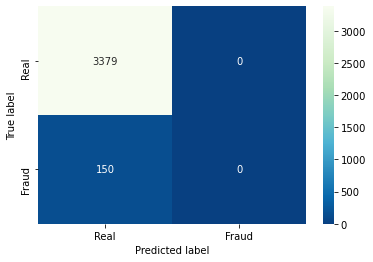

In [51]:
ax = sns.heatmap(conf_rf_countvect_gs, annot=True, fmt="d", cmap=sns.color_palette("GnBu_r", as_cmap=True))
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 2. XGBoost Classifier

In [52]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_countvect = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_countvect.fit(X_train, y_train)

# Output the test accuracy
xgb_countvect.score(X_test, y_test)

0.9895154434684047

In [53]:
xgb_countvect.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 123,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'error'}

In [55]:
y_pred = xgb_countvect.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_countvect = confusion_matrix(y_test, y_pred)
print(conf_xgb_countvect)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3374    5]
 [  32  118]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9906    0.9985    0.9945      3379
       Fraud     0.9593    0.7867    0.8645       150

    accuracy                         0.9895      3529
   macro avg     0.9750    0.8926    0.9295      3529
weighted avg     0.9893    0.9895    0.9890      3529



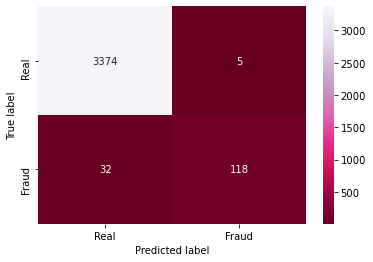

In [56]:
ax = sns.heatmap(conf_xgb_countvect, annot=True, fmt="d", cmap="PuRd_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Simple Grid Search Hyperparameter Tuning

In [57]:
xgb_countvect_gs = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False)

param_grid = {
    #'n_estimators': [700, 1000],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [10, 15, 20, 25],
    'reg_alpha': [1.2, 1.3, 1.4],
    'reg_lambda': [1.2, 1.3, 1.4],
    'subsample': [0.8, 0.9] 
}

#gs = GridSearchCV(estimator = xgb_countvect_gs, param_grid = param_grid, cv = 10, n_jobs = 1, scoring = 'accuracy', verbose = 10)
gs = HalvingGridSearchCV(estimator = xgb_countvect_gs, param_grid = param_grid, cv = 5, n_jobs = 1, scoring = 'accuracy', 
                         verbose = 10, min_resources='exhaust', factor=3)  

# Train the model with Grid Search
xgb_countvect_gs = gs.fit(X_train, y_train)

# Output the test accuracy
xgb_countvect_gs.score(X_test, y_test)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 174
max_resources_: 14116
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 216
n_resources: 174
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 1/5; 1/216] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.986, test=0.971) total time=  27.6s
[CV 2/5; 1/216] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 2/5; 1/216] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=1.000, test=0.971) total time=  27.6s
[CV 3/5; 1/216] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 3/5; 1/216] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0

[CV 2/5; 7/216] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=(train=1.000, test=0.971) total time=   4.4s
[CV 3/5; 7/216] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 3/5; 7/216] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=(train=0.986, test=0.971) total time=   4.5s
[CV 4/5; 7/216] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 4/5; 7/216] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=1.000) total time=   4.6s
[CV 5/5; 7/216] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 5/5; 7/216] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=1.000) total time=   4.3s
[CV 1/5; 8/216] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, re

[CV 4/5; 13/216] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=1.000) total time=   4.6s
[CV 5/5; 13/216] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8
[CV 5/5; 13/216] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8;, score=(train=0.986, test=1.000) total time=   4.4s
[CV 1/5; 14/216] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9
[CV 1/5; 14/216] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.986, test=0.971) total time=   4.5s
[CV 2/5; 14/216] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9
[CV 2/5; 14/216] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.971) total time=   4.5s
[CV 3/5; 14/216] START colsample_bytree=0.7, max_depth=10, reg_alpha

[CV 1/5; 20/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=0.971) total time=   4.6s
[CV 2/5; 20/216] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 2/5; 20/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.971) total time=   4.6s
[CV 3/5; 20/216] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 3/5; 20/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=0.971) total time=   4.8s
[CV 4/5; 20/216] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 4/5; 20/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=1.000) total time=   4.7s
[CV 5/5; 20/216] START colsample_bytree=0.7, max_depth=15, reg_alpha

[CV 3/5; 26/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=0.971) total time=   4.8s
[CV 4/5; 26/216] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 4/5; 26/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=1.000) total time=   4.6s
[CV 5/5; 26/216] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 5/5; 26/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=0.986, test=1.000) total time=   4.6s
[CV 1/5; 27/216] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 1/5; 27/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=0.986, test=0.971) total time=   4.6s
[CV 2/5; 27/216] START colsample_bytree=0.7, max_depth=15, reg_alpha

[CV 5/5; 32/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.986, test=1.000) total time=   4.9s
[CV 1/5; 33/216] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8
[CV 1/5; 33/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=0.986, test=0.971) total time=   4.6s
[CV 2/5; 33/216] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8
[CV 2/5; 33/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.971) total time=   5.3s
[CV 3/5; 33/216] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8
[CV 3/5; 33/216] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=0.986, test=0.971) total time=   5.4s
[CV 4/5; 33/216] START colsample_bytree=0.7, max_depth=15, reg_alpha

[CV 2/5; 39/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.971) total time=   5.2s
[CV 3/5; 39/216] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 3/5; 39/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=(train=0.986, test=0.971) total time=   5.4s
[CV 4/5; 39/216] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 4/5; 39/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.5s
[CV 5/5; 39/216] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 5/5; 39/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.0s
[CV 1/5; 40/216] START colsample_bytree=0.7, max_depth=20, reg_alpha

[CV 4/5; 45/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.1s
[CV 5/5; 45/216] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 5/5; 45/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.1s
[CV 1/5; 46/216] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 1/5; 46/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=(train=0.986, test=0.971) total time=   5.2s
[CV 2/5; 46/216] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 2/5; 46/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=(train=1.000, test=0.971) total time=   5.3s
[CV 3/5; 46/216] START colsample_bytree=0.7, max_depth=20, reg_alpha

[CV 1/5; 52/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9;, score=(train=0.986, test=0.971) total time=   5.0s
[CV 2/5; 52/216] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9
[CV 2/5; 52/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9;, score=(train=1.000, test=0.971) total time=   5.0s
[CV 3/5; 52/216] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9
[CV 3/5; 52/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.0s
[CV 4/5; 52/216] START colsample_bytree=0.7, max_depth=20, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9
[CV 4/5; 52/216] END colsample_bytree=0.7, max_depth=20, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9;, score=(train=0.993, test=1.000) total time=   4.9s
[CV 5/5; 52/216] START colsample_bytree=0.7, max_depth=20, reg_alpha

[CV 3/5; 58/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.4s
[CV 4/5; 58/216] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 4/5; 58/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=(train=0.993, test=1.000) total time=   5.4s
[CV 5/5; 58/216] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 5/5; 58/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=(train=0.986, test=1.000) total time=   5.3s
[CV 1/5; 59/216] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8
[CV 1/5; 59/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8;, score=(train=0.986, test=0.971) total time=   4.9s
[CV 2/5; 59/216] START colsample_bytree=0.7, max_depth=25, reg_alpha

[CV 5/5; 64/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=(train=0.986, test=1.000) total time=   5.2s
[CV 1/5; 65/216] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8
[CV 1/5; 65/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8;, score=(train=0.986, test=0.971) total time=   5.3s
[CV 2/5; 65/216] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8
[CV 2/5; 65/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8;, score=(train=1.000, test=0.971) total time=   5.3s
[CV 3/5; 65/216] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8
[CV 3/5; 65/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8;, score=(train=0.986, test=0.971) total time=   5.2s
[CV 4/5; 65/216] START colsample_bytree=0.7, max_depth=25, reg_alpha

[CV 2/5; 71/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.4s
[CV 3/5; 71/216] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8
[CV 3/5; 71/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8;, score=(train=0.986, test=0.971) total time=   5.1s
[CV 4/5; 71/216] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8
[CV 4/5; 71/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.0s
[CV 5/5; 71/216] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8
[CV 5/5; 71/216] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.1s
[CV 1/5; 72/216] START colsample_bytree=0.7, max_depth=25, reg_alpha

[CV 4/5; 77/216] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.9s
[CV 5/5; 77/216] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8
[CV 5/5; 77/216] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.5s
[CV 1/5; 78/216] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9
[CV 1/5; 78/216] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.2s
[CV 2/5; 78/216] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9
[CV 2/5; 78/216] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.971) total time=   5.8s
[CV 3/5; 78/216] START colsample_bytree=0.8, max_depth=10, reg_alpha

[CV 1/5; 84/216] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.986, test=0.971) total time=   5.6s
[CV 2/5; 84/216] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9
[CV 2/5; 84/216] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.971) total time=   5.4s
[CV 3/5; 84/216] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9
[CV 3/5; 84/216] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.8s
[CV 4/5; 84/216] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9
[CV 4/5; 84/216] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.993, test=1.000) total time=   5.2s
[CV 5/5; 84/216] START colsample_bytree=0.8, max_depth=10, reg_alpha

[CV 3/5; 90/216] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=0.986, test=0.971) total time=   5.4s
[CV 4/5; 90/216] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9
[CV 4/5; 90/216] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=0.986, test=1.000) total time=   5.3s
[CV 5/5; 90/216] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9
[CV 5/5; 90/216] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=0.986, test=1.000) total time=   5.2s
[CV 1/5; 91/216] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 1/5; 91/216] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.0s
[CV 2/5; 91/216] START colsample_bytree=0.8, max_depth=15, reg_alpha

[CV 5/5; 96/216] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9;, score=(train=0.993, test=1.000) total time=   5.6s
[CV 1/5; 97/216] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 1/5; 97/216] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=(train=0.986, test=0.971) total time=   5.6s
[CV 2/5; 97/216] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 2/5; 97/216] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=(train=1.000, test=0.971) total time=   5.6s
[CV 3/5; 97/216] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 3/5; 97/216] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.3s
[CV 4/5; 97/216] START colsample_bytree=0.8, max_depth=15, reg_alpha

[CV 2/5; 103/216] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.1s
[CV 3/5; 103/216] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8
[CV 3/5; 103/216] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.6s
[CV 4/5; 103/216] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8
[CV 4/5; 103/216] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.6s
[CV 5/5; 103/216] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8
[CV 5/5; 103/216] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.6s
[CV 1/5; 104/216] START colsample_bytree=0.8, max_depth=15, r

[CV 4/5; 109/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.7s
[CV 5/5; 109/216] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 5/5; 109/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.3s
[CV 1/5; 110/216] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 1/5; 110/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=0.986, test=0.971) total time=   5.4s
[CV 2/5; 110/216] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 2/5; 110/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.971) total time=   5.5s
[CV 3/5; 110/216] START colsample_bytree=0.8, max_depth=20, r

[CV 1/5; 116/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=0.986, test=0.971) total time=   5.4s
[CV 2/5; 116/216] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 2/5; 116/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.971) total time=   5.2s
[CV 3/5; 116/216] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 3/5; 116/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.3s
[CV 4/5; 116/216] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 4/5; 116/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=1.000) total time=   5.2s
[CV 5/5; 116/216] START colsample_bytree=0.8, max_depth=20, r

[CV 3/5; 122/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.2s
[CV 4/5; 122/216] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9
[CV 4/5; 122/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=1.000) total time=   5.2s
[CV 5/5; 122/216] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9
[CV 5/5; 122/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.986, test=1.000) total time=   5.4s
[CV 1/5; 123/216] START colsample_bytree=0.8, max_depth=20, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8
[CV 1/5; 123/216] END colsample_bytree=0.8, max_depth=20, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=0.978, test=0.971) total time=   5.1s
[CV 2/5; 123/216] START colsample_bytree=0.8, max_depth=20, r

[CV 5/5; 128/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=1.000) total time=   4.9s
[CV 1/5; 129/216] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 1/5; 129/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.3s
[CV 2/5; 129/216] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 2/5; 129/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.971) total time=   5.6s
[CV 3/5; 129/216] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 3/5; 129/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.3s
[CV 4/5; 129/216] START colsample_bytree=0.8, max_depth=25, r

[CV 2/5; 135/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.971) total time=   5.4s
[CV 3/5; 135/216] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 3/5; 135/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.6s
[CV 4/5; 135/216] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 4/5; 135/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.2s
[CV 5/5; 135/216] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 5/5; 135/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.0s
[CV 1/5; 136/216] START colsample_bytree=0.8, max_depth=25, r

[CV 4/5; 141/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.3s
[CV 5/5; 141/216] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8
[CV 5/5; 141/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.4s
[CV 1/5; 142/216] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9
[CV 1/5; 142/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9;, score=(train=0.986, test=0.971) total time=   5.3s
[CV 2/5; 142/216] START colsample_bytree=0.8, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9
[CV 2/5; 142/216] END colsample_bytree=0.8, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.3s
[CV 3/5; 142/216] START colsample_bytree=0.8, max_depth=25, r

[CV 1/5; 148/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=(train=0.986, test=0.971) total time=   5.1s
[CV 2/5; 148/216] START colsample_bytree=0.9, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 2/5; 148/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=(train=1.000, test=0.971) total time=   5.0s
[CV 3/5; 148/216] START colsample_bytree=0.9, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 3/5; 148/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.1s
[CV 4/5; 148/216] START colsample_bytree=0.9, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 4/5; 148/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=(train=0.993, test=1.000) total time=   5.2s
[CV 5/5; 148/216] START colsample_bytree=0.9, max_depth=10, r

[CV 3/5; 154/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.3s
[CV 4/5; 154/216] START colsample_bytree=0.9, max_depth=10, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 4/5; 154/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=(train=0.993, test=1.000) total time=   5.0s
[CV 5/5; 154/216] START colsample_bytree=0.9, max_depth=10, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9
[CV 5/5; 154/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9;, score=(train=0.993, test=1.000) total time=   5.0s
[CV 1/5; 155/216] START colsample_bytree=0.9, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8
[CV 1/5; 155/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=0.971) total time=   4.9s
[CV 2/5; 155/216] START colsample_bytree=0.9, max_depth=10, r

[CV 5/5; 160/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.4, reg_lambda=1.3, subsample=0.9;, score=(train=0.986, test=1.000) total time=   5.0s
[CV 1/5; 161/216] START colsample_bytree=0.9, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8
[CV 1/5; 161/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.2s
[CV 2/5; 161/216] START colsample_bytree=0.9, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8
[CV 2/5; 161/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=0.971) total time=   4.9s
[CV 3/5; 161/216] START colsample_bytree=0.9, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8
[CV 3/5; 161/216] END colsample_bytree=0.9, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.1s
[CV 4/5; 161/216] START colsample_bytree=0.9, max_depth=10, r

[CV 2/5; 167/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.0s
[CV 3/5; 167/216] START colsample_bytree=0.9, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8
[CV 3/5; 167/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.1s
[CV 4/5; 167/216] START colsample_bytree=0.9, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8
[CV 4/5; 167/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.1s
[CV 5/5; 167/216] START colsample_bytree=0.9, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8
[CV 5/5; 167/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=1.000) total time=   4.8s
[CV 1/5; 168/216] START colsample_bytree=0.9, max_depth=15, r

[CV 4/5; 173/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.0s
[CV 5/5; 173/216] START colsample_bytree=0.9, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8
[CV 5/5; 173/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8;, score=(train=0.993, test=1.000) total time=   4.9s
[CV 1/5; 174/216] START colsample_bytree=0.9, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9
[CV 1/5; 174/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.986, test=0.971) total time=   4.9s
[CV 2/5; 174/216] START colsample_bytree=0.9, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9
[CV 2/5; 174/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.971) total time=   4.9s
[CV 3/5; 174/216] START colsample_bytree=0.9, max_depth=15, r

[CV 1/5; 180/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=0.986, test=0.971) total time=   5.0s
[CV 2/5; 180/216] START colsample_bytree=0.9, max_depth=15, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9
[CV 2/5; 180/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=0.993, test=0.971) total time=   4.9s
[CV 3/5; 180/216] START colsample_bytree=0.9, max_depth=15, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9
[CV 3/5; 180/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.0s
[CV 4/5; 180/216] START colsample_bytree=0.9, max_depth=15, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9
[CV 4/5; 180/216] END colsample_bytree=0.9, max_depth=15, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=0.993, test=1.000) total time=   5.0s
[CV 5/5; 180/216] START colsample_bytree=0.9, max_depth=15, r

[CV 3/5; 186/216] END colsample_bytree=0.9, max_depth=20, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9;, score=(train=0.993, test=0.971) total time=   6.1s
[CV 4/5; 186/216] START colsample_bytree=0.9, max_depth=20, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9
[CV 4/5; 186/216] END colsample_bytree=0.9, max_depth=20, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9;, score=(train=0.993, test=1.000) total time=   5.4s
[CV 5/5; 186/216] START colsample_bytree=0.9, max_depth=20, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9
[CV 5/5; 186/216] END colsample_bytree=0.9, max_depth=20, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9;, score=(train=0.986, test=1.000) total time=   5.6s
[CV 1/5; 187/216] START colsample_bytree=0.9, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 1/5; 187/216] END colsample_bytree=0.9, max_depth=20, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=(train=0.986, test=0.971) total time=   5.5s
[CV 2/5; 187/216] START colsample_bytree=0.9, max_depth=20, r

[CV 5/5; 192/216] END colsample_bytree=0.9, max_depth=20, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.986, test=1.000) total time=   5.0s
[CV 1/5; 193/216] START colsample_bytree=0.9, max_depth=20, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8
[CV 1/5; 193/216] END colsample_bytree=0.9, max_depth=20, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8;, score=(train=0.986, test=0.971) total time=   4.8s
[CV 2/5; 193/216] START colsample_bytree=0.9, max_depth=20, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8
[CV 2/5; 193/216] END colsample_bytree=0.9, max_depth=20, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.0s
[CV 3/5; 193/216] START colsample_bytree=0.9, max_depth=20, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8
[CV 3/5; 193/216] END colsample_bytree=0.9, max_depth=20, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.0s
[CV 4/5; 193/216] START colsample_bytree=0.9, max_depth=20, r

[CV 2/5; 199/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.6s
[CV 3/5; 199/216] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 3/5; 199/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=0.971) total time=   5.4s
[CV 4/5; 199/216] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 4/5; 199/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.6s
[CV 5/5; 199/216] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 5/5; 199/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.6s
[CV 1/5; 200/216] START colsample_bytree=0.9, max_depth=25, r

[CV 4/5; 205/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.6s
[CV 5/5; 205/216] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8
[CV 5/5; 205/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.8;, score=(train=0.993, test=1.000) total time=   5.3s
[CV 1/5; 206/216] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 1/5; 206/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=0.986, test=0.971) total time=   5.7s
[CV 2/5; 206/216] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 2/5; 206/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.971) total time=   5.9s
[CV 3/5; 206/216] START colsample_bytree=0.9, max_depth=25, r

[CV 1/5; 212/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.986, test=0.971) total time=   5.1s
[CV 2/5; 212/216] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9
[CV 2/5; 212/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.6s
[CV 3/5; 212/216] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9
[CV 3/5; 212/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=0.971) total time=   5.6s
[CV 4/5; 212/216] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9
[CV 4/5; 212/216] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.993, test=1.000) total time=   5.3s
[CV 5/5; 212/216] START colsample_bytree=0.9, max_depth=25, r

[CV 3/5; 2/72] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8;, score=(train=1.000, test=0.942) total time=  10.3s
[CV 4/5; 2/72] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8
[CV 4/5; 2/72] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8;, score=(train=1.000, test=0.933) total time=  11.2s
[CV 5/5; 2/72] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8
[CV 5/5; 2/72] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8;, score=(train=0.995, test=0.981) total time=  10.3s
[CV 1/5; 3/72] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9
[CV 1/5; 3/72] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.971) total time=  10.5s
[CV 2/5; 3/72] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.3, reg_lambda

[CV 1/5; 9/72] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.971) total time=  11.7s
[CV 2/5; 9/72] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9
[CV 2/5; 9/72] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.962) total time=  11.3s
[CV 3/5; 9/72] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9
[CV 3/5; 9/72] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=0.998, test=0.942) total time=  11.3s
[CV 4/5; 9/72] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9
[CV 4/5; 9/72] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.933) total time=  12.3s
[CV 5/5; 9/72] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda

[CV 3/5; 15/72] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9;, score=(train=0.998, test=0.942) total time=  12.5s
[CV 4/5; 15/72] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9
[CV 4/5; 15/72] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.933) total time=  13.4s
[CV 5/5; 15/72] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9
[CV 5/5; 15/72] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.4, subsample=0.9;, score=(train=0.998, test=0.971) total time=  10.8s
[CV 1/5; 16/72] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 1/5; 16/72] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.962) total time=  10.8s
[CV 2/5; 16/72] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.3, re

[CV 5/5; 21/72] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.8;, score=(train=0.995, test=0.981) total time=  12.4s
[CV 1/5; 22/72] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9
[CV 1/5; 22/72] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.998, test=0.962) total time=  12.9s
[CV 2/5; 22/72] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9
[CV 2/5; 22/72] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.962) total time=  11.8s
[CV 3/5; 22/72] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9
[CV 3/5; 22/72] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.998, test=0.942) total time=  12.6s
[CV 4/5; 22/72] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.4, re

[CV 2/5; 28/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.962) total time=  12.5s
[CV 3/5; 28/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 3/5; 28/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=0.998, test=0.942) total time=  11.5s
[CV 4/5; 28/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 4/5; 28/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.933) total time=  12.7s
[CV 5/5; 28/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 5/5; 28/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=0.998, test=0.990) total time=  10.9s
[CV 1/5; 29/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, re

[CV 4/5; 34/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.933) total time=  14.6s
[CV 5/5; 34/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9
[CV 5/5; 34/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=0.998, test=0.990) total time=  12.5s
[CV 1/5; 35/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 1/5; 35/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.962) total time=  12.5s
[CV 2/5; 35/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 2/5; 35/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=0.998, test=0.962) total time=  12.4s
[CV 3/5; 35/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, re

[CV 1/5; 41/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.962) total time=  11.5s
[CV 2/5; 41/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8
[CV 2/5; 41/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=0.998, test=0.962) total time=  15.8s
[CV 3/5; 41/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8
[CV 3/5; 41/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=0.998, test=0.942) total time=  12.0s
[CV 4/5; 41/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8
[CV 4/5; 41/72] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.933) total time=  13.7s
[CV 5/5; 41/72] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.4, re

[CV 3/5; 47/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=0.998, test=0.942) total time=  10.8s
[CV 4/5; 47/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 4/5; 47/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.923) total time=  11.3s
[CV 5/5; 47/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 5/5; 47/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=0.998, test=0.981) total time=  10.5s
[CV 1/5; 48/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 1/5; 48/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.962) total time=  11.4s
[CV 2/5; 48/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, re

[CV 5/5; 53/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.2, subsample=0.9;, score=(train=0.998, test=0.971) total time=  10.6s
[CV 1/5; 54/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 1/5; 54/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.962) total time=  11.6s
[CV 2/5; 54/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 2/5; 54/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=0.998, test=0.962) total time=  11.1s
[CV 3/5; 54/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8
[CV 3/5; 54/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.3, subsample=0.8;, score=(train=0.998, test=0.942) total time=  10.4s
[CV 4/5; 54/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, re

[CV 2/5; 60/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.962) total time=  10.2s
[CV 3/5; 60/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8
[CV 3/5; 60/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=0.998, test=0.942) total time=  10.3s
[CV 4/5; 60/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8
[CV 4/5; 60/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.933) total time=  11.1s
[CV 5/5; 60/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8
[CV 5/5; 60/72] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, reg_lambda=1.3, subsample=0.8;, score=(train=0.995, test=0.981) total time=  10.3s
[CV 1/5; 61/72] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.4, re

[CV 4/5; 66/72] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=(train=1.000, test=0.923) total time=  11.8s
[CV 5/5; 66/72] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8
[CV 5/5; 66/72] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.8;, score=(train=0.998, test=0.971) total time=  11.0s
[CV 1/5; 67/72] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 1/5; 67/72] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=(train=1.000, test=0.962) total time=  11.5s
[CV 2/5; 67/72] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9
[CV 2/5; 67/72] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.3, subsample=0.9;, score=(train=1.000, test=0.962) total time=  11.6s
[CV 3/5; 67/72] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, re

[CV 1/5; 1/24] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.999, test=0.978) total time= 5.2min
[CV 2/5; 1/24] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 2/5; 1/24] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.998, test=0.981) total time= 5.1min
[CV 3/5; 1/24] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 3/5; 1/24] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.999, test=0.958) total time= 5.2min
[CV 4/5; 1/24] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8
[CV 4/5; 1/24] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.8;, score=(train=0.999, test=0.955) total time= 4.8min
[CV 5/5; 1/24] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda

[CV 4/5; 7/24] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8;, score=(train=0.999, test=0.952) total time=  41.9s
[CV 5/5; 7/24] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8
[CV 5/5; 7/24] END colsample_bytree=0.7, max_depth=25, reg_alpha=1.3, reg_lambda=1.4, subsample=0.8;, score=(train=0.999, test=0.974) total time=  39.9s
[CV 1/5; 8/24] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 1/5; 8/24] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=0.999, test=0.978) total time=  41.2s
[CV 2/5; 8/24] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 2/5; 8/24] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=0.998, test=0.984) total time=  41.5s
[CV 3/5; 8/24] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.2, reg_lambda

[CV 1/5; 14/24] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.999, test=0.978) total time=  43.4s
[CV 2/5; 14/24] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9
[CV 2/5; 14/24] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.998, test=0.984) total time=  44.0s
[CV 3/5; 14/24] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9
[CV 3/5; 14/24] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.999, test=0.962) total time=  43.2s
[CV 4/5; 14/24] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9
[CV 4/5; 14/24] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.999, test=0.958) total time=  45.6s
[CV 5/5; 14/24] START colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, re

[CV 3/5; 20/24] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.999, test=0.955) total time=  39.8s
[CV 4/5; 20/24] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9
[CV 4/5; 20/24] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.999, test=0.955) total time=  42.9s
[CV 5/5; 20/24] START colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9
[CV 5/5; 20/24] END colsample_bytree=0.8, max_depth=10, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9;, score=(train=0.999, test=0.968) total time=  42.4s
[CV 1/5; 21/24] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9
[CV 1/5; 21/24] END colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, reg_lambda=1.2, subsample=0.9;, score=(train=0.999, test=0.978) total time=  37.5s
[CV 2/5; 21/24] START colsample_bytree=0.7, max_depth=10, reg_alpha=1.4, re

[CV 5/5; 2/8] END colsample_bytree=0.8, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.979) total time= 3.4min
[CV 1/5; 3/8] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 1/5; 3/8] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.977) total time= 3.6min
[CV 2/5; 3/8] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 2/5; 3/8] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.968) total time= 3.9min
[CV 3/5; 3/8] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9
[CV 3/5; 3/8] END colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, subsample=0.9;, score=(train=1.000, test=0.971) total time= 3.8min
[CV 4/5; 3/8] START colsample_bytree=0.7, max_depth=15, reg_alpha=1.2, reg_lambda=1.2, su

[CV 2/5; 1/3] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.983) total time=72.9min
[CV 3/5; 1/3] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9
[CV 3/5; 1/3] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.982) total time=74.2min
[CV 4/5; 1/3] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9
[CV 4/5; 1/3] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.983) total time=73.0min
[CV 5/5; 1/3] START colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9
[CV 5/5; 1/3] END colsample_bytree=0.9, max_depth=25, reg_alpha=1.4, reg_lambda=1.4, subsample=0.9;, score=(train=1.000, test=0.983) total time=69.6min
[CV 1/5; 2/3] START colsample_bytree=0.7, max_depth=25, reg_alpha=1.2, reg_lambda=1.2, su

0.9895154434684047

In [58]:
print("Best score:", xgb_countvect_gs.best_score_)
print("Best parameters:", xgb_countvect_gs.best_params_)

Best score: 0.9834645318407411
Best parameters: {'colsample_bytree': 0.8, 'max_depth': 15, 'reg_alpha': 1.3, 'reg_lambda': 1.4, 'subsample': 0.9}


In [59]:
y_pred = xgb_countvect_gs.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_countvect_gs = confusion_matrix(y_test, y_pred)
print(conf_xgb_countvect_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3373    6]
 [  31  119]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9909    0.9982    0.9945      3379
       Fraud     0.9520    0.7933    0.8655       150

    accuracy                         0.9895      3529
   macro avg     0.9714    0.8958    0.9300      3529
weighted avg     0.9892    0.9895    0.9891      3529



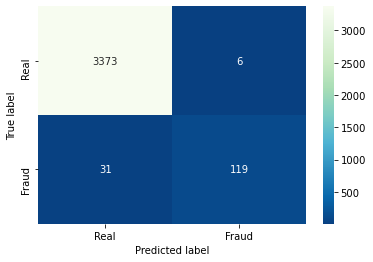

In [60]:
ax = sns.heatmap(conf_xgb_countvect_gs, annot=True, fmt="d", cmap="GnBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 3. Light Gradient Boosting Machine

In [61]:
lgb_countvect = LGBMClassifier(random_state=123)

# Train the lgbm model
lgb_countvect.fit(X_train, y_train, eval_metric='Accuracy')

# Output the test accuracy
lgb_countvect.score(X_test, y_test)

0.988948710682913

In [62]:
lgb_countvect.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [63]:
y_pred = lgb_countvect.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_countvect = confusion_matrix(y_test, y_pred)
print(conf_lgb_countvect)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3373    6]
 [  33  117]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9903    0.9982    0.9943      3379
       Fraud     0.9512    0.7800    0.8571       150

    accuracy                         0.9889      3529
   macro avg     0.9708    0.8891    0.9257      3529
weighted avg     0.9886    0.9889    0.9884      3529



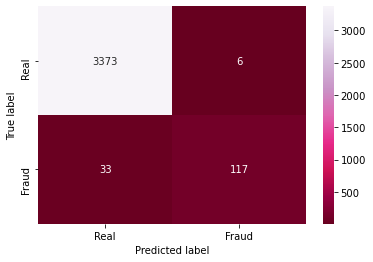

In [64]:
ax = sns.heatmap(conf_lgb_countvect, annot=True, fmt="d", cmap="PuRd_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Simple Grid Search Hyperparameter Tuning

Due to system limitation again, we can only self-tune the parameters for LGBM model and as long as there is a slight increase in accuracy, then we'll stop and use those parameters for other stages.

In [104]:
# Use my own parameters
lgb_countvect_gs = LGBMClassifier(learning_rate = 0.15, num_leaves = 375, random_state=123)

# Train the lgbm model
lgb_countvect_gs.fit(X_train, y_train, eval_metric='Accuracy')

# Output the test accuracy
lgb_countvect_gs.score(X_test, y_test)

0.990648909039388

This is the best parameters that we'll use!

In [105]:
y_pred = lgb_countvect_gs.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_countvect_gs = confusion_matrix(y_test, y_pred)
print(conf_lgb_countvect_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3376    3]
 [  30  120]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9912    0.9991    0.9951      3379
       Fraud     0.9756    0.8000    0.8791       150

    accuracy                         0.9906      3529
   macro avg     0.9834    0.8996    0.9371      3529
weighted avg     0.9905    0.9906    0.9902      3529



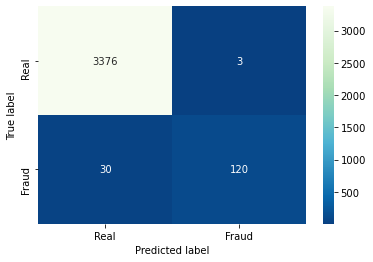

In [106]:
ax = sns.heatmap(conf_lgb_countvect_gs, annot=True, fmt="d", cmap="GnBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Summary of best model results for Stage 1:

- **Random Forest**: Original accuracy = 0.9864, Fraud recall = 0.6800
- **Random Forest (Grid Search)**: Tuned accuracy = 0.9575, Fraud recall = 0.0000
- **XGBoost**: Original accuracy = 0.9895, Fraud recall = 0.7867
- **XGBoost (Grid Search)**: Tuned accuracy = 0.9895, Fraud recall = 0.7933
- **LightGBM**: Original accuracy = 0.9889, Fraud recall = 0.7800
- **LightGBM (Tuned parameter)**: Tuned accuracy = 0.9906, Fraud recall = 0.8000

From just training 3 simple algorithms using count vectorizer, the findings we have is that model **LightGBM with Tuned Parameters** performs the best with accuracy of **0.9906** and the same model **LightGBM with Tuned Parameters** also performed best in terms of recall with value of **0.8000** for the fraud class which is the main class that we want to focus on.

## Stage 2: CountVectorizer with Random Oversampling

### 1. Random Forest Classifier

In [107]:
# Create the classifier object
rf_countvect_over = RandomForestClassifier(random_state=123)

# Train the model
rf_countvect_over.fit(X_train_over, y_train_over)

# Output the test accuracy
rf_countvect_over.score(X_test_over, y_test_over)

0.9849815811844715

In [108]:
rf_countvect_over.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [109]:
y_pred = rf_countvect_over.predict(X_test_over)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_countvect_over = confusion_matrix(y_test_over, y_pred)
print(conf_rf_countvect_over)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3370    9]
 [  44  106]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9871    0.9973    0.9922      3379
       Fraud     0.9217    0.7067    0.8000       150

    accuracy                         0.9850      3529
   macro avg     0.9544    0.8520    0.8961      3529
weighted avg     0.9843    0.9850    0.9840      3529



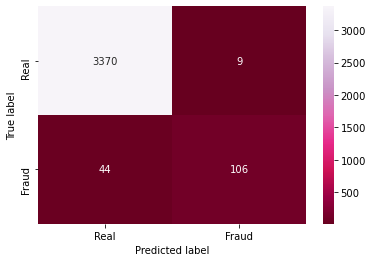

In [110]:
ax = sns.heatmap(conf_rf_countvect_over, annot=True, fmt="d", cmap="PuRd_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Using Grid Search Tuned Parameters

In [111]:
# Create the classifier object
rf_countvect_over_gs = RandomForestClassifier(max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, 
                                              n_estimators=100, random_state=123)

# Train the model
rf_countvect_over_gs.fit(X_train_over, y_train_over)

# Output the test accuracy
rf_countvect_over_gs.score(X_test_over, y_test_over)

0.957495041088127

In [112]:
y_pred = rf_countvect_over_gs.predict(X_test_over)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_countvect_over_gs = confusion_matrix(y_test_over, y_pred)
print(conf_rf_countvect_over_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3379    0]
 [ 150    0]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9575    1.0000    0.9783      3379
       Fraud     0.0000    0.0000    0.0000       150

    accuracy                         0.9575      3529
   macro avg     0.4787    0.5000    0.4891      3529
weighted avg     0.9168    0.9575    0.9367      3529



C:\Users\wz_ch\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wz_ch\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wz_ch\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


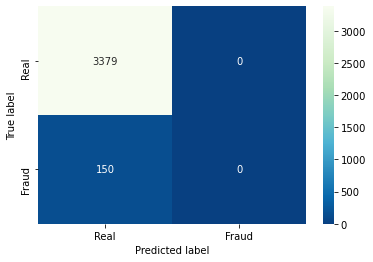

In [113]:
ax = sns.heatmap(conf_rf_countvect_over_gs, annot=True, fmt="d", cmap="GnBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 2. XGBoost Classifier

In [114]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_countvect_over = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_countvect_over.fit(X_train_over, y_train_over)

# Output the test accuracy
xgb_countvect_over.score(X_test_over, y_test_over)

0.985831680362709

In [115]:
xgb_countvect_over.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 123,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'error'}

In [116]:
y_pred = xgb_countvect_over.predict(X_test_over)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_countvect_over = confusion_matrix(y_test_over, y_pred)
print(conf_xgb_countvect_over)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3349   30]
 [  20  130]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9941    0.9911    0.9926      3379
       Fraud     0.8125    0.8667    0.8387       150

    accuracy                         0.9858      3529
   macro avg     0.9033    0.9289    0.9157      3529
weighted avg     0.9863    0.9858    0.9860      3529



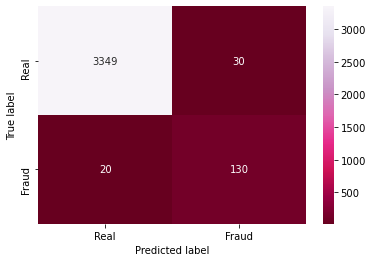

In [117]:
ax = sns.heatmap(conf_xgb_countvect_over, annot=True, fmt="d", cmap="PuRd_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Using Grid Search Tuned Parameters

In [36]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_countvect_over_gs = XGBClassifier(colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9, 
                                      random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_countvect_over_gs.fit(X_train_over, y_train_over)

# Output the test accuracy
xgb_countvect_over_gs.score(X_test_over, y_test_over)

0.9897988098611504

In [37]:
y_pred = xgb_countvect_over_gs.predict(X_test_over)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_countvect_over_gs = confusion_matrix(y_test_over, y_pred)
print(conf_xgb_countvect_over_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3368   11]
 [  25  125]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9926    0.9967    0.9947      3379
       Fraud     0.9191    0.8333    0.8741       150

    accuracy                         0.9898      3529
   macro avg     0.9559    0.9150    0.9344      3529
weighted avg     0.9895    0.9898    0.9896      3529



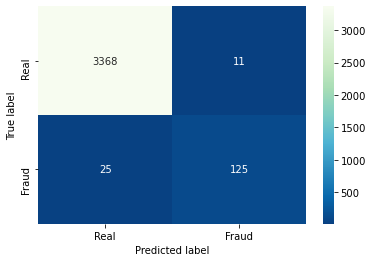

In [38]:
ax = sns.heatmap(conf_xgb_countvect_over_gs, annot=True, fmt="d", cmap="GnBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 3. Light Gradient Boosting Machine

In [39]:
# Create the model object
lgb_countvect_over = LGBMClassifier(random_state=123)

# Train the lgbm model
lgb_countvect_over.fit(X_train_over, y_train_over, eval_metric='Accuracy')

# Output the test accuracy
lgb_countvect_over.score(X_test_over, y_test_over)

0.9875318787191839

In [40]:
lgb_countvect_over.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [41]:
y_pred = lgb_countvect_over.predict(X_test_over)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_countvect_over = confusion_matrix(y_test_over, y_pred)
print(conf_lgb_countvect_over)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3353   26]
 [  18  132]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9947    0.9923    0.9935      3379
       Fraud     0.8354    0.8800    0.8571       150

    accuracy                         0.9875      3529
   macro avg     0.9151    0.9362    0.9253      3529
weighted avg     0.9879    0.9875    0.9877      3529



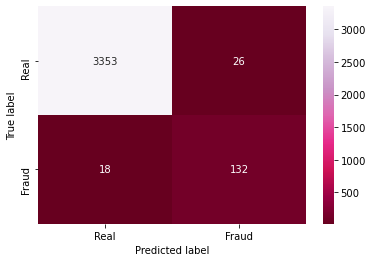

In [42]:
ax = sns.heatmap(conf_lgb_countvect_over, annot=True, fmt="d", cmap="PuRd_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Using Grid Search Tuned Parameters

In [43]:
# Create the model object
lgb_countvect_over_gs = LGBMClassifier(learning_rate = 0.15, num_leaves = 375, random_state=123)

# Train the lgbm model
lgb_countvect_over_gs.fit(X_train_over, y_train_over, eval_metric='Accuracy')

# Output the test accuracy
lgb_countvect_over_gs.score(X_test_over, y_test_over)

0.9895154434684047

In [44]:
y_pred = lgb_countvect_over_gs.predict(X_test_over)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_countvect_over_gs = confusion_matrix(y_test_over, y_pred)
print(conf_lgb_countvect_over_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3372    7]
 [  30  120]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9912    0.9979    0.9945      3379
       Fraud     0.9449    0.8000    0.8664       150

    accuracy                         0.9895      3529
   macro avg     0.9680    0.8990    0.9305      3529
weighted avg     0.9892    0.9895    0.9891      3529



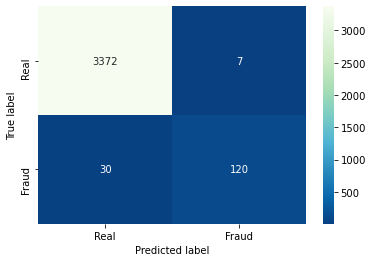

In [45]:
ax = sns.heatmap(conf_lgb_countvect_over_gs, annot=True, fmt="d", cmap="GnBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Summary of best model results for Stage 2:

- **Random Forest**: Original accuracy = 0.9850, Fraud recall = 0.7067
- **Random Forest (Grid Search)**: Tuned accuracy = 0.9575, Fraud recall = 0.0000
- **XGBoost**: Original accuracy = 0.9858, Fraud recall = 0.8667
- **XGBoost (Grid Search)**: Tuned accuracy = 0.9898, Fraud recall = 0.8333
- **LightGBM**: Original accuracy = 0.9875, Fraud recall = 0.8800
- **LightGBM (Tuned parameter)**: Tuned accuracy = 0.9895, Fraud recall = 0.8000

After applying random oversampling, the results we have from training 3 simple algorithms is that model **XGBoost with Grid Search parameters** performs the best with accuracy of **0.9898** while model **LightGBM** performed best in terms of recall with value of **0.8800** for the fraud class which is the main class that we want to focus on.

## Stage 3: CountVectorizer with SMOTE Sampling

### 1. Random Forest Classifier

In [46]:
# Create the classifier object
rf_countvect_smote = RandomForestClassifier(random_state=123)

# Train the model
rf_countvect_smote.fit(X_train_smote, y_train_smote)

# Output the test accuracy
rf_countvect_smote.score(X_test_smote, y_test_smote)

0.9846982147917257

In [47]:
rf_countvect_smote.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [48]:
y_pred = rf_countvect_smote.predict(X_test_smote)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_countvect_smote = confusion_matrix(y_test_smote, y_pred)
print(conf_rf_countvect_smote)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3377    2]
 [  52   98]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9848    0.9994    0.9921      3379
       Fraud     0.9800    0.6533    0.7840       150

    accuracy                         0.9847      3529
   macro avg     0.9824    0.8264    0.8880      3529
weighted avg     0.9846    0.9847    0.9832      3529



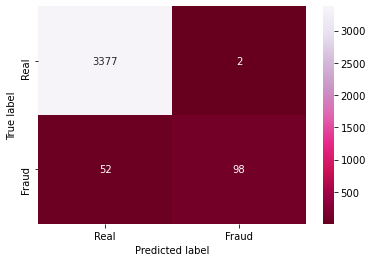

In [49]:
ax = sns.heatmap(conf_rf_countvect_smote, annot=True, fmt="d", cmap="PuRd_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Using Grid Search Tuned Parameters

In [50]:
# Create the classifier object
rf_countvect_smote_gs = RandomForestClassifier(max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=2, 
                                               n_estimators=100, random_state=123)

# Train the model
rf_countvect_smote_gs.fit(X_train_smote, y_train_smote)

# Output the test accuracy
rf_countvect_smote_gs.score(X_test_smote, y_test_smote)

0.957495041088127

In [51]:
y_pred = rf_countvect_smote_gs.predict(X_test_smote)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_countvect_smote_gs = confusion_matrix(y_test_smote, y_pred)
print(conf_rf_countvect_smote_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3379    0]
 [ 150    0]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9575    1.0000    0.9783      3379
       Fraud     0.0000    0.0000    0.0000       150

    accuracy                         0.9575      3529
   macro avg     0.4787    0.5000    0.4891      3529
weighted avg     0.9168    0.9575    0.9367      3529



C:\Users\wz_ch\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wz_ch\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wz_ch\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


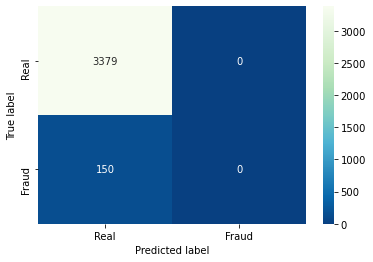

In [52]:
ax = sns.heatmap(conf_rf_countvect_smote_gs, annot=True, fmt="d", cmap="GnBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 2. XGBoost Classifier

In [53]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_countvect_smote = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_countvect_smote.fit(X_train_smote, y_train_smote)

# Output the test accuracy
xgb_countvect_smote.score(X_test_smote, y_test_smote)

0.9883819778974213

In [54]:
xgb_countvect_smote.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 123,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'error'}

In [55]:
y_pred = xgb_countvect_smote.predict(X_test_smote)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_countvect_smote = confusion_matrix(y_test_smote, y_pred)
print(conf_xgb_countvect_smote)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3370    9]
 [  32  118]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9906    0.9973    0.9940      3379
       Fraud     0.9291    0.7867    0.8520       150

    accuracy                         0.9884      3529
   macro avg     0.9599    0.8920    0.9230      3529
weighted avg     0.9880    0.9884    0.9879      3529



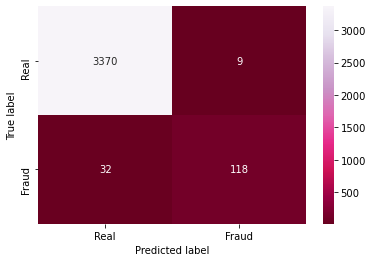

In [56]:
ax = sns.heatmap(conf_xgb_countvect_smote, annot=True, fmt="d", cmap="PuRd_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Using Grid Search Tuned Parameters

In [57]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_countvect_smote_gs = XGBClassifier(colsample_bytree=0.8, max_depth=15, reg_alpha=1.3, reg_lambda=1.4, subsample=0.9, 
                                       random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_countvect_smote_gs.fit(X_train_smote, y_train_smote)

# Output the test accuracy
xgb_countvect_smote_gs.score(X_test_smote, y_test_smote)

0.9866817795409465

In [58]:
y_pred = xgb_countvect_smote_gs.predict(X_test_smote)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_countvect_smote_gs = confusion_matrix(y_test_smote, y_pred)
print(conf_xgb_countvect_smote_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3367   12]
 [  35  115]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9897    0.9964    0.9931      3379
       Fraud     0.9055    0.7667    0.8303       150

    accuracy                         0.9867      3529
   macro avg     0.9476    0.8816    0.9117      3529
weighted avg     0.9861    0.9867    0.9862      3529



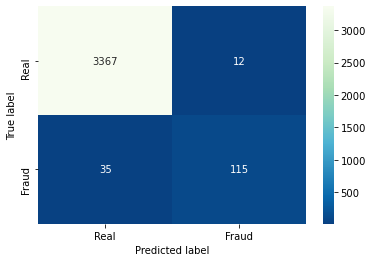

In [59]:
ax = sns.heatmap(conf_xgb_countvect_smote_gs, annot=True, fmt="d", cmap="GnBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 3. Light Gradient Boosting Machine

In [60]:
# Create the model object
lgb_countvect_smote = LGBMClassifier(random_state=123)

# Train the lgbm model
lgb_countvect_smote.fit(X_train_smote, y_train_smote, eval_metric='Accuracy')

# Output the test accuracy
lgb_countvect_smote.score(X_test_smote, y_test_smote)

0.9880986115046756

In [61]:
lgb_countvect_smote.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [62]:
y_pred = lgb_countvect_smote.predict(X_test_smote)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_countvect_smote = confusion_matrix(y_test_smote, y_pred)
print(conf_lgb_countvect_smote)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3370    9]
 [  33  117]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9903    0.9973    0.9938      3379
       Fraud     0.9286    0.7800    0.8478       150

    accuracy                         0.9881      3529
   macro avg     0.9594    0.8887    0.9208      3529
weighted avg     0.9877    0.9881    0.9876      3529



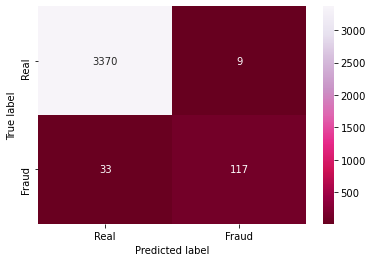

In [63]:
ax = sns.heatmap(conf_lgb_countvect_smote, annot=True, fmt="d", cmap="PuRd_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Using Grid Search Tuned Parameters

In [64]:
# Create the model object
lgb_countvect_smote_gs = LGBMClassifier(learning_rate = 0.15, num_leaves = 375, random_state=123)

# Train the lgbm model
lgb_countvect_smote_gs.fit(X_train_smote, y_train_smote, eval_metric='Accuracy')

# Output the test accuracy
lgb_countvect_smote_gs.score(X_test_smote, y_test_smote)

0.9880986115046756

In [65]:
y_pred = lgb_countvect_smote_gs.predict(X_test_smote)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_countvect_smote_gs = confusion_matrix(y_test_smote, y_pred)
print(conf_lgb_countvect_smote_gs)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3373    6]
 [  36  114]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9894    0.9982    0.9938      3379
       Fraud     0.9500    0.7600    0.8444       150

    accuracy                         0.9881      3529
   macro avg     0.9697    0.8791    0.9191      3529
weighted avg     0.9878    0.9881    0.9875      3529



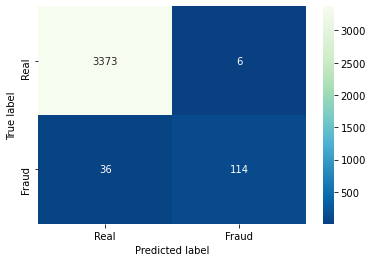

In [66]:
ax = sns.heatmap(conf_lgb_countvect_smote_gs, annot=True, fmt="d", cmap="GnBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Summary of best model results for Stage 3:

- **Random Forest**: Original accuracy = 0.9847, Fraud recall = 0.6533
- **Random Forest (Tuned parameter)**: Tuned accuracy = 0.9575, Fraud recall = 0.0000
- **XGBoost**: Original accuracy = 0.9884, Fraud recall = 0.7867
- **XGBoost (Tuned parameter)**: Tuned accuracy = 0.9867, Fraud recall = 0.7667
- **LightGBM**: Original accuracy = 0.9881, Fraud recall = 0.7800
- **LightGBM (Tuned parameter)**: Tuned accuracy = 0.9881, Fraud recall = 0.7600

After applying SMOTE sampling with Count Vectorizer, the results we have from training 3 simple algorithms is not as good as oversampling, in which **XGBoost** performs the best with accuracy of **0.9884** while **XGBoost** also performed best in terms of recall with value of **0.7867** for the fraud class which is the main class that we want to focus on.

### Conclusion on Part 2 Modeling (Count Vectorizer):

Overall, the best performing model for count vectorized text data in terms of accuracy is **LightGBM with Tuned Parameters** that is trained with the **Original imbalanced distribution**, with an accuracy of **0.9906**. In terms of recall for minority Fraudulent class, the best model is the **LightGBM** model that is trained with **Random Oversampling**, obtaining a recall of **0.8800**.

# Part 3: Using Unstructured data with TFIDF Vectorizer 

## Prepare the Sampled data for Vectorized data

In [67]:
# Convert to float16 before sampling
X_tfidf_vect = X_tfidf_vect.astype('float16')
X_tfidf_vect.dtype

dtype('float16')

### Oversampling

In [68]:
# Perform the train test stratified split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_tfidf_vect, 
                                                                        df_text['fraudulent'], 
                                                                        test_size=0.2, random_state=123)

# Oversampling
oversample = RandomOverSampler(sampling_strategy=0.6667, random_state=123)

# Transform the data
X_train_over, y_train_over = oversample.fit_resample(X_train_over, y_train_over)

# View the target distribution
y_train_over.value_counts()

0    13408
1     8939
Name: fraudulent, dtype: int64

### SMOTE Sampling

In [69]:
# Perform the train test stratified split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_tfidf_vect, 
                                                                            df_text['fraudulent'], 
                                                                            test_size=0.2, random_state=123)

# SMOTE sampling
smote = SMOTE(sampling_strategy=0.6667, random_state=123)

# Transform the data
X_train_smote, y_train_smote = smote.fit_resample(X_train_smote, y_train_smote)

# View the target distribution
y_train_smote.value_counts()

0    13408
1     8939
Name: fraudulent, dtype: int64

## Stage 1: TFIDF Vectorizer without Sampling

There won't be any hyperparameter tuning to be done for Part 3 because it is too time-consuming and it won't guarantee an increase in the recall for fraud class which is our main focus. Thus, only default parameters along with sampling techniques will be adopted in this entire Part 3.

In [70]:
# Perform the train test stratified split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_vect, df_text['fraudulent'], test_size=0.2, random_state=123)

# View the dimension of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14116, 42596), (3529, 42596), (14116,), (3529,))

### 1. Random Forest Classifier

In [71]:
# Create the classifier object
rf_tfidfvect = RandomForestClassifier(random_state=123)

# Train the model
rf_tfidfvect.fit(X_train, y_train)

# Output the test accuracy
rf_tfidfvect.score(X_test, y_test)

0.985831680362709

In [72]:
rf_tfidfvect.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [73]:
y_pred = rf_tfidfvect.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_tfidfvect = confusion_matrix(y_test, y_pred)
print(conf_rf_tfidfvect)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3379    0]
 [  50  100]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9854    1.0000    0.9927      3379
       Fraud     1.0000    0.6667    0.8000       150

    accuracy                         0.9858      3529
   macro avg     0.9927    0.8333    0.8963      3529
weighted avg     0.9860    0.9858    0.9845      3529



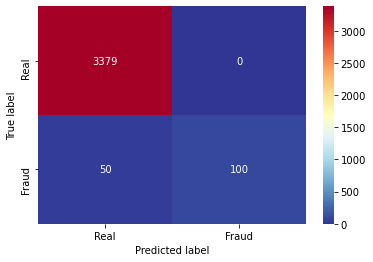

In [76]:
ax = sns.heatmap(conf_rf_tfidfvect, annot=True, fmt="d", cmap="RdYlBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 2. XGBoost Classifier

In [77]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_tfidfvect = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_tfidfvect.fit(X_train, y_train)

# Output the test accuracy
xgb_tfidfvect.score(X_test, y_test)

0.9897988098611504

In [78]:
xgb_tfidfvect.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)>

In [79]:
y_pred = xgb_tfidfvect.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_tfidfvect = confusion_matrix(y_test, y_pred)
print(conf_xgb_tfidfvect)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3373    6]
 [  30  120]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9912    0.9982    0.9947      3379
       Fraud     0.9524    0.8000    0.8696       150

    accuracy                         0.9898      3529
   macro avg     0.9718    0.8991    0.9321      3529
weighted avg     0.9895    0.9898    0.9894      3529



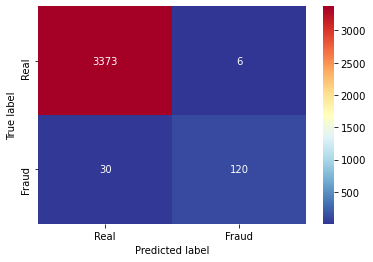

In [80]:
ax = sns.heatmap(conf_xgb_tfidfvect, annot=True, fmt="d", cmap="RdYlBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 3. Light Gradient Boosting Machine

In [81]:
lgb_tfidfvect = LGBMClassifier(random_state=123)

# Train the lgbm model
lgb_tfidfvect.fit(X_train, y_train, eval_metric='Accuracy')

# Output the test accuracy
lgb_tfidfvect.score(X_test, y_test)

0.9892320770756589

In [82]:
lgb_tfidfvect.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [83]:
y_pred = lgb_tfidfvect.predict(X_test)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_tfidfvect = confusion_matrix(y_test, y_pred)
print(conf_lgb_tfidfvect)
print('\n')

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3374    5]
 [  33  117]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9903    0.9985    0.9944      3379
       Fraud     0.9590    0.7800    0.8603       150

    accuracy                         0.9892      3529
   macro avg     0.9747    0.8893    0.9273      3529
weighted avg     0.9890    0.9892    0.9887      3529



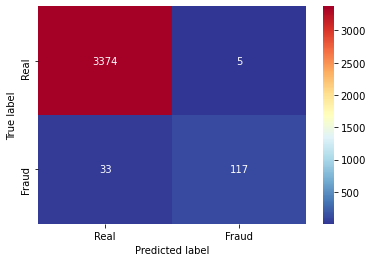

In [84]:
ax = sns.heatmap(conf_lgb_tfidfvect, annot=True, fmt="d", cmap="RdYlBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Summary of best model results for Stage 1:

- **Random Forest**: Original accuracy = 0.9858, Fraud recall = 0.6667
- **XGBoost**: Original accuracy = 0.9898, Fraud recall = 0.8000
- **LightGBM**: Original accuracy = 0.9892, Fraud recall = 0.7800

Based on the results from training the 3 algorithms using TFIDF vectorizer, the findings we have is that model **XGBoost** performs the best with accuracy of **0.9898** and the same model **XGBoost** also performed best in terms of recall with value of **0.8000** for the fraud class which is the main class that we want to focus on.

## Stage 2: TFIDF Vectorizer with Random Oversampling

### 1. Random Forest Classifier

In [85]:
# Create the classifier object
rf_tfidfvect_over = RandomForestClassifier(random_state=123)

# Train the model
rf_tfidfvect_over.fit(X_train_over, y_train_over)

# Output the test accuracy
rf_tfidfvect_over.score(X_test_over, y_test_over)

0.9852649475772174

In [86]:
rf_tfidfvect_over.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [87]:
y_pred = rf_tfidfvect_over.predict(X_test_over)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_tfidfvect_over = confusion_matrix(y_test_over, y_pred)
print(conf_rf_tfidfvect_over)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3374    5]
 [  47  103]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9863    0.9985    0.9924      3379
       Fraud     0.9537    0.6867    0.7984       150

    accuracy                         0.9853      3529
   macro avg     0.9700    0.8426    0.8954      3529
weighted avg     0.9849    0.9853    0.9841      3529



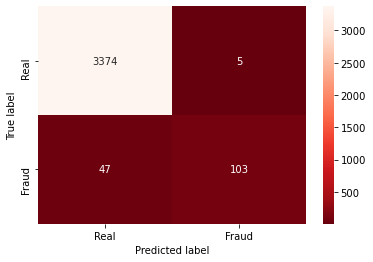

In [88]:
ax = sns.heatmap(conf_rf_tfidfvect_over, annot=True, fmt="d", cmap="Reds_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 2. XGBoost Classifier

In [89]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_tfidfvect_over = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_tfidfvect_over.fit(X_train_over, y_train_over)

# Output the test accuracy
xgb_tfidfvect_over.score(X_test_over, y_test_over)

0.9875318787191839

In [90]:
xgb_tfidfvect_over.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 123,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'error'}

In [91]:
y_pred = xgb_tfidfvect_over.predict(X_test_over)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_tfidfvect_over = confusion_matrix(y_test_over, y_pred)
print(conf_xgb_tfidfvect_over)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3357   22]
 [  22  128]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9935    0.9935    0.9935      3379
       Fraud     0.8533    0.8533    0.8533       150

    accuracy                         0.9875      3529
   macro avg     0.9234    0.9234    0.9234      3529
weighted avg     0.9875    0.9875    0.9875      3529



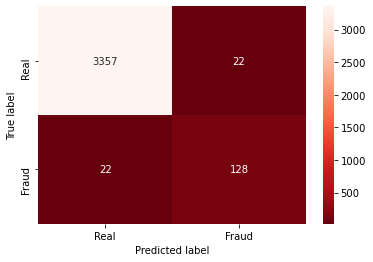

In [92]:
ax = sns.heatmap(conf_xgb_tfidfvect_over, annot=True, fmt="d", cmap="Reds_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 3. Light Gradient Boosting Machine

In [93]:
# Create the model object
lgb_tfidfvect_over = LGBMClassifier(random_state=123)

# Train the lgbm model
lgb_tfidfvect_over.fit(X_train_over, y_train_over, eval_metric='Accuracy')

# Output the test accuracy
lgb_tfidfvect_over.score(X_test_over, y_test_over)

0.9895154434684047

In [94]:
lgb_tfidfvect_over.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [95]:
y_pred = lgb_tfidfvect_over.predict(X_test_over)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_tfidfvect_over = confusion_matrix(y_test_over, y_pred)
print(conf_lgb_tfidfvect_over)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3359   20]
 [  17  133]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9950    0.9941    0.9945      3379
       Fraud     0.8693    0.8867    0.8779       150

    accuracy                         0.9895      3529
   macro avg     0.9321    0.9404    0.9362      3529
weighted avg     0.9896    0.9895    0.9896      3529



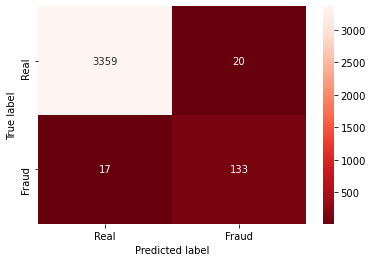

In [96]:
ax = sns.heatmap(conf_lgb_tfidfvect_over, annot=True, fmt="d", cmap="Reds_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Summary of best model results for Stage 2:

- **Random Forest**: Original accuracy = 0.9853, Fraud recall = 0.6867
- **XGBoost**: Original accuracy = 0.9875, Fraud recall = 0.8533
- **LightGBM**: Original accuracy = 0.9895, Fraud recall = 0.8867

After applying random oversampling, the results we have from training 3 simple algorithms is that model **LightGBM** performs the best with accuracy of **0.9895** while the same model **LightGBM** also performed best in terms of recall with a very high value of **0.8867** for the fraud class which is the main class that we want to focus on.

## Stage 3: TFIDF Vectorizer with SMOTE Sampling

### 1. Random Forest Classifier

In [97]:
# Create the classifier object
rf_tfidfvect_smote = RandomForestClassifier(random_state=123)

# Train the model
rf_tfidfvect_smote.fit(X_train_smote, y_train_smote)

# Output the test accuracy
rf_tfidfvect_smote.score(X_test_smote, y_test_smote)

0.9872485123264381

In [98]:
rf_tfidfvect_smote.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [99]:
y_pred = rf_tfidfvect_smote.predict(X_test_smote)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_rf_tfidfvect_smote = confusion_matrix(y_test_smote, y_pred)
print(conf_rf_tfidfvect_smote)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3378    1]
 [  44  106]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9871    0.9997    0.9934      3379
       Fraud     0.9907    0.7067    0.8249       150

    accuracy                         0.9872      3529
   macro avg     0.9889    0.8532    0.9091      3529
weighted avg     0.9873    0.9872    0.9862      3529



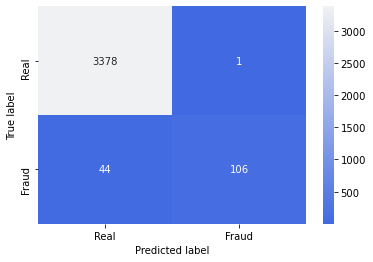

In [109]:
ax = sns.heatmap(conf_rf_tfidfvect_smote, annot=True, fmt="d", cmap=sns.light_palette("royalblue", as_cmap=True, reverse=True))
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 2. XGBoost Classifier

In [110]:
# Note: We need to pass numpy array instead of dataframe objects to avoid errors
xgb_tfidfvect_smote = XGBClassifier(random_state=123, eval_metric='error', use_label_encoder=False)

# Train the xgb model
xgb_tfidfvect_smote.fit(X_train_smote, y_train_smote)

# Output the test accuracy
xgb_tfidfvect_smote.score(X_test_smote, y_test_smote)

0.9895154434684047

In [111]:
xgb_tfidfvect_smote.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 123,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'error'}

In [112]:
y_pred = xgb_tfidfvect_smote.predict(X_test_smote)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_xgb_tfidfvect_smote = confusion_matrix(y_test_smote, y_pred)
print(conf_xgb_tfidfvect_smote)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3368   11]
 [  26  124]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9923    0.9967    0.9945      3379
       Fraud     0.9185    0.8267    0.8702       150

    accuracy                         0.9895      3529
   macro avg     0.9554    0.9117    0.9324      3529
weighted avg     0.9892    0.9895    0.9893      3529



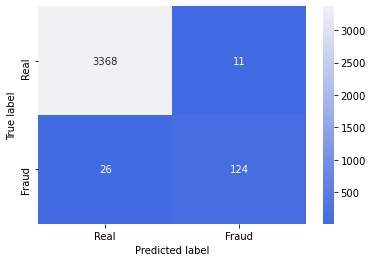

In [113]:
ax = sns.heatmap(conf_xgb_tfidfvect_smote, annot=True, fmt="d", cmap=sns.light_palette("royalblue", as_cmap=True, reverse=True))
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 3. Light Gradient Boosting Machine

In [114]:
# Create the model object
lgb_tfidfvect_smote = LGBMClassifier(random_state=123)

# Train the lgbm model
lgb_tfidfvect_smote.fit(X_train_smote, y_train_smote, eval_metric='Accuracy')

# Output the test accuracy
lgb_tfidfvect_smote.score(X_test_smote, y_test_smote)

0.9900821762538963

In [115]:
lgb_tfidfvect_smote.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [116]:
y_pred = lgb_tfidfvect_smote.predict(X_test_smote)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_tfidfvect_smote = confusion_matrix(y_test_smote, y_pred)
print(conf_lgb_tfidfvect_smote)
print('\n')

print('Classification Report')
print(classification_report(y_test_smote, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3365   14]
 [  21  129]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9938    0.9959    0.9948      3379
       Fraud     0.9021    0.8600    0.8805       150

    accuracy                         0.9901      3529
   macro avg     0.9479    0.9279    0.9377      3529
weighted avg     0.9899    0.9901    0.9900      3529



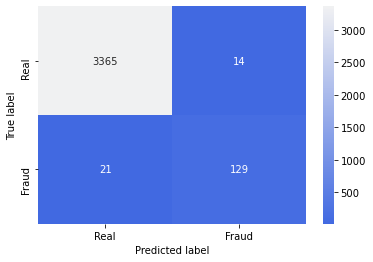

In [117]:
ax = sns.heatmap(conf_lgb_tfidfvect_smote, annot=True, fmt="d", cmap=sns.light_palette("royalblue", as_cmap=True, reverse=True))
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#### Summary of best model results for Stage 3:

- **Random Forest**: Original accuracy = 0.9872, Fraud recall = 0.7067
- **XGBoost**: Original accuracy = 0.9895, Fraud recall = 0.8267
- **LightGBM**: Original accuracy = 0.9901, Fraud recall = 0.8600

After applying SMOTE sampling with TFIDF Vectorizer, the results we have from training 3 simple algorithms is not as good as oversampling, in which **LightGBM** performs the best with accuracy of **0.9901** while **LightGBM** also performed best in terms of recall with value of **0.8600** for the fraud class which is the main class that we want to focus on.

### Conclusion for Part 3 Modeling (TFIDF):

Overall for TFIDF Vectorized text data, the best performing model in terms of accuracy is **LightGBM** that is trained with the **SMOTE sampled data**, with an accuracy of **0.9901**. In terms of recall for minority Fraudulent class, the best model is the **LightGBM** model that is trained with **Random Oversampling**, obtaining a recall of **0.8867**.

### Chosen models with highest recall

- **Part 1 (structured data)**: lightgbm with random oversampling >> accuracy 0.9558, recall 0.7800
- **Part 2 (count vectorizer)**: lightgbm with random oversampling >> accuracy 0.9875, recall 0.8800
- **Part 3 (TFIDF vectorizer)**: lightgbm with random oversampling >> accuracy 0.9895, recall 0.8867

In [125]:
# Part 1 (structured) no output for now
lgb_over

LGBMClassifier(random_state=123)

In [126]:
# Part 2 (Count vectorizer)
lgb_countvect_over

LGBMClassifier(random_state=123)

The **LightGBM** model with **random oversampling** trained from **TFIDF vectorized data** is the model with highest recall & accuracy among the 3 chosen models from each parts of structured, countvectorizer and TFIDF vectorizer.

In [127]:
# Part 3 (TFIDF)
lgb_tfidfvect_over

LGBMClassifier(random_state=123)

## Saving the models with highest recalls

Finally, we can save the models so that we can import them for our app deployment later.

In [135]:
# Save the lgbm model from structured data
joblib.dump(lgb_over, 'RS_lgbm_over_17072021.pkl')

# Save the lgbm model from count vectorizer
joblib.dump(lgb_countvect_over, 'RS_lgbm_countvect_over_17072021.pkl')

# Save the lgbm model from TFIDF vectorizer
joblib.dump(lgb_tfidfvect_over, 'RS_lgbm_tfidfvect_over_17072021.pkl')

['RS_lgbm_tfidfvect_over_17072021.pkl']

Now we need to test and see if we can load these models into the environment.

In [136]:
# Load from the saved file
from_file = joblib.load('RS_lgbm_over_17072021.pkl')

# Check the loaded model
from_file

LGBMClassifier(random_state=123)

In [137]:
from_file.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [138]:
from_file.score(X_test_over.values, y_test_over)

0.955794842731652

Great, it works pretty well, everything is displayed exactly as it is trained.

#### Question 2: Which balancing method works best in improving the prediction results for this imbalanced issue of the data?

- Overall, **random oversampling** seems to give the greatest recall on the minority fraud class compared to SMOTE sampling. Also, when **combining oversampling with TFIDF vectorized** data for model training, it gives the highest recall compared to ordinary structured data and count vectorized data. Besides, the accuracy is also the highest among the 3 different types of data.

#### Question 3: What type of data/features give the best prediction results on fraudulent target variable?

- In terms of overall accuracy, **count vectorized data** for model training gives the highest performance with 0.9906 accuracy seen from **LightGBM with tuned parameters** that is trained with the **original imbalanced distribution**.
- When looking at just recall on fraud class, **TFIDF vectorized data** produced the best model, which is the **LightGBM** model that is trained with **Random Oversampling**, obtaining a recall of 0.8867.